In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('font',family='malgun gothic')
plt.rc('axes',unicode_minus=False)
import seaborn as sns

# EDA
import klib

# Preprocessing&Feature Engineering
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from gensim.models import word2vec

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
import kerastuner as kt

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge, Lars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from vecstack import StackingTransformer
from vecstack import stacking

# Eveluation
from sklearn.metrics import mean_squared_error # squared=False시 RMSE
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import pickle

In [3]:
x_train = pd.read_csv(os.path.abspath("../input")+'/x_train_raw.csv', index_col=0)
x_test = pd.read_csv(os.path.abspath("../input")+'/x_test_raw.csv', index_col=0)
df_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949').set_index('custid')
df_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')
test_id = df_test['custid'].unique()

In [3]:
numeric = ['총구매액', '평균구매액', '최고구매금액', '총환불금액', '총환불횟수', '총할인금액', '평균할인금액', '총실구매액', '평균실구매액',
 '수입상품구매건수', '1월방문', '2월방문', '3월방문', '4월방문', '5월방문', '6월방문', '7월방문', '8월방문', '9월방문', '10월방문',
 '11월방문', '12월방문', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x', '12_x', '1_y', '2_y', '3_y',
 '4_y', '5_y', '6_y', '7_y', '8_y', '9_y', '10_y', '11_y', '12_y', '1_x.1', '2_x.1', '3_x.1', '4_x.1', '5_x.1', '6_x.1', '7_x.1',
 '8_x.1', '9_x.1', '10_x.1', '11_x.1', '12_x.1', '1_y.1', '2_y.1', '3_y.1', '4_y.1', '5_y.1', '6_y.1', '7_y.1', '8_y.1', '9_y.1',
 '10_y.1', '11_y.1', '12_y.1', '1_x.2', '2_x.2', '3_x.2', '4_x.2', '5_x.2', '6_x.2', '7_x.2', '8_x.2', '9_x.2', '10_x.2', '11_x.2',
 '12_x.2', '1_y.2', '2_y.2', '3_y.2', '4_y.2', '5_y.2', '6_y.2', '7_y.2', '8_y.2', '9_y.2', '10_y.2', '11_y.2', '12_y.2', '1_x.3',
 '2_x.3', '3_x.3', '4_x.3', '5_x.3', '6_x.3', '7_x.3', '8_x.3', '9_x.3', '10_x.3', '11_x.3', '12_x.3', '1월_구매상품다양성', '2월_구매상품다양성',
 '3월_구매상품다양성', '4월_구매상품다양성', '5월_구매상품다양성', '6월_구매상품다양성', '7월_구매상품다양성', '8월_구매상품다양성',
 '9월_구매상품다양성', '10월_구매상품다양성', '11월_구매상품다양성', '12월_구매상품다양성', '1월_구매상품개수', '2월_구매상품개수',
 '3월_구매상품개수', '4월_구매상품개수', '5월_구매상품개수', '6월_구매상품개수', '7월_구매상품개수', '8월_구매상품개수', '9월_구매상품개수',
 '10월_구매상품개수', '11월_구매상품개수', '12월_구매상품개수', '가을_x', '겨울_x', '봄_x', '여름_x', '가을_y', '겨울_y', '봄_y', '여름_y',
 '가을_x.1', '겨울_x.1', '봄_x.1', '여름_x.1', '가을_y.1', '겨울_y.1', '봄_y.1', '여름_y.1', '가을_x.2', '겨울_x.2', '봄_x.2', '여름_x.2',
 '가을_y.2', '겨울_y.2', '봄_y.2', '여름_y.2', '가을_x.3', '겨울_x.3', '봄_x.3', '여름_x.3', '가을_y.3', '겨울_y.3', '봄_y.3', '여름_y.3',
 '가을_구매상품다양성', '겨울_구매상품다양성', '봄_구매상품다양성', '여름_구매상품다양성', '가을_구매상품개수', '겨울_구매상품개수',
 '봄_구매상품개수', '여름_구매상품개수', '전반기_x', '후반기_x', '전반기_y', '후반기_y', '전반기_x.1', '후반기_x.1', '전반기_y.1',
 '후반기_y.1', '전반기_x.2', '후반기_x.2', '전반기_y.2', '후반기_y.2', '전반기_x.3', '후반기_x.3', '전반기_y.3', '후반기_y.3', '전반기_구매상품다양성',
 '후반기_구매상품다양성', '전반기_구매상품개수', '후반기_구매상품개수', '비성수기_x', '성수기_x', '비성수기_y', '성수기_y', '비성수기_x.1',
 '성수기_x.1', '비성수기_y.1', '성수기_y.1', '비성수기_x.2', '성수기_x.2', '비성수기_y.2', '성수기_y.2', '비성수기_x.3', '성수기_x.3',
 '비성수기_y.3', '성수기_y.3', '비성수기_구매상품다양성', '성수기_구매상품다양성', '비성수기_구매상품개수', '성수기_구매상품개수',
 '구매일수', '구매주기', '내점당구매금액', '내점당구매개수', '월말_x', '월중_x', '월초_x', '월말_y', '월중_y', '월초_y', '월말_x.1',
 '월중_x.1', '월초_x.1', '월말_y.1', '월중_y.1', '월초_y.1', '월말_x.2', '월중_x.2', '월초_x.2', '월말_y.2', '월중_y.2', '월초_y.2',
 '월말_x.3', '월중_x.3', '월초_x.3', '월말_y.3', '월중_y.3', '월초_y.3', '월말_구매상품다양성', '월중_구매상품다양성', '월초_구매상품다양성',
 '월말_구매상품개수', '월중_구매상품개수', '월초_구매상품개수', '월_x', '화_x', '수_x', '목_x', '금_x', '토_x', '일_x', '총방문횟수',
 '금_y', '목_y', '수_y', '월_y', '일_y', '토_y', '화_y', '금_x.1', '목_x.1', '수_x.1', '월_x.1', '일_x.1', '토_x.1', '화_x.1', '금_y.1',
 '목_y.1', '수_y.1', '월_y.1', '일_y.1', '토_y.1', '화_y.1', '금_x.2', '목_x.2', '수_x.2', '월_x.2', '일_x.2', '토_x.2', '화_x.2', '금_y.2',
 '목_y.2', '수_y.2', '월_y.2', '일_y.2', '토_y.2', '화_y.2','금_x.3', '목_x.3', '수_x.3', '월_x.3', '일_x.3', '토_x.3', '화_x.3', '금_y.3',
 '목_y.3', '수_y.3', '월_y.3', '일_y.3', '토_y.3', '화_y.3', '금_구매상품다양성', '목_구매상품다양성', '수_구매상품다양성', '월_구매상품다양성',
 '일_구매상품다양성', '토_구매상품다양성', '화_구매상품다양성', '금_구매상품개수', '목_구매상품개수', '수_구매상품개수', '월_구매상품개수',
 '일_구매상품개수', '토_구매상품개수', '화_구매상품개수', '주말_x', '주중_x', '주말_y', '주중_y', '주말_x.1', '주중_x.1', '주말_y.1',
 '주중_y.1', '주말_x.2', '주중_x.2', '주말_y.2', '주중_y.2', '주말_x.3', '주중_x.3', '주말_y.3', '주중_y.3', '주말_구매상품다양성',
 '주중_구매상품다양성', '주말_구매상품개수', '주중_구매상품개수', '9시방문', '10시방문', '11시방문', '12시방문', '13시방문', '14시방문',
 '15시방문', '16시방문', '17시방문', '18시방문', '19시방문', '20시방문', '21시방문', '22시방문', '9_y.3', '10_y.3', '11_y.3', '12_y.3',
 '13_x', '14_x', '15_x', '16_x', '17_x', '18_x', '19_x', '20_x', '21_x', '22_x', '9_x.4', '10_x.4', '11_x.4', '12_x.4', '13_y', '14_y',
 '15_y', '16_y', '17_y', '18_y', '19_y', '20_y', '21_y', '22_y', '9_y.4', '10_y.4', '11_y.4', '12_y.4', '13_x.1', '14_x.1', '15_x.1',
 '16_x.1', '17_x.1', '18_x.1', '19_x.1', '20_x.1', '21_x.1', '9_x.5', '10_x.5', '11_x.5', '12_x.5', '13_y.1', '14_y.1', '15_y.1', '16_y.1',
 '17_y.1', '18_y.1', '19_y.1', '20_y.1', '21_y.1', '22_x.1', '9_y.5', '10_y.5', '11_y.5', '12_y.5', '13_x.2', '14_x.2', '15_x.2',
 '16_x.2', '17_x.2', '18_x.2', '19_x.2', '20_x.2', '21_x.2', '22_y.1', '9_x.6', '10_x.6', '11_x.6', '12_x.6', '13_y.2', '14_y.2',
 '15_y.2', '16_y.2', '17_y.2', '18_y.2', '19_y.2', '20_y.2', '21_y.2', '22_x.2', '9_y.6', '10_y.6', '11_y.6', '12_y.6', '13_x.3',
 '14_x.3', '15_x.3', '16_x.3', '17_x.3', '18_x.3', '19_x.3', '20_x.3', '21_x.3', '22_y.2', '9시_구매상품다양성', '10시_구매상품다양성',
 '11시_구매상품다양성', '12시_구매상품다양성', '13시_구매상품다양성', '14시_구매상품다양성', '15시_구매상품다양성', '16시_구매상품다양성',
 '17시_구매상품다양성', '18시_구매상품다양성', '19시_구매상품다양성', '20시_구매상품다양성', '21시_구매상품다양성', '22시_구매상품다양성',
 '9시_구매상품개수', '10시_구매상품개수', '11시_구매상품개수', '12시_구매상품개수', '13시_구매상품개수', '14시_구매상품개수', '15시_구매상품개수',
 '16시_구매상품개수', '17시_구매상품개수', '18시_구매상품개수', '19시_구매상품개수', '20시_구매상품개수', '21시_구매상품개수', '22시_구매상품개수',
 '오전_x', '오후_x', '오전_y', '오후_y', '오전_x.1', '오후_x.1', '오전_y.1', '오후_y.1', '오전_x.2', '오후_x.2', '오전_y.2', '오후_y.2',
 '오전_x.3', '오후_x.3', '오전_y.3', '오후_y.3', '오전_구매상품다양성', '오후_구매상품다양성', '오전_구매상품개수', '오후_구매상품개수',
 '아침_구매건수_x', '저녁_구매건수_x', '점심_구매건수_x', '아침_구매건수_y', '저녁_구매건수_y', '점심_구매건수_y', '아침_구매건수_x.1',
 '저녁_구매건수_x.1', '점심_구매건수_x.1', '아침_구매건수_y.1', '저녁_구매건수_y.1', '점심_구매건수_y.1', '아침_구매건수_x.2', '저녁_구매건수_x.2',
 '점심_구매건수_x.2', '아침_구매건수_y.2', '저녁_구매건수_y.2', '점심_구매건수_y.2', '아침_구매건수_x.3', '저녁_구매건수_x.3', '점심_구매건수_x.3',
 '아침_구매건수_y.3', '저녁_구매건수_y.3', '점심_구매건수_y.3', '아침_구매건수_구매상품다양성', '저녁_구매건수_구매상품다양성', '점심_구매건수_구매상품다양성',
 '아침_구매건수_구매상품개수', '저녁_구매건수_구매상품개수', '점심_구매건수_구매상품개수', '평균쇼핑시간', '무역점방문', '본점방문',
 '신촌점방문', '천호점방문', '무역점_x', '본점_x', '신촌점_x', '천호점_x', '무역점_y', '본점_y', '신촌점_y', '천호점_y', '무역점_x.1',
 '본점_x.1', '신촌점_x.1', '천호점_x.1', '무역점_y.1', '본점_y.1', '신촌점_y.1', '천호점_y.1', '무역점_x.2', '본점_x.2', '신촌점_x.2',
 '천호점_x.2', '무역점_y.2', '본점_y.2', '신촌점_y.2', '천호점_y.2', '무역점', '본점', '신촌점', '천호점', '무역점_구매상품다양성',
 '본점_구매상품다양성', '신촌점_구매상품다양성', '천호점_구매상품다양성', '무역점_구매상품개수', '본점_구매상품개수', '신촌점_구매상품개수',
 '천호점_구매상품개수', '방문지점수', '방문지점개수', '구매상품다양성', '구매상품수', '평균할부개월수', '무이자할부평균가격', '할부결제건수',
 '1_y.3', '2_y.3', '3_y.3', '4_y.3', '5_y.3', '6_y.3', '7_y.3', '8_y.3', '9_x.7', '10_x.7', '11_x.7', '12_x.7', '1_x.4', '2_x.4', '3_x.4',
 '4_x.4', '5_x.4', '6_x.4', '7_x.4', '8_x.4', '9_y.7', '10_y.7', '11_y.7', '12_y.7', '1_y.4', '2_y.4', '3_y.4', '4_y.4','4_y.4', '5_y.4',
 '6_y.4', '7_y.4', '8_y.4', '9_x.8', '10_x.8', '11_x.8', '12_x.8', '1_x.5', '2_x.5', '3_x.5', '4_x.5', '5_x.5', '6_x.5', '7_x.5',
 '8_x.5', '9_y.8', '10_y.8', '11_y.8', '12_y.8', '1_y.5', '2_y.5', '3_y.5', '4_y.5', '5_y.5', '6_y.5', '7_y.5', '8_y.5', '9_x.9',
 '10_x.9', '11_x.9', '12_x.9', '1_x.6', '2_x.6', '3_x.6', '4_x.6', '5_x.6', '6_x.6', '7_x.6', '8_x.6', '9_y.9', '10_y.9', '11_y.9',
 '12_y.9', '1_y.6', '2_y.6', '3_y.6', '4_y.6', '5_y.6', '6_y.6', '7_y.6', '8_y.6', '9_x.10', '10_x.10', '11_x.10', '12_x.10', '1_x.7',
 '2_x.7', '3_x.7', '4_x.7', '5_x.7', '6_x.7', '7_x.7', '8_x.7', '9_y.10', '10_y.10', '11_y.10', '12_y.10', '1할부개월_구매상품다양성',
 '2할부개월_구매상품다양성', '3할부개월_구매상품다양성', '4할부개월_구매상품다양성', '5할부개월_구매상품다양성', '6할부개월_구매상품다양성',
 '7할부개월_구매상품다양성', '8할부개월_구매상품다양성', '9할부개월_구매상품다양성', '10할부개월_구매상품다양성', '11할부개월_구매상품다양성',
 '12할부개월_구매상품다양성', '1할부개월_구매상품개수', '2할부개월_구매상품개수', '3할부개월_구매상품개수', '4할부개월_구매상품개수',
 '5할부개월_구매상품개수', '6할부개월_구매상품개수', '7할부개월_구매상품개수', '8할부개월_구매상품개수', '9할부개월_구매상품개수',
 '10할부개월_구매상품개수', '11할부개월_구매상품개수', '12할부개월_구매상품개수', '가정용품_구매건수', '가정용품파트_구매건수', '골프/유니캐쥬얼_구매건수',
 '공산품_구매건수', '공산품파트_구매건수', '남성의류_구매건수', '남성정장스포츠_구매건수', '로얄부띠끄_구매건수', '로얄부틱_구매건수', '명품잡화_구매건수',
 '생식품_구매건수', '생식품파트_구매건수', '스포츠캐주얼_구매건수', '스포츠캐쥬얼_구매건수', '아동_구매건수', '아동,스포츠_구매건수',
 '아동문화_구매건수', '여성의류파트_구매건수', '여성정장_구매건수', '여성캐주얼_구매건수', '여성캐쥬얼_구매건수', '영라이브_구매건수',
 '영어덜트캐쥬얼_구매건수', '영캐릭터_구매건수', '영플라자_구매건수', '인터넷백화점_구매건수', '잡화_구매건수', '잡화파트_구매건수',
 '케주얼,구두,아동_구매건수', '패션잡화_구매건수', '가구_구매건수', '가전_구매건수', '기타바이어_구매건수', '니트단품_구매건수', '도자기크리스탈_구매건수',
 '디자이너부띠끄_구매건수', '문화완구_구매건수', '생활용품_구매건수', '섬유_구매건수', '수입명품_구매건수', '스포츠_구매건수', '엘레강스캐주얼_구매건수',
 '영캐주얼_구매건수', '유니캐주얼_구매건수', '유아동복_구매건수', '일반식품_구매건수', '장신구_구매건수', '점외_구매건수', '정장셔츠_구매건수',
 '조리식품_구매건수', '조리욕실_구매건수', '청과곡물_구매건수', '침구수예_구매건수', '캐릭터캐주얼_구매건수', '타운모피_구매건수',
 '트래디셔널캐주얼_구매건수', '피혁A_구매건수', '피혁B_구매건수', '행사장(남성)_구매건수', '행사장(아동스포츠)_구매건수', '행사장(여성정장)_구매건수',
 '행사장(여성캐주얼)_구매건수', '행사장(여성캐쥬)_구매건수', '행사장(잡화)_구매건수', '화장품_구매건수', '최애브랜드구매횟수', '판매일',
 '가정용품_총구매액', '가정용품파트_총구매액', '골프/유니캐쥬얼_총구매액', '공산품_총구매액', '공산품파트_총구매액', '남성의류_총구매액',
 '남성정장스포츠_총구매액', '로얄부띠끄_총구매액', '로얄부틱_총구매액', '명품잡화_총구매액', '생식품_총구매액', '생식품파트_총구매액',
 '스포츠캐주얼_총구매액', '스포츠캐쥬얼_총구매액', '아동_총구매액', '아동,스포츠_총구매액', '아동문화_총구매액', '여성의류파트_총구매액',
 '여성정장_총구매액', '여성캐주얼_총구매액', '여성캐쥬얼_총구매액', '영라이브_총구매액', '영어덜트캐쥬얼_총구매액', '영캐릭터_총구매액',
 '영플라자_총구매액', '인터넷백화점_총구매액', '잡화_총구매액', '잡화파트_총구매액', '케주얼,구두,아동_총구매액', '패션잡화_총구매액',
 '가정용품_평균구매액', '가정용품파트_평균구매액', '골프/유니캐쥬얼_평균구매액', '공산품_평균구매액', '공산품파트_평균구매액', '남성의류_평균구매액',
 '남성정장스포츠_평균구매액', '로얄부띠끄_평균구매액', '로얄부틱_평균구매액', '명품잡화_평균구매액', '생식품_평균구매액', '생식품파트_평균구매액',
 '스포츠캐주얼_평균구매액', '스포츠캐쥬얼_평균구매액', '아동_평균구매액', '아동,스포츠_평균구매액', '아동문화_평균구매액', '여성의류파트_평균구매액',
 '여성정장_평균구매액', '여성캐주얼_평균구매액', '여성캐쥬얼_평균구매액', '영라이브_평균구매액', '영어덜트캐쥬얼_평균구매액', '영캐릭터_평균구매액',
 '영플라자_평균구매액', '인터넷백화점_평균구매액', '잡화_평균구매액', '잡화파트_평균구매액', '케주얼,구두,아동_평균구매액', '패션잡화_평균구매액',
 '가정용품_할인금액', '가정용품파트_할인금액', '골프/유니캐쥬얼_할인금액', '공산품_할인금액', '공산품파트_할인금액', '남성의류_할인금액',
 '남성정장스포츠_할인금액', '로얄부띠끄_할인금액', '로얄부틱_할인금액', '명품잡화_할인금액', '생식품_할인금액', '생식품파트_할인금액',
 '스포츠캐주얼_할인금액', '스포츠캐쥬얼_할인금액', '아동_할인금액', '아동,스포츠_할인금액', '아동문화_할인금액', '여성의류파트_할인금액',
 '여성정장_할인금액', '여성캐주얼_할인금액', '여성캐쥬얼_할인금액', '영라이브_할인금액', '영어덜트캐쥬얼_할인금액', '영캐릭터_할인금액',
 '영플라자_할인금액', '인터넷백화점_할인금액', '잡화_할인금액', '잡화파트_할인금액', '케주얼,구두,아동_할인금액', '패션잡화_할인금액',
 '가정용품_구매상품다양성', '가정용품파트_구매상품다양성', '골프/유니캐쥬얼_구매상품다양성', '공산품_구매상품다양성', '공산품파트_구매상품다양성',
 '남성의류_구매상품다양성', '남성정장스포츠_구매상품다양성', '로얄부띠끄_구매상품다양성', '로얄부틱_구매상품다양성', '명품잡화_구매상품다양성',
 '생식품_구매상품다양성', '생식품파트_구매상품다양성', '스포츠캐주얼_구매상품다양성', '스포츠캐쥬얼_구매상품다양성', '아동_구매상품다양성',
 '아동,스포츠_구매상품다양성', '아동문화_구매상품다양성', '여성의류파트_구매상품다양성', '여성정장_구매상품다양성', '여성캐주얼_구매상품다양성',
 '여성캐쥬얼_구매상품다양성', '영라이브_구매상품다양성', '영어덜트캐쥬얼_구매상품다양성', '영캐릭터_구매상품다양성', '영플라자_구매상품다양성',
 '인터넷백화점_구매상품다양성', '잡화_구매상품다양성', '잡화파트_구매상품다양성', '케주얼,구두,아동_구매상품다양성', '패션잡화_구매상품다양성',
 '가정용품_구매상품개수', '가정용품파트_구매상품개수', '골프/유니캐쥬얼_구매상품개수', '공산품_구매상품개수', '공산품파트_구매상품개수',
 '남성의류_구매상품개수', '남성정장스포츠_구매상품개수', '로얄부띠끄_구매상품개수', '로얄부틱_구매상품개수', '명품잡화_구매상품개수',
 '생식품_구매상품개수', '생식품파트_구매상품개수', '스포츠캐주얼_구매상품개수', '스포츠캐쥬얼_구매상품개수', '아동_구매상품개수',
 '아동,스포츠_구매상품개수', '아동문화_구매상품개수', '여성의류파트_구매상품개수', '여성정장_구매상품개수', '여성캐주얼_구매상품개수',
 '여성캐쥬얼_구매상품개수', '영라이브_구매상품개수', '영어덜트캐쥬얼_구매상품개수', '영캐릭터_구매상품개수', '영플라자_구매상품개수',
 '인터넷백화점_구매상품개수', '잡화_구매상품개수', '잡화파트_구매상품개수', '케주얼,구두,아동_구매상품개수', '패션잡화_구매상품개수']
prop = ['수입상품구매비율', '1월방문_prop', '2월방문_prop', '3월방문_prop', '4월방문_prop', '5월방문_prop', '6월방문_prop', '7월방문_prop',
 '8월방문_prop', '9월방문_prop', '10월방문_prop', '11월방문_prop', '12월방문_prop', '성수기방문비율', '비성수기방문비율', '전반기방문비율',
 '후반기방문비율', '가을_prop', '겨울_prop', '봄_prop', '여름_prop', '월_prop', '화_prop', '수_prop', '목_prop', '금_prop', '토_prop',
 '일_prop', '주말방문비율', '9시방문_prop', '10시방문_prop', '11시방문_prop', '12시방문_prop', '13시방문_prop', '14시방문_prop', '15시방문_prop',
 '16시방문_prop', '17시방문_prop', '18시방문_prop', '19시방문_prop', '20시방문_prop', '21시방문_prop', '22시방문_prop', '아침_구매건수_prop',
 '저녁_구매건수_prop', '점심_구매건수_prop', '오전방문비율', '오후방문비율', '무역점방문_prop', '본점방문_prop', '신촌점방문_prop',
 '천호점방문_prop', '할부결제비율', '할인율_x', '할인율_y',]

In [20]:
x_train_num = x_train[numeric+prop]
x_train_cat = x_train.drop(columns=numeric, axis=1)
x_test_num = x_test[numeric+prop]
x_test_cat = x_test.drop(columns=numeric, axis=1)

In [21]:
print(x_train_num.shape, x_test_num.shape,'\n',x_train_cat.shape,x_test_cat.shape)

(21587, 965) (14380, 965) 
 (21587, 1055) (14380, 1055)


## Numeric Features

### Feature Selection

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [02:20<00:00,  1.48s/it]

(74, -75.94603981003918)


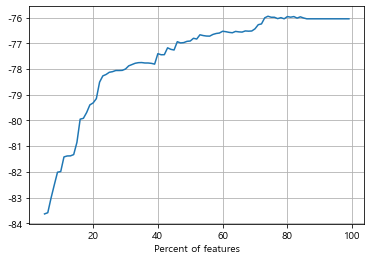

In [22]:
features_num = x_train_num
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = Ridge(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
# feature 개수 바꿔가며 성능 test한다.
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(x_train_num, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [23]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(x_train_num, y_train)
x_train_num = fs.transform(x_train_num)
x_test_num = fs.transform(x_test_num)

print(x_train_num.shape)
print(features_num.columns[fs.get_support()].tolist())

(21587, 714)
['총구매액', '평균구매액', '최고구매금액', '총환불금액', '총환불횟수', '총할인금액', '총실구매액', '평균실구매액', '수입상품구매건수', '1월방문', '2월방문', '3월방문', '4월방문', '5월방문', '6월방문', '7월방문', '8월방문', '9월방문', '10월방문', '11월방문', '12월방문', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x', '12_x', '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y', '9_y', '10_y', '11_y', '12_y', '1_x.1', '2_x.1', '4_x.1', '5_x.1', '6_x.1', '7_x.1', '8_x.1', '9_x.1', '10_x.1', '11_x.1', '12_x.1', '1_y.1', '2_y.1', '3_y.1', '4_y.1', '5_y.1', '6_y.1', '7_y.1', '8_y.1', '9_y.1', '10_y.1', '11_y.1', '12_y.1', '5_x.2', '6_x.2', '10_x.2', '11_x.2', '1_y.2', '2_y.2', '3_y.2', '4_y.2', '5_y.2', '6_y.2', '7_y.2', '8_y.2', '9_y.2', '10_y.2', '11_y.2', '12_y.2', '1_x.3', '2_x.3', '3_x.3', '4_x.3', '5_x.3', '6_x.3', '7_x.3', '8_x.3', '9_x.3', '10_x.3', '11_x.3', '12_x.3', '1월_구매상품다양성', '2월_구매상품다양성', '3월_구매상품다양성', '4월_구매상품다양성', '5월_구매상품다양성', '6월_구매상품다양성', '7월_구매상품다양성', '8월_구매상품다양성', '9월_구매상품다양성', '10월_구매상품다양성', '11월_구매상품다양성',

In [24]:
pd.DataFrame(x_train_num,columns=features_num.columns[fs.get_support()].tolist()).to_csv('x_train_num.csv')
pd.DataFrame(x_test_num,columns=features_num.columns[fs.get_support()].tolist()).to_csv('x_test_num.csv')

### Model Tuning

In [4]:
x_train_num = np.array(x_train_num)
x_test_num = np.array(x_test_num)

In [5]:
x_train_num2, x_dev_num, y_train2, y_dev = train_test_split(x_train_num, y_train, test_size=0.3, random_state=0)

In [27]:
pbounds = {
    'alpha':(0,50)
}
def rid_opt(alpha):
    params = {
        'alpha':alpha
    }
    rid = Ridge(random_state=0, **params)
    rid.fit(x_train_num2,y_train2)
    score = mean_squared_error(rid.predict(x_dev_num),y_dev,squared=False)
    return -score
BO_rid = BayesianOptimization(rid_opt, pbounds, random_state=0)
BO_rid.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -8.671    |  27.44    |
|  2        | -8.67     |  35.76    |
|  3        | -8.671    |  30.14    |
|  4        | -8.671    |  27.24    |
|  5        | -8.673    |  21.18    |
|  6        | -8.67     |  32.29    |
|  7        | -8.673    |  21.88    |
|  8        | -8.668    |  44.59    |
|  9        | -8.668    |  48.18    |
|  10       | -8.673    |  19.17    |
|  11       | -8.669    |  39.59    |
|  12       | -8.672    |  26.44    |
|  13       | -8.671    |  28.4     |
|  14       | -8.668    |  46.28    |
|  15       | -8.681    |  3.552    |
|  16       | -8.68     |  4.356    |
|  17       | -8.69     |  1.011    |
|  18       | -8.669    |  41.63    |
|  19       | -8.669    |  38.91    |
|  20       | -8.668    |  43.5     |
|  21       | -8.668    |  48.93    |
|  22       | -8.669    |  39.96    |
|  23       | -8.672    |  23.07    |
|  24       | -8.669    |  39.03    |
|  25       

In [28]:
BO_rid.max

{'target': -8.667463125604508, 'params': {'alpha': 50.0}}

In [32]:
pbounds = {
    'alpha':(0,50)
}
def las_opt(alpha):
    params = {
        'alpha':alpha
    }
    las = Lasso(random_state=0, **params)
    las.fit(x_train_num2,y_train2)
    score = mean_squared_error(las.predict(x_dev_num),y_dev,squared=False)
    return -score
BO_las = BayesianOptimization(las_opt, pbounds, random_state=0)
BO_las.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -9.609    |  27.44    |
|  2        | -9.61     |  35.76    |
|  3        | -9.609    |  30.14    |
|  4        | -9.609    |  27.24    |
|  5        | -9.609    |  21.18    |
|  6        | -9.61     |  32.29    |
|  7        | -9.609    |  21.88    |
|  8        | -9.61     |  44.59    |
|  9        | -9.61     |  48.18    |
|  10       | -9.609    |  19.17    |
|  11       | -9.61     |  39.59    |
|  12       | -9.609    |  26.44    |
|  13       | -9.609    |  28.4     |
|  14       | -9.61     |  46.28    |
|  15       | -9.55     |  3.552    |
|  16       | -9.594    |  4.356    |
|  17       | -9.398    |  1.011    |
|  18       | -9.61     |  41.63    |
|  19       | -9.61     |  38.91    |
|  20       | -9.61     |  43.5     |
|  21       | -9.611    |  48.93    |
|  22       | -9.61     |  39.96    |
|  23       | -9.609    |  23.07    |
|  24       | -9.61     |  39.03    |
|  25       

In [33]:
BO_las.max

{'target': -8.642137590851618, 'params': {'alpha': 0.014119912100490906}}

In [34]:
pbounds = {
    'alpha':(0,50)
}
def ela_opt(alpha):
    params = {
        'alpha':alpha
    }
    ela = ElasticNet(random_state=0, **params)
    ela.fit(x_train_num2,y_train2)
    score = mean_squared_error(ela.predict(x_dev_num),y_dev,squared=False)
    return -score
BO_ela = BayesianOptimization(ela_opt, pbounds, random_state=0)
BO_ela.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -9.609    |  27.44    |
|  2        | -9.609    |  35.76    |
|  3        | -9.609    |  30.14    |
|  4        | -9.609    |  27.24    |
|  5        | -9.609    |  21.18    |
|  6        | -9.609    |  32.29    |
|  7        | -9.609    |  21.88    |
|  8        | -9.609    |  44.59    |
|  9        | -9.609    |  48.18    |
|  10       | -9.609    |  19.17    |
|  11       | -9.609    |  39.59    |
|  12       | -9.609    |  26.44    |
|  13       | -9.609    |  28.4     |
|  14       | -9.609    |  46.28    |
|  15       | -9.484    |  3.552    |
|  16       | -9.499    |  4.356    |
|  17       | -9.219    |  1.011    |
|  18       | -9.609    |  41.63    |
|  19       | -9.609    |  38.91    |
|  20       | -9.609    |  43.5     |
|  21       | -9.609    |  48.93    |
|  22       | -9.609    |  39.96    |
|  23       | -9.609    |  23.07    |
|  24       | -9.609    |  39.03    |
|  25       

In [35]:
BO_ela.max

{'target': -8.644172800420511, 'params': {'alpha': 0.014117954757714157}}

In [36]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def ard_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    ard = ARDRegression(**params)
    ard.fit(x_train_num2,y_train2)
    score = mean_squared_error(ard.predict(x_dev_num),y_dev,squared=False)
    return -score
BO_ard = BayesianOptimization(ard_opt, pbounds, random_state=0)
BO_ard.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.664    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.664    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.676    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.664    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.676    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.663    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.666    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.675    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.659    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.677    |  33.53    |  10.52    |  1.2

|  58       | -8.665    |  21.03    |  41.34    |  8.306    |  9.41     |  140.4    |
|  59       | -8.664    |  0.2782   |  35.8     |  4.753    |  5.738    |  667.4    |
|  60       | -8.677    |  30.3     |  45.02    |  1.963    |  5.088    |  918.7    |
|  61       | -8.661    |  20.4     |  31.17    |  7.575    |  3.315    |  931.2    |
|  62       | -8.657    |  17.91    |  20.78    |  6.804    |  1.996    |  699.1    |
|  63       | -8.655    |  19.53    |  1.929    |  5.3      |  1.156    |  812.3    |
|  64       | -8.664    |  24.66    |  1.098    |  4.152    |  4.952    |  815.6    |
|  65       | -8.661    |  18.89    |  1.641    |  6.764    |  3.027    |  818.0    |
|  66       | -8.678    |  20.83    |  0.7011   |  0.002763 |  1.031    |  804.5    |
|  67       | -8.657    |  16.94    |  19.79    |  9.41     |  1.472    |  699.2    |
|  68       | -8.66     |  6.756    |  32.78    |  6.219    |  2.438    |  940.3    |
|  69       | -8.663    |  28.91    |  28.15    |  3.1

In [37]:
BO_ard.max

{'target': -8.634637100639557,
 'params': {'alpha_1': 20.449890751776614,
  'alpha_2': 0.0,
  'lambda_1': 0.0,
  'lambda_2': 0.0,
  'n_iter': 808.1953486453195}}

In [38]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def bay_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    bay = BayesianRidge(**params)
    bay.fit(x_train_num2,y_train2)
    score = mean_squared_error(bay.predict(x_dev_num),y_dev,squared=False)
    return -score
BO_bay = BayesianOptimization(bay_opt, pbounds, random_state=0)
BO_bay.maximize(init_points=50, n_iter=50)

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.67     |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.666    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.666    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.667    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.667    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.671    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.67     |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.665    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.688    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.674    |  33.53    |  10.52    |  1.2

|  58       | -8.676    |  25.63    |  47.55    |  4.656    |  2.756    |  200.0    |
|  59       | -8.67     |  0.2782   |  35.8     |  4.753    |  5.738    |  667.4    |
|  60       | -8.67     |  30.3     |  45.02    |  1.963    |  5.088    |  918.7    |
|  61       | -8.675    |  20.4     |  31.17    |  7.575    |  3.315    |  931.2    |
|  62       | -8.668    |  48.55    |  40.34    |  5.375    |  6.504    |  207.1    |
|  63       | -8.669    |  47.13    |  30.81    |  3.78     |  5.698    |  192.7    |
|  64       | -8.665    |  21.44    |  29.88    |  6.627    |  10.0     |  725.3    |
|  65       | -8.664    |  21.33    |  28.42    |  0.0      |  10.0     |  193.2    |
|  66       | -8.666    |  37.37    |  27.07    |  2.45     |  8.067    |  205.5    |
|  67       | -8.664    |  27.92    |  25.37    |  0.01896  |  10.0     |  763.4    |
|  68       | -8.667    |  32.73    |  35.64    |  4.992    |  7.456    |  749.0    |
|  69       | -8.666    |  18.11    |  20.54    |  9.7

In [39]:
BO_bay.max

{'target': -8.664437496255472,
 'params': {'alpha_1': 43.95893059483891,
  'alpha_2': 43.9051999779049,
  'lambda_1': 0.0,
  'lambda_2': 10.0,
  'n_iter': 463.77606221371764}}

In [40]:
pbounds = {
    'n_estimators':(100,1000),
    'learning_rate':(0,1),
    'max_depth':(2, 32),
    'num_leaves':(2, 64),
    'min_child_samples':(10, 200),
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha':(0.01, 50)
}
def lgbm_opt(n_estimators, learning_rate, max_depth, num_leaves, min_child_samples, min_child_weight,
             subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":int(round(n_estimators)), 
        "learning_rate":learning_rate,
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha
    }
    lgbm = LGBMRegressor(random_state=0, **params)
    lgbm.fit(x_train_num2,y_train2)
    score = mean_squared_error(lgbm.predict(x_dev_num),y_dev,squared=False)
    return -score
BO_lgbm = BayesianOptimization(lgbm_opt, pbounds, random_state=0)
BO_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -10.27    |  0.7744   |  0.7152   |  305.4    |  18.35    |  90.49    |  32.65    |  493.8    |  57.29    |  48.18    |  3.835    |  0.8959   |
|  2        | -9.708    |  0.7644   |  0.568    |  463.5    |  4.131    |  26.55    |  1.991    |  849.4    |  50.25    |  43.5     |  9.786    |  0.8996   |
|  3        | -10.63    |  0.7307   |  0.7805   |  67.95    |  21.2     |  37.24    |  47.29    |  569.7    |  27.71    |  13.24    |  7.743    |  0.7281   |
|  4        | -8.533    |  0.7842   |  0.01879  |  312.6    |  20.36    |  127.2    |  47.24    |  713.6    |  24.29    |  21.86    |  6.977    |  0.5301   |
|  5        | -10.16    |  0.8334   |  0.6706   |  1

|  31       | -10.37    |  0.5906   |  0.7885   |  37.86    |  22.91    |  158.0    |  39.09    |  333.5    |  25.18    |  29.38    |  2.729    |  0.6854   |
|  32       | -9.496    |  0.5985   |  0.4599   |  31.86    |  25.99    |  24.62    |  26.42    |  376.1    |  37.81    |  47.97    |  6.456    |  0.5177   |
|  33       | -9.757    |  0.7152   |  0.51     |  272.7    |  22.44    |  62.74    |  7.314    |  453.4    |  61.3     |  9.365    |  9.04     |  0.7719   |
|  34       | -11.06    |  0.7285   |  0.882    |  234.7    |  23.73    |  85.81    |  45.3     |  721.0    |  45.38    |  16.39    |  7.568    |  0.818    |
|  35       | -8.923    |  0.62     |  0.1605   |  400.2    |  30.77    |  97.05    |  29.96    |  872.0    |  30.35    |  47.59    |  5.758    |  0.9104   |
|  36       | -10.69    |  0.9544   |  0.8155   |  88.11    |  20.87    |  85.7     |  4.073    |  481.6    |  18.04    |  42.45    |  0.334    |  0.9795   |
|  37       | -9.266    |  0.6777   |  0.3567   |  1

|  63       | -10.1     |  0.9796   |  0.7223   |  51.32    |  3.758    |  101.6    |  24.2     |  847.7    |  61.99    |  40.38    |  9.155    |  0.6278   |
|  64       | -10.22    |  0.7356   |  0.7135   |  488.5    |  9.391    |  58.16    |  3.945    |  808.2    |  13.75    |  29.08    |  0.3623   |  0.826    |
|  65       | -9.378    |  0.6494   |  0.3711   |  95.2     |  27.03    |  59.61    |  27.15    |  750.1    |  56.99    |  48.03    |  2.136    |  0.9709   |
|  66       | -10.81    |  0.6605   |  0.8269   |  21.69    |  6.07     |  103.9    |  48.36    |  448.1    |  25.99    |  15.68    |  2.526    |  0.9264   |
|  67       | -9.106    |  0.7637   |  0.001914 |  312.3    |  19.34    |  121.8    |  43.99    |  714.1    |  22.72    |  17.79    |  7.101    |  0.7602   |
|  68       | -8.921    |  0.6773   |  0.2712   |  38.97    |  10.57    |  131.4    |  7.819    |  288.2    |  13.94    |  29.63    |  9.091    |  0.5968   |
|  69       | -10.09    |  0.6716   |  0.6738   |  2

|  95       | -9.225    |  0.9613   |  0.3799   |  456.2    |  8.715    |  63.04    |  34.5     |  550.1    |  8.451    |  10.06    |  4.525    |  0.593    |
|  96       | -9.323    |  0.5663   |  0.3277   |  285.1    |  26.67    |  118.4    |  29.2     |  683.6    |  39.87    |  42.44    |  6.335    |  0.6376   |
|  97       | -10.66    |  0.6791   |  0.7894   |  297.4    |  14.82    |  37.22    |  12.59    |  895.9    |  38.48    |  16.15    |  5.271    |  0.9826   |
|  98       | -9.639    |  0.6166   |  0.4523   |  24.02    |  5.59     |  93.81    |  8.643    |  325.7    |  27.52    |  18.51    |  0.3086   |  0.5183   |
|  99       | -10.14    |  0.6984   |  0.6325   |  419.0    |  9.997    |  187.6    |  27.5     |  982.0    |  48.23    |  25.89    |  2.976    |  0.7618   |
|  100      | -8.766    |  0.5111   |  0.09371  |  312.9    |  14.69    |  45.71    |  17.27    |  889.0    |  39.94    |  18.38    |  8.042    |  0.7371   |


In [41]:
BO_lgbm.max

{'target': -8.532623449222639,
 'params': {'colsample_bytree': 0.7842169744343243,
  'learning_rate': 0.018789800436355142,
  'max_bin': 312.64139356717976,
  'max_depth': 20.362871681672644,
  'min_child_samples': 127.21745940620382,
  'min_child_weight': 47.24365584721659,
  'n_estimators': 713.6382691931351,
  'num_leaves': 24.289489835574734,
  'reg_alpha': 21.857227370429083,
  'reg_lambda': 6.976614328076722,
  'subsample': 0.5301127358146349}}

In [42]:
max_params_rid = BO_rid.max['params']
max_params_las = BO_las.max['params']
max_params_ela = BO_ela.max['params']
max_params_ard = BO_ard.max['params']
max_params_bay = BO_bay.max['params']
max_params_lgbm = BO_lgbm.max['params']

In [43]:
max_params_ard['n_iter'] = int(round(max_params_ard['n_iter']))

max_params_bay['n_iter'] = int(round(max_params_bay['n_iter']))

max_params_lgbm['num_leaves'] = int(round(max_params_lgbm['num_leaves']))
max_params_lgbm['n_estimators'] = int(round(max_params_lgbm['n_estimators']))
max_params_lgbm['max_depth'] = int(round(max_params_lgbm['max_depth']))
max_params_lgbm['min_child_samples'] = int(round(max_params_lgbm['min_child_samples']))
max_params_lgbm['min_child_weight'] = int(round(max_params_lgbm['min_child_weight']))
max_params_lgbm['max_bin'] = int(round(max_params_lgbm['max_bin']))
max_params_lgbm['subsample'] = max(min(max_params_lgbm['subsample'], 1), 0)
max_params_lgbm['colsample_bytree'] = max(min(max_params_lgbm['colsample_bytree'], 1), 0)

In [44]:
print(max_params_rid,'\n',max_params_las,'\n',max_params_ela,'\n',max_params_ard,'\n',max_params_bay,'\n',max_params_lgbm,'\n')

{'alpha': 50.0} 
 {'alpha': 0.014119912100490906} 
 {'alpha': 0.014117954757714157} 
 {'alpha_1': 20.449890751776614, 'alpha_2': 0.0, 'lambda_1': 0.0, 'lambda_2': 0.0, 'n_iter': 808} 
 {'alpha_1': 43.95893059483891, 'alpha_2': 43.9051999779049, 'lambda_1': 0.0, 'lambda_2': 10.0, 'n_iter': 464} 
 {'colsample_bytree': 0.7842169744343243, 'learning_rate': 0.018789800436355142, 'max_bin': 313, 'max_depth': 20, 'min_child_samples': 127, 'min_child_weight': 47, 'n_estimators': 714, 'num_leaves': 24, 'reg_alpha': 21.857227370429083, 'reg_lambda': 6.976614328076722, 'subsample': 0.5301127358146349} 



In [7]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained = [(name, reg.fit(x_train_num2,y_train2), float(mean_squared_error(reg.predict(x_dev_num),y_dev,squared=False))) 
                    for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:54<00:12, 12.81s/it]

Learning rate set to 0.063286
0:	learn: 10.3261186	total: 218ms	remaining: 3m 37s
1:	learn: 10.2191094	total: 273ms	remaining: 2m 16s
2:	learn: 10.1261834	total: 339ms	remaining: 1m 52s
3:	learn: 10.0358534	total: 417ms	remaining: 1m 43s
4:	learn: 9.9597150	total: 495ms	remaining: 1m 38s
5:	learn: 9.8862856	total: 580ms	remaining: 1m 36s
6:	learn: 9.8200655	total: 658ms	remaining: 1m 33s
7:	learn: 9.7579051	total: 730ms	remaining: 1m 30s
8:	learn: 9.6963807	total: 808ms	remaining: 1m 28s
9:	learn: 9.6420740	total: 877ms	remaining: 1m 26s
10:	learn: 9.5906582	total: 936ms	remaining: 1m 24s
11:	learn: 9.5428278	total: 1s	remaining: 1m 22s
12:	learn: 9.5003367	total: 1.06s	remaining: 1m 20s
13:	learn: 9.4622022	total: 1.12s	remaining: 1m 19s
14:	learn: 9.4196709	total: 1.19s	remaining: 1m 17s
15:	learn: 9.3752189	total: 1.24s	remaining: 1m 16s
16:	learn: 9.3339604	total: 1.3s	remaining: 1m 15s
17:	learn: 9.2985565	total: 1.36s	remaining: 1m 14s
18:	learn: 9.2705124	total: 1.42s	remaining:

162:	learn: 8.1500833	total: 9.87s	remaining: 50.7s
163:	learn: 8.1460717	total: 9.93s	remaining: 50.6s
164:	learn: 8.1419123	total: 9.99s	remaining: 50.5s
165:	learn: 8.1380425	total: 10s	remaining: 50.5s
166:	learn: 8.1332978	total: 10.1s	remaining: 50.4s
167:	learn: 8.1290374	total: 10.2s	remaining: 50.3s
168:	learn: 8.1241933	total: 10.2s	remaining: 50.3s
169:	learn: 8.1197649	total: 10.3s	remaining: 50.2s
170:	learn: 8.1158259	total: 10.3s	remaining: 50.2s
171:	learn: 8.1108128	total: 10.4s	remaining: 50.1s
172:	learn: 8.1057737	total: 10.5s	remaining: 50s
173:	learn: 8.1007870	total: 10.5s	remaining: 50s
174:	learn: 8.0964048	total: 10.6s	remaining: 49.9s
175:	learn: 8.0916124	total: 10.6s	remaining: 49.8s
176:	learn: 8.0869268	total: 10.7s	remaining: 49.7s
177:	learn: 8.0824256	total: 10.7s	remaining: 49.6s
178:	learn: 8.0780224	total: 10.8s	remaining: 49.5s
179:	learn: 8.0728250	total: 10.9s	remaining: 49.5s
180:	learn: 8.0692353	total: 10.9s	remaining: 49.4s
181:	learn: 8.0643

323:	learn: 7.4643565	total: 19.4s	remaining: 40.5s
324:	learn: 7.4611742	total: 19.5s	remaining: 40.4s
325:	learn: 7.4584227	total: 19.5s	remaining: 40.4s
326:	learn: 7.4543766	total: 19.6s	remaining: 40.3s
327:	learn: 7.4511293	total: 19.6s	remaining: 40.2s
328:	learn: 7.4465322	total: 19.7s	remaining: 40.2s
329:	learn: 7.4428353	total: 19.8s	remaining: 40.1s
330:	learn: 7.4383068	total: 19.8s	remaining: 40.1s
331:	learn: 7.4338709	total: 19.9s	remaining: 40s
332:	learn: 7.4305702	total: 20s	remaining: 40s
333:	learn: 7.4271099	total: 20s	remaining: 39.9s
334:	learn: 7.4226921	total: 20.1s	remaining: 39.8s
335:	learn: 7.4193530	total: 20.1s	remaining: 39.8s
336:	learn: 7.4154458	total: 20.2s	remaining: 39.7s
337:	learn: 7.4114577	total: 20.2s	remaining: 39.6s
338:	learn: 7.4073418	total: 20.3s	remaining: 39.6s
339:	learn: 7.4043976	total: 20.4s	remaining: 39.5s
340:	learn: 7.4012499	total: 20.4s	remaining: 39.5s
341:	learn: 7.3966822	total: 20.5s	remaining: 39.4s
342:	learn: 7.393319

485:	learn: 6.9046385	total: 29.2s	remaining: 30.9s
486:	learn: 6.9009699	total: 29.2s	remaining: 30.8s
487:	learn: 6.8981264	total: 29.3s	remaining: 30.8s
488:	learn: 6.8942789	total: 29.4s	remaining: 30.7s
489:	learn: 6.8907453	total: 29.4s	remaining: 30.6s
490:	learn: 6.8878833	total: 29.5s	remaining: 30.6s
491:	learn: 6.8846535	total: 29.6s	remaining: 30.5s
492:	learn: 6.8824972	total: 29.6s	remaining: 30.5s
493:	learn: 6.8797203	total: 29.7s	remaining: 30.4s
494:	learn: 6.8758322	total: 29.8s	remaining: 30.4s
495:	learn: 6.8730586	total: 29.8s	remaining: 30.3s
496:	learn: 6.8693595	total: 29.9s	remaining: 30.3s
497:	learn: 6.8663338	total: 30s	remaining: 30.2s
498:	learn: 6.8625915	total: 30s	remaining: 30.2s
499:	learn: 6.8594953	total: 30.1s	remaining: 30.1s
500:	learn: 6.8562704	total: 30.2s	remaining: 30.1s
501:	learn: 6.8522188	total: 30.2s	remaining: 30s
502:	learn: 6.8489307	total: 30.3s	remaining: 29.9s
503:	learn: 6.8462693	total: 30.4s	remaining: 29.9s
504:	learn: 6.8427

644:	learn: 6.4176467	total: 39.6s	remaining: 21.8s
645:	learn: 6.4146240	total: 39.7s	remaining: 21.7s
646:	learn: 6.4118431	total: 39.8s	remaining: 21.7s
647:	learn: 6.4098192	total: 39.8s	remaining: 21.6s
648:	learn: 6.4074467	total: 39.9s	remaining: 21.6s
649:	learn: 6.4039888	total: 40s	remaining: 21.5s
650:	learn: 6.4012022	total: 40s	remaining: 21.5s
651:	learn: 6.3988381	total: 40.1s	remaining: 21.4s
652:	learn: 6.3962747	total: 40.1s	remaining: 21.3s
653:	learn: 6.3932215	total: 40.2s	remaining: 21.3s
654:	learn: 6.3905603	total: 40.3s	remaining: 21.2s
655:	learn: 6.3878800	total: 40.3s	remaining: 21.1s
656:	learn: 6.3850674	total: 40.4s	remaining: 21.1s
657:	learn: 6.3831612	total: 40.5s	remaining: 21s
658:	learn: 6.3807372	total: 40.5s	remaining: 21s
659:	learn: 6.3779537	total: 40.6s	remaining: 20.9s
660:	learn: 6.3747287	total: 40.6s	remaining: 20.8s
661:	learn: 6.3725343	total: 40.7s	remaining: 20.8s
662:	learn: 6.3699070	total: 40.8s	remaining: 20.7s
663:	learn: 6.367299

806:	learn: 5.9829214	total: 49.9s	remaining: 11.9s
807:	learn: 5.9801353	total: 49.9s	remaining: 11.9s
808:	learn: 5.9777440	total: 50s	remaining: 11.8s
809:	learn: 5.9754764	total: 50.1s	remaining: 11.7s
810:	learn: 5.9728957	total: 50.1s	remaining: 11.7s
811:	learn: 5.9702767	total: 50.2s	remaining: 11.6s
812:	learn: 5.9676679	total: 50.2s	remaining: 11.6s
813:	learn: 5.9654552	total: 50.3s	remaining: 11.5s
814:	learn: 5.9623167	total: 50.4s	remaining: 11.4s
815:	learn: 5.9596083	total: 50.4s	remaining: 11.4s
816:	learn: 5.9568064	total: 50.5s	remaining: 11.3s
817:	learn: 5.9541054	total: 50.5s	remaining: 11.2s
818:	learn: 5.9520505	total: 50.6s	remaining: 11.2s
819:	learn: 5.9497712	total: 50.7s	remaining: 11.1s
820:	learn: 5.9472008	total: 50.7s	remaining: 11.1s
821:	learn: 5.9452001	total: 50.8s	remaining: 11s
822:	learn: 5.9425962	total: 50.9s	remaining: 10.9s
823:	learn: 5.9401482	total: 50.9s	remaining: 10.9s
824:	learn: 5.9377943	total: 51s	remaining: 10.8s
825:	learn: 5.9357

966:	learn: 5.5948512	total: 59.6s	remaining: 2.03s
967:	learn: 5.5923595	total: 59.7s	remaining: 1.97s
968:	learn: 5.5896089	total: 59.7s	remaining: 1.91s
969:	learn: 5.5874678	total: 59.8s	remaining: 1.85s
970:	learn: 5.5850491	total: 59.9s	remaining: 1.79s
971:	learn: 5.5825836	total: 59.9s	remaining: 1.73s
972:	learn: 5.5807994	total: 60s	remaining: 1.66s
973:	learn: 5.5787197	total: 1m	remaining: 1.6s
974:	learn: 5.5764297	total: 1m	remaining: 1.54s
975:	learn: 5.5738146	total: 1m	remaining: 1.48s
976:	learn: 5.5709914	total: 1m	remaining: 1.42s
977:	learn: 5.5687259	total: 1m	remaining: 1.35s
978:	learn: 5.5664558	total: 1m	remaining: 1.29s
979:	learn: 5.5646732	total: 1m	remaining: 1.23s
980:	learn: 5.5624387	total: 1m	remaining: 1.17s
981:	learn: 5.5603735	total: 1m	remaining: 1.11s
982:	learn: 5.5572184	total: 1m	remaining: 1.05s
983:	learn: 5.5549088	total: 1m	remaining: 986ms
984:	learn: 5.5535800	total: 1m	remaining: 924ms
985:	learn: 5.5515680	total: 1m	remaining: 862ms
98

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:01<00:00, 17.33s/it]


In [8]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained_for_submissions = [(name, reg.fit(x_train_num,y_train)) for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:26<00:19, 19.52s/it]

Learning rate set to 0.067435
0:	learn: 10.3172733	total: 106ms	remaining: 1m 46s
1:	learn: 10.1969706	total: 179ms	remaining: 1m 29s
2:	learn: 10.0965094	total: 264ms	remaining: 1m 27s
3:	learn: 10.0001525	total: 334ms	remaining: 1m 23s
4:	learn: 9.9150227	total: 406ms	remaining: 1m 20s
5:	learn: 9.8310776	total: 477ms	remaining: 1m 19s
6:	learn: 9.7619866	total: 548ms	remaining: 1m 17s
7:	learn: 9.6959803	total: 620ms	remaining: 1m 16s
8:	learn: 9.6334950	total: 694ms	remaining: 1m 16s
9:	learn: 9.5775963	total: 768ms	remaining: 1m 16s
10:	learn: 9.5272591	total: 833ms	remaining: 1m 14s
11:	learn: 9.4829740	total: 903ms	remaining: 1m 14s
12:	learn: 9.4411798	total: 972ms	remaining: 1m 13s
13:	learn: 9.3977487	total: 1.05s	remaining: 1m 13s
14:	learn: 9.3544797	total: 1.13s	remaining: 1m 14s
15:	learn: 9.3096614	total: 1.2s	remaining: 1m 14s
16:	learn: 9.2760582	total: 1.28s	remaining: 1m 14s
17:	learn: 9.2419465	total: 1.36s	remaining: 1m 14s
18:	learn: 9.2095353	total: 1.44s	remaini

159:	learn: 8.2316122	total: 12.6s	remaining: 1m 6s
160:	learn: 8.2268566	total: 12.7s	remaining: 1m 6s
161:	learn: 8.2227673	total: 12.8s	remaining: 1m 6s
162:	learn: 8.2188783	total: 12.8s	remaining: 1m 5s
163:	learn: 8.2158343	total: 12.9s	remaining: 1m 5s
164:	learn: 8.2121634	total: 13s	remaining: 1m 5s
165:	learn: 8.2084460	total: 13.1s	remaining: 1m 5s
166:	learn: 8.2050580	total: 13.2s	remaining: 1m 5s
167:	learn: 8.2012920	total: 13.2s	remaining: 1m 5s
168:	learn: 8.1984220	total: 13.3s	remaining: 1m 5s
169:	learn: 8.1945759	total: 13.4s	remaining: 1m 5s
170:	learn: 8.1909798	total: 13.5s	remaining: 1m 5s
171:	learn: 8.1869747	total: 13.6s	remaining: 1m 5s
172:	learn: 8.1826691	total: 13.6s	remaining: 1m 5s
173:	learn: 8.1784462	total: 13.7s	remaining: 1m 5s
174:	learn: 8.1744272	total: 13.8s	remaining: 1m 5s
175:	learn: 8.1707711	total: 13.9s	remaining: 1m 5s
176:	learn: 8.1664314	total: 14s	remaining: 1m 4s
177:	learn: 8.1630129	total: 14.1s	remaining: 1m 4s
178:	learn: 8.15

319:	learn: 7.6771566	total: 27.4s	remaining: 58.2s
320:	learn: 7.6745807	total: 27.5s	remaining: 58.1s
321:	learn: 7.6719883	total: 27.5s	remaining: 58s
322:	learn: 7.6688097	total: 27.6s	remaining: 57.8s
323:	learn: 7.6653430	total: 27.7s	remaining: 57.7s
324:	learn: 7.6618385	total: 27.8s	remaining: 57.7s
325:	learn: 7.6587567	total: 27.8s	remaining: 57.6s
326:	learn: 7.6556670	total: 27.9s	remaining: 57.4s
327:	learn: 7.6526345	total: 28s	remaining: 57.3s
328:	learn: 7.6499666	total: 28s	remaining: 57.2s
329:	learn: 7.6468725	total: 28.1s	remaining: 57.1s
330:	learn: 7.6433745	total: 28.2s	remaining: 57s
331:	learn: 7.6400117	total: 28.3s	remaining: 56.9s
332:	learn: 7.6368753	total: 28.3s	remaining: 56.8s
333:	learn: 7.6322915	total: 28.4s	remaining: 56.7s
334:	learn: 7.6292568	total: 28.5s	remaining: 56.6s
335:	learn: 7.6256599	total: 28.6s	remaining: 56.5s
336:	learn: 7.6226629	total: 28.6s	remaining: 56.3s
337:	learn: 7.6199080	total: 28.7s	remaining: 56.2s
338:	learn: 7.617291

479:	learn: 7.2211449	total: 39.5s	remaining: 42.8s
480:	learn: 7.2182611	total: 39.6s	remaining: 42.8s
481:	learn: 7.2162911	total: 39.7s	remaining: 42.7s
482:	learn: 7.2149202	total: 39.8s	remaining: 42.6s
483:	learn: 7.2118699	total: 39.9s	remaining: 42.5s
484:	learn: 7.2099188	total: 39.9s	remaining: 42.4s
485:	learn: 7.2070631	total: 40s	remaining: 42.3s
486:	learn: 7.2054187	total: 40.1s	remaining: 42.2s
487:	learn: 7.2028488	total: 40.2s	remaining: 42.1s
488:	learn: 7.1998563	total: 40.2s	remaining: 42s
489:	learn: 7.1982682	total: 40.3s	remaining: 42s
490:	learn: 7.1958676	total: 40.4s	remaining: 41.9s
491:	learn: 7.1929146	total: 40.4s	remaining: 41.8s
492:	learn: 7.1898754	total: 40.5s	remaining: 41.7s
493:	learn: 7.1865475	total: 40.6s	remaining: 41.6s
494:	learn: 7.1841292	total: 40.7s	remaining: 41.5s
495:	learn: 7.1816885	total: 40.7s	remaining: 41.4s
496:	learn: 7.1792984	total: 40.8s	remaining: 41.3s
497:	learn: 7.1767329	total: 40.9s	remaining: 41.2s
498:	learn: 7.1743

639:	learn: 6.8218518	total: 51.7s	remaining: 29.1s
640:	learn: 6.8187232	total: 51.8s	remaining: 29s
641:	learn: 6.8160781	total: 51.9s	remaining: 28.9s
642:	learn: 6.8132001	total: 52s	remaining: 28.8s
643:	learn: 6.8115159	total: 52s	remaining: 28.8s
644:	learn: 6.8092819	total: 52.1s	remaining: 28.7s
645:	learn: 6.8066650	total: 52.2s	remaining: 28.6s
646:	learn: 6.8039219	total: 52.3s	remaining: 28.5s
647:	learn: 6.8016069	total: 52.3s	remaining: 28.4s
648:	learn: 6.7994353	total: 52.4s	remaining: 28.3s
649:	learn: 6.7967676	total: 52.5s	remaining: 28.3s
650:	learn: 6.7947304	total: 52.5s	remaining: 28.2s
651:	learn: 6.7923659	total: 52.6s	remaining: 28.1s
652:	learn: 6.7897843	total: 52.7s	remaining: 28s
653:	learn: 6.7872477	total: 52.8s	remaining: 27.9s
654:	learn: 6.7843572	total: 52.8s	remaining: 27.8s
655:	learn: 6.7815628	total: 52.9s	remaining: 27.8s
656:	learn: 6.7795612	total: 53s	remaining: 27.7s
657:	learn: 6.7775802	total: 53.1s	remaining: 27.6s
658:	learn: 6.7755037	

801:	learn: 6.4592128	total: 1m 4s	remaining: 15.9s
802:	learn: 6.4578319	total: 1m 4s	remaining: 15.8s
803:	learn: 6.4561995	total: 1m 4s	remaining: 15.7s
804:	learn: 6.4537877	total: 1m 4s	remaining: 15.6s
805:	learn: 6.4517066	total: 1m 4s	remaining: 15.6s
806:	learn: 6.4502831	total: 1m 4s	remaining: 15.5s
807:	learn: 6.4479171	total: 1m 4s	remaining: 15.4s
808:	learn: 6.4461003	total: 1m 4s	remaining: 15.3s
809:	learn: 6.4442024	total: 1m 4s	remaining: 15.2s
810:	learn: 6.4422381	total: 1m 5s	remaining: 15.2s
811:	learn: 6.4404148	total: 1m 5s	remaining: 15.1s
812:	learn: 6.4382541	total: 1m 5s	remaining: 15s
813:	learn: 6.4357834	total: 1m 5s	remaining: 14.9s
814:	learn: 6.4335467	total: 1m 5s	remaining: 14.8s
815:	learn: 6.4314506	total: 1m 5s	remaining: 14.8s
816:	learn: 6.4295515	total: 1m 5s	remaining: 14.7s
817:	learn: 6.4274390	total: 1m 5s	remaining: 14.6s
818:	learn: 6.4258143	total: 1m 5s	remaining: 14.5s
819:	learn: 6.4231313	total: 1m 5s	remaining: 14.4s
820:	learn: 6.

958:	learn: 6.1442518	total: 1m 16s	remaining: 3.27s
959:	learn: 6.1420800	total: 1m 16s	remaining: 3.19s
960:	learn: 6.1396387	total: 1m 16s	remaining: 3.11s
961:	learn: 6.1378206	total: 1m 16s	remaining: 3.03s
962:	learn: 6.1360208	total: 1m 16s	remaining: 2.95s
963:	learn: 6.1339805	total: 1m 16s	remaining: 2.88s
964:	learn: 6.1322706	total: 1m 17s	remaining: 2.79s
965:	learn: 6.1310059	total: 1m 17s	remaining: 2.71s
966:	learn: 6.1289217	total: 1m 17s	remaining: 2.63s
967:	learn: 6.1271447	total: 1m 17s	remaining: 2.56s
968:	learn: 6.1258068	total: 1m 17s	remaining: 2.48s
969:	learn: 6.1242309	total: 1m 17s	remaining: 2.4s
970:	learn: 6.1216704	total: 1m 17s	remaining: 2.31s
971:	learn: 6.1193189	total: 1m 17s	remaining: 2.24s
972:	learn: 6.1175039	total: 1m 17s	remaining: 2.16s
973:	learn: 6.1160851	total: 1m 17s	remaining: 2.08s
974:	learn: 6.1135887	total: 1m 17s	remaining: 2s
975:	learn: 6.1119592	total: 1m 17s	remaining: 1.92s
976:	learn: 6.1109770	total: 1m 17s	remaining: 1.8

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:46<00:00, 23.80s/it]


In [9]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

### Model Ensemble

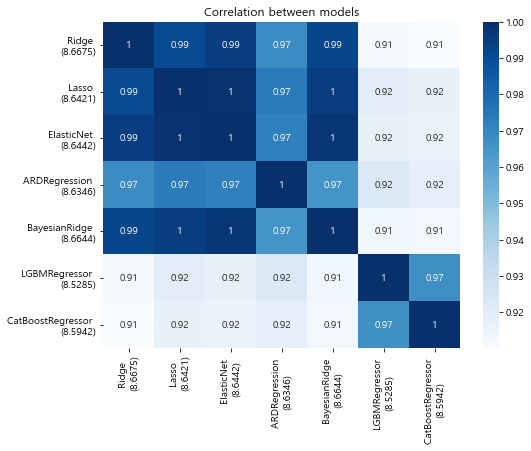

In [58]:
pred_results = []
for name, reg, reg_score in regs_trained:
    pred = list(reg.predict(x_dev_num))
    name = f'{name} \n({reg_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)
ensemble_results = ensemble_results.applymap(lambda x: float(x))

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

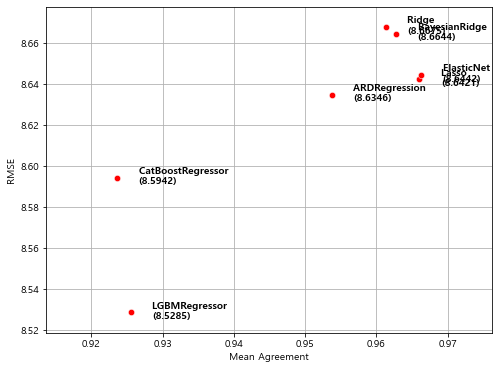

In [59]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
rmse = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'rmse': rmse, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="rmse", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.rmse[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.rmse.min()-0.01,df.rmse.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [86]:
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
for name, model in models_for_ensemble:
    results_for_ensemble.append(model.predict(x_dev_num))
avg_test = (results_for_ensemble[0]+results_for_ensemble[1]+results_for_ensemble[2])/len(results_for_ensemble)
score = mean_squared_error(avg_test, y_dev, squared=False)
score

8.496977839965675

In [69]:
# 최적의 가중치 찾기 
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
weights_avg = []
rmse_best = 1000
for i in tqdm(range(1, 30, 1)):
    for j in range(1, 30, 1):
        for k in range(1, 30, 1):
            if (i+j+k) != 30:
                continue
            pred = (models_for_ensemble[0][1].predict(x_dev_num) * i + models_for_ensemble[1][1].predict(x_dev_num) * j
                    + models_for_ensemble[2][1].predict(x_dev_num) * k)/30
            rmse = np.sqrt(mean_squared_error(y_dev, pred))
            if rmse < rmse_best:
                weights_avg = [i,j,k]
                rmse_best = rmse 
                print(rmse, i,j,k)            

print(rmse_best, weights_avg)


  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

8.57801156611478 1 1 28
8.57178564532553 1 2 27
8.565868742889254 1 3 26
8.56026149959181 1 4 25
8.55496452431972 1 5 24
8.549978393734833 1 6 23
8.545303651964884 1 7 22
8.540940810310344 1 8 21
8.536890346967885 1 9 20
8.533152706770847 1 10 19
8.529728300947001 1 11 18
8.526617506893936 1 12 17
8.523820667972348 1 13 16
8.521338093317468 1 14 15
8.519170057668914 1 15 14
8.51731680121916 1 16 13
8.515778529480801 1 17 12
8.514555413172824 1 18 11
8.51364758812599 1 19 10
8.513055155207486 1 20 9
8.512778180264913 1 21 8



  3%|██▊                                                                                | 1/29 [00:37<17:24, 37.30s/it]

8.511372705284638 2 16 12
8.510024570632837 2 17 11
8.508991861981846 2 18 10
8.508274694188028 2 19 9
8.507873147046558 2 20 8
8.507787265247046 2 21 7



  7%|█████▋                                                                             | 2/29 [01:14<16:39, 37.01s/it]

8.507666139114516 3 15 12
8.506192975875388 3 16 11
8.505035343901653 3 17 10
8.504193372048242 3 18 9
8.503667154078327 3 19 8
8.50345674861114 3 20 7



 10%|████████▌                                                                          | 3/29 [01:49<15:38, 36.10s/it]

8.503061574172106 4 15 11
8.501779010067985 4 16 10
8.500812195778197 4 17 9
8.500161239043559 4 18 8
8.499826212433646 4 19 7
8.499807153306369 4 20 6



 14%|███████████▍                                                                       | 4/29 [02:23<14:41, 35.25s/it]

8.499223665272142 5 15 10
8.4981320010851 5 16 9
8.497356268475487 5 17 8
8.49689655397317 5 18 7
8.496752908872361 5 19 6



 17%|██████████████▎                                                                    | 5/29 [02:56<13:51, 34.64s/it]

8.496153451363456 6 15 9
8.495252936689646 6 16 8
8.494668498390112 6 17 7
8.494400201705652 6 18 6



 21%|█████████████████▏                                                                 | 6/29 [03:30<13:08, 34.30s/it]

8.493851764926301 7 15 8
8.493142597851207 7 16 7
8.492749614837134 7 17 6
8.49267285977661 7 18 5



 24%|████████████████████                                                               | 7/29 [03:59<12:00, 32.76s/it]

8.492319230846272 8 15 7
8.491801557688968 8 16 6
8.491600139062399 8 17 5



 28%|██████████████████████▉                                                            | 8/29 [04:28<10:58, 31.35s/it]

8.491556265567255 9 15 6
8.49123018069444 9 16 5
8.491220383535346 9 17 4



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [09:07<00:00, 18.88s/it]

8.491220383535346 [9, 17, 4]


In [10]:
weights_avg = [9,17,4]

In [11]:
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
i,j,k = weights_avg
avg_test_result = (models_for_ensemble[0][1].predict(x_dev_num).flatten()*i + models_for_ensemble[1][1].predict(x_dev_num)*j + 
       models_for_ensemble[2][1].predict(x_dev_num)*k)/30

In [88]:
pd.DataFrame({'age': avg_test_result}).to_csv('numeric_averaging_ard9_lgbm17_cat4_dev.csv', index=False)

### Deep Neural Network
'dnn_num.krs'

In [12]:
def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(99)
    # seed를 잘 설정하면 성능이 더 잘 오른다.
    random.seed(9)
    tf.compat.v1.set_random_seed(16)
#    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


In [13]:
i = int(round(x_train_num2.shape[0] * 0.8,0))
x_val_num, y_val = x_train_num2[i:], y_train2[i:]
x_train_num3, y_train3 = x_train_num2[:i], y_train2[:i]

In [20]:
def model_fn(hp):
    inputs = tf.keras.Input(shape=(x_train_num3.shape[1],))
    x = inputs
    for i in range(hp.Int('num_layers', 2, 4, step=1)):
        x = tf.keras.layers.Dense(hp.Int('unit_'+str(i), 16, 256, step=16),
                               activation=hp.Choice('activation',['relu','tanh']))(x)
        x = tf.keras.layers.Dropout(hp.Float('dropout_'+str(i), 0, 0.7, step=0.1, default=0.5))(x)
    outputs = tf.keras.layers.Dense(1, activation='linear')(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='mse', 
                  optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])), 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# keras tuner는 튜닝 종류가 4종류가 있음: hyperband, grid search, random search, bayesian optimization
tuner = kt.Hyperband(model_fn,
                     objective=kt.Objective('val_root_mean_squared_error', direction="min"), 
                     max_epochs=30,
                     hyperband_iterations=2,
                     overwrite=True,
                     directory='dnn_tuning')
# objective: 튜닝 기준, hyperband_iterations:이거 자체에서 2번 반복
# overwrite: False시, 기존을 근거로 해 재학습 안시킴

tuner.search(x_train_num3, y_train3, validation_data=(x_val_num, y_val),
             callbacks=[tf.keras.callbacks.EarlyStopping()])
# 빨리 끝내려고 파라미터 저렇게 설정한 것임

Trial 180 Complete [00h 00m 04s]
val_root_mean_squared_error: 10.170742988586426

Best val_root_mean_squared_error So Far: 9.715433120727539
Total elapsed time: 00h 22m 39s
INFO:tensorflow:Oracle triggered exit


In [21]:
tuner.results_summary(1) # 1= 제일 성능이 좋은 놈

Results summary
Results in dnn_tuning\untitled_project
Showing 1 best trials
Objective(name='val_root_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
unit_0: 160
activation: tanh
dropout_0: 0.2
unit_1: 128
dropout_1: 0.0
learning_rate: 0.001
unit_2: 128
dropout_2: 0.1
unit_3: 224
dropout_3: 0.7000000000000001
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 1ac4e4954c2cfff41a6586bfd9516505
Score: 9.715433120727539


In [22]:
# Loss & RMSE
dnn = tuner.get_best_models(1)[0] # best model 중 가장 좋은 모델
dnn.evaluate(x_dev_num, y_dev)

203/203 [==============================] - 0s 936us/step - loss: 95.0551 - root_mean_squared_error: 9.7485


[96.2849349975586, 9.812488555908203]

In [23]:
dnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 714)]             0         
_________________________________________________________________
dense (Dense)                (None, 160)               114400    
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               20608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0     

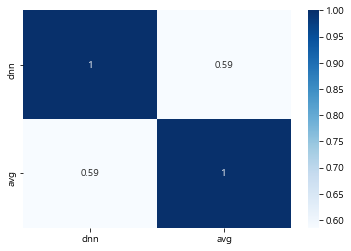

In [25]:
sns.heatmap(pd.DataFrame(dict(zip(['dnn','avg'],[dnn.predict(x_dev_num).flatten(),avg_test_result]))).corr(), annot=True, cmap='Blues')
plt.show()

In [28]:
mean_squared_error((dnn.predict(x_dev_num).flatten()+avg_test_result)/2,y_dev,squared=False)

8.864874125405853

In [29]:
weights_da = []
rmse_best = 1000
for i in tqdm(range(0,101)):
    for j in range(0,101):
        if i+j!=100:
            continue
        pred = (avg_test_result*i + dnn.predict(x_dev_num).flatten()*j)/100
        rmse = np.sqrt(mean_squared_error(y_dev, pred))
        if rmse < rmse_best:
            weights_da = [i,j]
            rmse_best = rmse 
            print(rmse, i,j)     
print(rmse_best, weights_da)

  2%|█▌                                                                                | 2/101 [00:00<00:19,  5.20it/s]

9.812487561326465 0 100
9.788822184073595 1 99


  4%|███▏                                                                              | 4/101 [00:00<00:18,  5.15it/s]

9.765329072216398 2 98
9.742009538130286 3 97


  6%|████▊                                                                             | 6/101 [00:01<00:18,  5.27it/s]

9.71886481485978 4 96
9.695896141390524 5 95


  8%|██████▍                                                                           | 8/101 [00:01<00:18,  4.97it/s]

9.673104796369673 6 94
9.65049201527507 7 93


 10%|████████                                                                         | 10/101 [00:01<00:18,  5.02it/s]

9.628059089359294 8 92
9.605807242681221 9 91


 12%|█████████▌                                                                       | 12/101 [00:02<00:17,  5.09it/s]

9.58373773522065 10 90
9.561851852074165 11 89


 14%|███████████▏                                                                     | 14/101 [00:02<00:17,  4.95it/s]

9.540150851932495 12 88
9.51863597603953 13 87


 16%|████████████▊                                                                    | 16/101 [00:03<00:17,  4.92it/s]

9.497308530638206 14 86
9.476169749445203 15 85


 18%|██████████████▍                                                                  | 18/101 [00:03<00:16,  4.88it/s]

9.455220913945194 16 84
9.43446327875864 17 83


 19%|███████████████▏                                                                 | 19/101 [00:03<00:17,  4.76it/s]

9.413898129303526 18 82


 20%|████████████████                                                                 | 20/101 [00:04<00:17,  4.53it/s]

9.393526677506301 19 81


 21%|████████████████▊                                                                | 21/101 [00:04<00:17,  4.54it/s]

9.373350248165137 20 80


 22%|█████████████████▋                                                               | 22/101 [00:04<00:17,  4.45it/s]

9.353370074636121 21 79


 23%|██████████████████▍                                                              | 23/101 [00:04<00:18,  4.32it/s]

9.33358741837441 22 78


 25%|████████████████████                                                             | 25/101 [00:05<00:16,  4.51it/s]

9.314003545147152 23 77
9.294619692241849 24 76


 26%|████████████████████▊                                                            | 26/101 [00:05<00:16,  4.50it/s]

9.27543714766702 25 75


 28%|██████████████████████▍                                                          | 28/101 [00:05<00:17,  4.07it/s]

9.256457124429708 26 74
9.237680921289488 27 73


 29%|███████████████████████▎                                                         | 29/101 [00:06<00:17,  4.18it/s]

9.219109703553094 28 72


 30%|████████████████████████                                                         | 30/101 [00:06<00:17,  4.03it/s]

9.200744780479953 29 71


 32%|█████████████████████████▋                                                       | 32/101 [00:06<00:16,  4.31it/s]

9.182587381196164 30 70
9.164638731175208 31 69


 33%|██████████████████████████▍                                                      | 33/101 [00:07<00:15,  4.50it/s]

9.1469000269536 32 68


 34%|███████████████████████████▎                                                     | 34/101 [00:07<00:15,  4.22it/s]

9.129372543083175 33 67


 35%|████████████████████████████                                                     | 35/101 [00:07<00:15,  4.25it/s]

9.112057470030678 34 66


 37%|█████████████████████████████▋                                                   | 37/101 [00:08<00:13,  4.73it/s]

9.09495603658336 35 65
9.078069438220052 36 64


 39%|███████████████████████████████▎                                                 | 39/101 [00:08<00:12,  5.00it/s]

9.06139887961703 37 63
9.044945549642874 38 62


 41%|████████████████████████████████▉                                                | 41/101 [00:08<00:12,  4.76it/s]

9.028710654078276 39 61
9.012695344281113 40 60


 43%|██████████████████████████████████▍                                              | 43/101 [00:09<00:11,  4.93it/s]

8.996900800114325 41 59
8.98132821026257 42 58


 45%|████████████████████████████████████                                             | 45/101 [00:09<00:11,  5.01it/s]

8.965978720135208 43 57
8.950853464278179 44 56


 47%|█████████████████████████████████████▋                                           | 47/101 [00:10<00:11,  4.83it/s]

8.935953571612282 45 55
8.921280226372318 46 54


 49%|███████████████████████████████████████▎                                         | 49/101 [00:10<00:10,  4.81it/s]

8.906834491857728 47 53
8.892617497260416 48 52


 50%|████████████████████████████████████████▉                                        | 51/101 [00:10<00:10,  4.84it/s]

8.878630345478953 49 51
8.864874111811648 50 50


 52%|██████████████████████████████████████████▌                                      | 53/101 [00:11<00:10,  4.80it/s]

8.851349902640171 51 49
8.838058753097746 52 48


 53%|███████████████████████████████████████████▎                                     | 54/101 [00:11<00:09,  4.78it/s]

8.825001719356267 53 47


 54%|████████████████████████████████████████████                                     | 55/101 [00:11<00:09,  4.77it/s]

8.812179855303826 54 46


 56%|█████████████████████████████████████████████▋                                   | 57/101 [00:12<00:09,  4.85it/s]

8.799594173359923 55 45
8.787245699581813 56 44


 58%|███████████████████████████████████████████████▎                                 | 59/101 [00:12<00:08,  4.79it/s]

8.775135429200336 57 43
8.76326435354868 58 42


 60%|████████████████████████████████████████████████▉                                | 61/101 [00:13<00:08,  4.78it/s]

8.75163345198456 59 41
8.740243664872082 60 40


 61%|█████████████████████████████████████████████████▋                               | 62/101 [00:13<00:10,  3.89it/s]

8.729095954482908 61 39


 63%|███████████████████████████████████████████████████▎                             | 64/101 [00:13<00:08,  4.30it/s]

8.718191239580475 62 38
8.707530440065346 63 37


 64%|████████████████████████████████████████████████████▏                            | 65/101 [00:14<00:08,  4.32it/s]

8.69711444782624 64 36


 65%|████████████████████████████████████████████████████▉                            | 66/101 [00:14<00:07,  4.50it/s]

8.686944147529431 65 35


 67%|██████████████████████████████████████████████████████▌                          | 68/101 [00:14<00:07,  4.58it/s]

8.677020394110594 66 34
8.66734404412609 67 33


 68%|███████████████████████████████████████████████████████▎                         | 69/101 [00:14<00:07,  4.57it/s]

8.65791592747101 68 32


 70%|████████████████████████████████████████████████████████▉                        | 71/101 [00:15<00:06,  4.75it/s]

8.648736848805237 69 31
8.639807608433662 70 30


 72%|██████████████████████████████████████████████████████████▌                      | 73/101 [00:15<00:05,  4.76it/s]

8.631128969058237 71 29
8.622701705391155 72 28


 74%|████████████████████████████████████████████████████████████▏                    | 75/101 [00:16<00:05,  4.71it/s]

8.614526540569482 73 27
8.606604197165137 74 26


 76%|█████████████████████████████████████████████████████████████▊                   | 77/101 [00:16<00:05,  4.61it/s]

8.598935375770775 75 25
8.591520766537492 76 24


 77%|██████████████████████████████████████████████████████████████▌                  | 78/101 [00:16<00:04,  4.62it/s]

8.584361011384122 77 23


 78%|███████████████████████████████████████████████████████████████▎                 | 79/101 [00:17<00:04,  4.67it/s]

8.5774567503742 78 22


 80%|████████████████████████████████████████████████████████████████▉                | 81/101 [00:17<00:04,  4.75it/s]

8.57080860431637 79 21
8.564417171196437 80 20


 82%|██████████████████████████████████████████████████████████████████▌              | 83/101 [00:17<00:03,  4.76it/s]

8.558283023780307 81 19
8.552406718216911 82 18


 84%|████████████████████████████████████████████████████████████████████▏            | 85/101 [00:18<00:03,  4.81it/s]

8.546788784543704 83 17
8.541429734848444 84 16


 85%|████████████████████████████████████████████████████████████████████▉            | 86/101 [00:18<00:03,  4.79it/s]

8.53633005527475 85 15


 87%|██████████████████████████████████████████████████████████████████████▌          | 88/101 [00:18<00:02,  4.68it/s]

8.531490207365486 86 14
8.526910634077959 87 13


 89%|████████████████████████████████████████████████████████████████████████▏        | 90/101 [00:19<00:02,  4.76it/s]

8.522591762287568 88 12
8.518533982202085 89 11


 91%|█████████████████████████████████████████████████████████████████████████▊       | 92/101 [00:19<00:01,  4.73it/s]

8.514737667548857 90 10
8.5112031694207 91 9


 92%|██████████████████████████████████████████████████████████████████████████▌      | 93/101 [00:20<00:01,  4.66it/s]

8.507930815495005 92 8


 93%|███████████████████████████████████████████████████████████████████████████▍     | 94/101 [00:20<00:01,  4.69it/s]

8.504920906856784 93 7


 95%|████████████████████████████████████████████████████████████████████████████▉    | 96/101 [00:20<00:01,  4.81it/s]

8.502173720605658 94 6
8.499689513489603 95 5


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 98/101 [00:21<00:00,  4.90it/s]

8.497468516102142 96 4
8.495510934536 97 3


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 99/101 [00:21<00:00,  4.76it/s]

8.493816950704984 98 2
8.492386722643007 99 1

 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [00:21<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:21<00:00,  4.66it/s]

8.49122038353014 100 0
8.49122038353014 [100, 0]


### Stacking

In [32]:
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
stack_estimators = [reg for name,reg,score in regs_trained if name in selected]

In [33]:
S_train, S_test = stacking(stack_estimators,
                           x_train_num, y_train, x_test_num,
                           regression=True, n_folds=5, stratified=True, shuffle=True,
                           random_state=0, verbose=0)

Learning rate set to 0.064809
0:	learn: 10.3109568	total: 59ms	remaining: 58.9s
1:	learn: 10.2084203	total: 111ms	remaining: 55.1s
2:	learn: 10.1161765	total: 166ms	remaining: 55.1s
3:	learn: 10.0244857	total: 220ms	remaining: 54.8s
4:	learn: 9.9466748	total: 280ms	remaining: 55.7s
5:	learn: 9.8674181	total: 333ms	remaining: 55.2s
6:	learn: 9.8026351	total: 389ms	remaining: 55.1s
7:	learn: 9.7371144	total: 443ms	remaining: 54.9s
8:	learn: 9.6706917	total: 504ms	remaining: 55.5s
9:	learn: 9.6141287	total: 567ms	remaining: 56.1s
10:	learn: 9.5635310	total: 628ms	remaining: 56.5s
11:	learn: 9.5189202	total: 700ms	remaining: 57.7s
12:	learn: 9.4734784	total: 763ms	remaining: 57.9s
13:	learn: 9.4324599	total: 824ms	remaining: 58s
14:	learn: 9.3928188	total: 881ms	remaining: 57.9s
15:	learn: 9.3527199	total: 936ms	remaining: 57.6s
16:	learn: 9.3179795	total: 994ms	remaining: 57.5s
17:	learn: 9.2846906	total: 1.05s	remaining: 57.4s
18:	learn: 9.2535620	total: 1.11s	remaining: 57.5s
19:	learn:

163:	learn: 8.1575402	total: 10.7s	remaining: 54.8s
164:	learn: 8.1530092	total: 10.8s	remaining: 54.7s
165:	learn: 8.1482903	total: 10.9s	remaining: 54.6s
166:	learn: 8.1432993	total: 10.9s	remaining: 54.5s
167:	learn: 8.1386044	total: 11s	remaining: 54.5s
168:	learn: 8.1351042	total: 11.1s	remaining: 54.5s
169:	learn: 8.1312018	total: 11.2s	remaining: 54.5s
170:	learn: 8.1270167	total: 11.2s	remaining: 54.4s
171:	learn: 8.1221981	total: 11.3s	remaining: 54.4s
172:	learn: 8.1184791	total: 11.4s	remaining: 54.3s
173:	learn: 8.1134830	total: 11.4s	remaining: 54.2s
174:	learn: 8.1106547	total: 11.5s	remaining: 54.1s
175:	learn: 8.1066516	total: 11.5s	remaining: 54s
176:	learn: 8.1010061	total: 11.6s	remaining: 53.9s
177:	learn: 8.0968931	total: 11.7s	remaining: 53.9s
178:	learn: 8.0925814	total: 11.7s	remaining: 53.8s
179:	learn: 8.0879990	total: 11.8s	remaining: 53.7s
180:	learn: 8.0845552	total: 11.8s	remaining: 53.6s
181:	learn: 8.0808892	total: 11.9s	remaining: 53.5s
182:	learn: 8.07

323:	learn: 7.5239641	total: 20.9s	remaining: 43.7s
324:	learn: 7.5208263	total: 21s	remaining: 43.6s
325:	learn: 7.5170524	total: 21.1s	remaining: 43.5s
326:	learn: 7.5134622	total: 21.1s	remaining: 43.5s
327:	learn: 7.5084795	total: 21.2s	remaining: 43.4s
328:	learn: 7.5052687	total: 21.3s	remaining: 43.4s
329:	learn: 7.5021642	total: 21.3s	remaining: 43.3s
330:	learn: 7.4984246	total: 21.4s	remaining: 43.2s
331:	learn: 7.4959160	total: 21.4s	remaining: 43.1s
332:	learn: 7.4913163	total: 21.5s	remaining: 43.1s
333:	learn: 7.4873041	total: 21.6s	remaining: 43s
334:	learn: 7.4834500	total: 21.6s	remaining: 42.9s
335:	learn: 7.4800509	total: 21.7s	remaining: 42.9s
336:	learn: 7.4762552	total: 21.8s	remaining: 42.8s
337:	learn: 7.4727409	total: 21.8s	remaining: 42.7s
338:	learn: 7.4706093	total: 21.9s	remaining: 42.7s
339:	learn: 7.4675521	total: 21.9s	remaining: 42.6s
340:	learn: 7.4638552	total: 22s	remaining: 42.5s
341:	learn: 7.4606103	total: 22.1s	remaining: 42.4s
342:	learn: 7.4565

482:	learn: 7.0102029	total: 31.2s	remaining: 33.4s
483:	learn: 7.0070456	total: 31.2s	remaining: 33.3s
484:	learn: 7.0040356	total: 31.3s	remaining: 33.2s
485:	learn: 7.0001453	total: 31.4s	remaining: 33.2s
486:	learn: 6.9969669	total: 31.4s	remaining: 33.1s
487:	learn: 6.9936430	total: 31.5s	remaining: 33s
488:	learn: 6.9900446	total: 31.6s	remaining: 33s
489:	learn: 6.9867396	total: 31.6s	remaining: 32.9s
490:	learn: 6.9838269	total: 31.7s	remaining: 32.8s
491:	learn: 6.9804338	total: 31.7s	remaining: 32.8s
492:	learn: 6.9784701	total: 31.8s	remaining: 32.7s
493:	learn: 6.9752708	total: 31.9s	remaining: 32.7s
494:	learn: 6.9721875	total: 31.9s	remaining: 32.6s
495:	learn: 6.9696910	total: 32s	remaining: 32.5s
496:	learn: 6.9662209	total: 32.1s	remaining: 32.4s
497:	learn: 6.9641026	total: 32.1s	remaining: 32.4s
498:	learn: 6.9616315	total: 32.2s	remaining: 32.3s
499:	learn: 6.9595149	total: 32.3s	remaining: 32.3s
500:	learn: 6.9557919	total: 32.3s	remaining: 32.2s
501:	learn: 6.9532

642:	learn: 6.5660029	total: 41.6s	remaining: 23.1s
643:	learn: 6.5638385	total: 41.6s	remaining: 23s
644:	learn: 6.5614555	total: 41.7s	remaining: 23s
645:	learn: 6.5588702	total: 41.8s	remaining: 22.9s
646:	learn: 6.5558520	total: 41.8s	remaining: 22.8s
647:	learn: 6.5537092	total: 41.9s	remaining: 22.8s
648:	learn: 6.5511264	total: 42s	remaining: 22.7s
649:	learn: 6.5485405	total: 42s	remaining: 22.6s
650:	learn: 6.5457739	total: 42.1s	remaining: 22.6s
651:	learn: 6.5433306	total: 42.2s	remaining: 22.5s
652:	learn: 6.5409855	total: 42.3s	remaining: 22.5s
653:	learn: 6.5384346	total: 42.3s	remaining: 22.4s
654:	learn: 6.5357739	total: 42.4s	remaining: 22.3s
655:	learn: 6.5319646	total: 42.5s	remaining: 22.3s
656:	learn: 6.5297518	total: 42.5s	remaining: 22.2s
657:	learn: 6.5269063	total: 42.6s	remaining: 22.1s
658:	learn: 6.5238872	total: 42.7s	remaining: 22.1s
659:	learn: 6.5208007	total: 42.7s	remaining: 22s
660:	learn: 6.5187364	total: 42.8s	remaining: 21.9s
661:	learn: 6.5163696	

803:	learn: 6.1725462	total: 52.3s	remaining: 12.8s
804:	learn: 6.1699058	total: 52.4s	remaining: 12.7s
805:	learn: 6.1679975	total: 52.5s	remaining: 12.6s
806:	learn: 6.1640168	total: 52.5s	remaining: 12.6s
807:	learn: 6.1612783	total: 52.6s	remaining: 12.5s
808:	learn: 6.1591205	total: 52.7s	remaining: 12.4s
809:	learn: 6.1567826	total: 52.7s	remaining: 12.4s
810:	learn: 6.1548302	total: 52.8s	remaining: 12.3s
811:	learn: 6.1522465	total: 52.9s	remaining: 12.2s
812:	learn: 6.1497224	total: 53s	remaining: 12.2s
813:	learn: 6.1478499	total: 53s	remaining: 12.1s
814:	learn: 6.1450529	total: 53.1s	remaining: 12.1s
815:	learn: 6.1430598	total: 53.2s	remaining: 12s
816:	learn: 6.1411876	total: 53.2s	remaining: 11.9s
817:	learn: 6.1385319	total: 53.3s	remaining: 11.9s
818:	learn: 6.1366120	total: 53.4s	remaining: 11.8s
819:	learn: 6.1344470	total: 53.4s	remaining: 11.7s
820:	learn: 6.1318492	total: 53.5s	remaining: 11.7s
821:	learn: 6.1290324	total: 53.5s	remaining: 11.6s
822:	learn: 6.1269

966:	learn: 5.7946338	total: 1m 3s	remaining: 2.17s
967:	learn: 5.7924680	total: 1m 3s	remaining: 2.11s
968:	learn: 5.7901535	total: 1m 3s	remaining: 2.04s
969:	learn: 5.7875344	total: 1m 3s	remaining: 1.98s
970:	learn: 5.7855415	total: 1m 3s	remaining: 1.91s
971:	learn: 5.7830433	total: 1m 4s	remaining: 1.84s
972:	learn: 5.7810547	total: 1m 4s	remaining: 1.78s
973:	learn: 5.7789121	total: 1m 4s	remaining: 1.71s
974:	learn: 5.7757331	total: 1m 4s	remaining: 1.65s
975:	learn: 5.7736683	total: 1m 4s	remaining: 1.58s
976:	learn: 5.7718305	total: 1m 4s	remaining: 1.51s
977:	learn: 5.7698507	total: 1m 4s	remaining: 1.45s
978:	learn: 5.7669435	total: 1m 4s	remaining: 1.38s
979:	learn: 5.7638514	total: 1m 4s	remaining: 1.32s
980:	learn: 5.7621191	total: 1m 4s	remaining: 1.25s
981:	learn: 5.7599688	total: 1m 4s	remaining: 1.19s
982:	learn: 5.7580579	total: 1m 4s	remaining: 1.12s
983:	learn: 5.7559915	total: 1m 4s	remaining: 1.05s
984:	learn: 5.7539696	total: 1m 4s	remaining: 989ms
985:	learn: 

128:	learn: 8.3105268	total: 9.53s	remaining: 1m 4s
129:	learn: 8.3068330	total: 9.6s	remaining: 1m 4s
130:	learn: 8.3044332	total: 9.68s	remaining: 1m 4s
131:	learn: 8.3011035	total: 9.75s	remaining: 1m 4s
132:	learn: 8.2973866	total: 9.83s	remaining: 1m 4s
133:	learn: 8.2929632	total: 9.9s	remaining: 1m 4s
134:	learn: 8.2905130	total: 9.97s	remaining: 1m 3s
135:	learn: 8.2867898	total: 10s	remaining: 1m 3s
136:	learn: 8.2831333	total: 10.1s	remaining: 1m 3s
137:	learn: 8.2794254	total: 10.2s	remaining: 1m 3s
138:	learn: 8.2759698	total: 10.3s	remaining: 1m 3s
139:	learn: 8.2732336	total: 10.3s	remaining: 1m 3s
140:	learn: 8.2692729	total: 10.4s	remaining: 1m 3s
141:	learn: 8.2658497	total: 10.5s	remaining: 1m 3s
142:	learn: 8.2627821	total: 10.6s	remaining: 1m 3s
143:	learn: 8.2590415	total: 10.6s	remaining: 1m 3s
144:	learn: 8.2551672	total: 10.7s	remaining: 1m 3s
145:	learn: 8.2511693	total: 10.8s	remaining: 1m 3s
146:	learn: 8.2475915	total: 10.9s	remaining: 1m 3s
147:	learn: 8.24

290:	learn: 7.6625172	total: 21.5s	remaining: 52.3s
291:	learn: 7.6588817	total: 21.5s	remaining: 52.2s
292:	learn: 7.6558133	total: 21.6s	remaining: 52.1s
293:	learn: 7.6523339	total: 21.7s	remaining: 52.1s
294:	learn: 7.6483593	total: 21.7s	remaining: 52s
295:	learn: 7.6444963	total: 21.8s	remaining: 51.9s
296:	learn: 7.6413694	total: 21.9s	remaining: 51.8s
297:	learn: 7.6372526	total: 22s	remaining: 51.7s
298:	learn: 7.6342805	total: 22s	remaining: 51.6s
299:	learn: 7.6307849	total: 22.1s	remaining: 51.5s
300:	learn: 7.6285187	total: 22.2s	remaining: 51.5s
301:	learn: 7.6252872	total: 22.2s	remaining: 51.4s
302:	learn: 7.6219902	total: 22.3s	remaining: 51.3s
303:	learn: 7.6174220	total: 22.4s	remaining: 51.2s
304:	learn: 7.6142363	total: 22.4s	remaining: 51.1s
305:	learn: 7.6115361	total: 22.5s	remaining: 51s
306:	learn: 7.6090999	total: 22.6s	remaining: 50.9s
307:	learn: 7.6056314	total: 22.6s	remaining: 50.8s
308:	learn: 7.6014104	total: 22.7s	remaining: 50.8s
309:	learn: 7.597550

449:	learn: 7.1395706	total: 32.5s	remaining: 39.8s
450:	learn: 7.1362620	total: 32.6s	remaining: 39.7s
451:	learn: 7.1333396	total: 32.7s	remaining: 39.6s
452:	learn: 7.1291476	total: 32.7s	remaining: 39.5s
453:	learn: 7.1267401	total: 32.8s	remaining: 39.4s
454:	learn: 7.1236974	total: 32.9s	remaining: 39.4s
455:	learn: 7.1200170	total: 32.9s	remaining: 39.3s
456:	learn: 7.1171507	total: 33s	remaining: 39.2s
457:	learn: 7.1143857	total: 33s	remaining: 39.1s
458:	learn: 7.1118228	total: 33.1s	remaining: 39s
459:	learn: 7.1081974	total: 33.2s	remaining: 39s
460:	learn: 7.1057523	total: 33.3s	remaining: 38.9s
461:	learn: 7.1026528	total: 33.3s	remaining: 38.8s
462:	learn: 7.1006858	total: 33.4s	remaining: 38.7s
463:	learn: 7.0975157	total: 33.4s	remaining: 38.6s
464:	learn: 7.0947379	total: 33.5s	remaining: 38.6s
465:	learn: 7.0920960	total: 33.6s	remaining: 38.5s
466:	learn: 7.0881003	total: 33.6s	remaining: 38.4s
467:	learn: 7.0849570	total: 33.7s	remaining: 38.3s
468:	learn: 7.081218

611:	learn: 6.6685741	total: 43.4s	remaining: 27.5s
612:	learn: 6.6657028	total: 43.4s	remaining: 27.4s
613:	learn: 6.6618290	total: 43.5s	remaining: 27.3s
614:	learn: 6.6590993	total: 43.6s	remaining: 27.3s
615:	learn: 6.6563761	total: 43.6s	remaining: 27.2s
616:	learn: 6.6542630	total: 43.7s	remaining: 27.1s
617:	learn: 6.6510532	total: 43.7s	remaining: 27s
618:	learn: 6.6483019	total: 43.8s	remaining: 27s
619:	learn: 6.6458038	total: 43.9s	remaining: 26.9s
620:	learn: 6.6435774	total: 43.9s	remaining: 26.8s
621:	learn: 6.6406325	total: 44s	remaining: 26.7s
622:	learn: 6.6385594	total: 44.1s	remaining: 26.7s
623:	learn: 6.6357305	total: 44.1s	remaining: 26.6s
624:	learn: 6.6333755	total: 44.2s	remaining: 26.5s
625:	learn: 6.6312907	total: 44.2s	remaining: 26.4s
626:	learn: 6.6287869	total: 44.3s	remaining: 26.4s
627:	learn: 6.6260143	total: 44.4s	remaining: 26.3s
628:	learn: 6.6232894	total: 44.4s	remaining: 26.2s
629:	learn: 6.6203384	total: 44.5s	remaining: 26.1s
630:	learn: 6.6177

772:	learn: 6.2633199	total: 53.7s	remaining: 15.8s
773:	learn: 6.2608674	total: 53.8s	remaining: 15.7s
774:	learn: 6.2581885	total: 53.8s	remaining: 15.6s
775:	learn: 6.2550368	total: 53.9s	remaining: 15.6s
776:	learn: 6.2528429	total: 54s	remaining: 15.5s
777:	learn: 6.2505357	total: 54s	remaining: 15.4s
778:	learn: 6.2481537	total: 54.1s	remaining: 15.3s
779:	learn: 6.2447848	total: 54.2s	remaining: 15.3s
780:	learn: 6.2417145	total: 54.2s	remaining: 15.2s
781:	learn: 6.2397841	total: 54.3s	remaining: 15.1s
782:	learn: 6.2377401	total: 54.3s	remaining: 15.1s
783:	learn: 6.2351315	total: 54.4s	remaining: 15s
784:	learn: 6.2324595	total: 54.5s	remaining: 14.9s
785:	learn: 6.2307570	total: 54.5s	remaining: 14.8s
786:	learn: 6.2280023	total: 54.6s	remaining: 14.8s
787:	learn: 6.2258780	total: 54.7s	remaining: 14.7s
788:	learn: 6.2237555	total: 54.7s	remaining: 14.6s
789:	learn: 6.2211241	total: 54.8s	remaining: 14.6s
790:	learn: 6.2189908	total: 54.8s	remaining: 14.5s
791:	learn: 6.2165

932:	learn: 5.8914603	total: 1m 3s	remaining: 4.58s
933:	learn: 5.8889859	total: 1m 3s	remaining: 4.51s
934:	learn: 5.8867181	total: 1m 3s	remaining: 4.44s
935:	learn: 5.8847784	total: 1m 3s	remaining: 4.37s
936:	learn: 5.8818195	total: 1m 3s	remaining: 4.3s
937:	learn: 5.8795251	total: 1m 4s	remaining: 4.23s
938:	learn: 5.8777601	total: 1m 4s	remaining: 4.16s
939:	learn: 5.8753848	total: 1m 4s	remaining: 4.09s
940:	learn: 5.8731543	total: 1m 4s	remaining: 4.03s
941:	learn: 5.8715958	total: 1m 4s	remaining: 3.96s
942:	learn: 5.8697502	total: 1m 4s	remaining: 3.89s
943:	learn: 5.8675512	total: 1m 4s	remaining: 3.82s
944:	learn: 5.8658224	total: 1m 4s	remaining: 3.75s
945:	learn: 5.8637251	total: 1m 4s	remaining: 3.68s
946:	learn: 5.8614375	total: 1m 4s	remaining: 3.61s
947:	learn: 5.8588725	total: 1m 4s	remaining: 3.54s
948:	learn: 5.8567737	total: 1m 4s	remaining: 3.48s
949:	learn: 5.8542877	total: 1m 4s	remaining: 3.41s
950:	learn: 5.8522315	total: 1m 4s	remaining: 3.34s
951:	learn: 5

92:	learn: 8.4615726	total: 5.82s	remaining: 56.8s
93:	learn: 8.4567999	total: 5.89s	remaining: 56.8s
94:	learn: 8.4523360	total: 5.96s	remaining: 56.8s
95:	learn: 8.4488577	total: 6.04s	remaining: 56.9s
96:	learn: 8.4447320	total: 6.11s	remaining: 56.9s
97:	learn: 8.4405391	total: 6.19s	remaining: 56.9s
98:	learn: 8.4366134	total: 6.28s	remaining: 57.1s
99:	learn: 8.4314458	total: 6.35s	remaining: 57.2s
100:	learn: 8.4267508	total: 6.43s	remaining: 57.3s
101:	learn: 8.4227648	total: 6.52s	remaining: 57.4s
102:	learn: 8.4185235	total: 6.59s	remaining: 57.4s
103:	learn: 8.4144079	total: 6.66s	remaining: 57.4s
104:	learn: 8.4105950	total: 6.73s	remaining: 57.4s
105:	learn: 8.4062604	total: 6.82s	remaining: 57.5s
106:	learn: 8.4017545	total: 6.89s	remaining: 57.5s
107:	learn: 8.3964551	total: 6.96s	remaining: 57.5s
108:	learn: 8.3928112	total: 7.04s	remaining: 57.5s
109:	learn: 8.3888864	total: 7.11s	remaining: 57.5s
110:	learn: 8.3848632	total: 7.19s	remaining: 57.6s
111:	learn: 8.380999

253:	learn: 7.8110638	total: 18s	remaining: 52.7s
254:	learn: 7.8080260	total: 18s	remaining: 52.7s
255:	learn: 7.8049512	total: 18.1s	remaining: 52.6s
256:	learn: 7.8022715	total: 18.2s	remaining: 52.5s
257:	learn: 7.7979297	total: 18.2s	remaining: 52.4s
258:	learn: 7.7949444	total: 18.3s	remaining: 52.3s
259:	learn: 7.7900454	total: 18.4s	remaining: 52.3s
260:	learn: 7.7864098	total: 18.4s	remaining: 52.2s
261:	learn: 7.7829183	total: 18.5s	remaining: 52.1s
262:	learn: 7.7795051	total: 18.6s	remaining: 52.1s
263:	learn: 7.7764734	total: 18.6s	remaining: 52s
264:	learn: 7.7705064	total: 18.7s	remaining: 51.9s
265:	learn: 7.7665043	total: 18.8s	remaining: 51.9s
266:	learn: 7.7629810	total: 18.9s	remaining: 51.8s
267:	learn: 7.7599959	total: 18.9s	remaining: 51.7s
268:	learn: 7.7557496	total: 19s	remaining: 51.7s
269:	learn: 7.7522879	total: 19.1s	remaining: 51.6s
270:	learn: 7.7486839	total: 19.1s	remaining: 51.5s
271:	learn: 7.7448430	total: 19.2s	remaining: 51.4s
272:	learn: 7.741643

414:	learn: 7.2550447	total: 28.9s	remaining: 40.8s
415:	learn: 7.2521498	total: 29s	remaining: 40.7s
416:	learn: 7.2486804	total: 29.1s	remaining: 40.7s
417:	learn: 7.2464194	total: 29.1s	remaining: 40.6s
418:	learn: 7.2429534	total: 29.2s	remaining: 40.5s
419:	learn: 7.2396253	total: 29.3s	remaining: 40.4s
420:	learn: 7.2363511	total: 29.3s	remaining: 40.3s
421:	learn: 7.2326465	total: 29.4s	remaining: 40.3s
422:	learn: 7.2301624	total: 29.5s	remaining: 40.2s
423:	learn: 7.2278867	total: 29.5s	remaining: 40.1s
424:	learn: 7.2251653	total: 29.6s	remaining: 40s
425:	learn: 7.2226617	total: 29.7s	remaining: 40s
426:	learn: 7.2187912	total: 29.7s	remaining: 39.9s
427:	learn: 7.2164067	total: 29.8s	remaining: 39.8s
428:	learn: 7.2128091	total: 29.8s	remaining: 39.7s
429:	learn: 7.2098050	total: 29.9s	remaining: 39.6s
430:	learn: 7.2056958	total: 30s	remaining: 39.6s
431:	learn: 7.2024413	total: 30s	remaining: 39.5s
432:	learn: 7.1989229	total: 30.1s	remaining: 39.4s
433:	learn: 7.1960337	

573:	learn: 6.7889493	total: 39.3s	remaining: 29.2s
574:	learn: 6.7857496	total: 39.4s	remaining: 29.1s
575:	learn: 6.7825217	total: 39.4s	remaining: 29s
576:	learn: 6.7794158	total: 39.5s	remaining: 29s
577:	learn: 6.7770381	total: 39.6s	remaining: 28.9s
578:	learn: 6.7740047	total: 39.6s	remaining: 28.8s
579:	learn: 6.7712695	total: 39.7s	remaining: 28.8s
580:	learn: 6.7682356	total: 39.8s	remaining: 28.7s
581:	learn: 6.7654952	total: 39.8s	remaining: 28.6s
582:	learn: 6.7629866	total: 39.9s	remaining: 28.6s
583:	learn: 6.7596707	total: 40s	remaining: 28.5s
584:	learn: 6.7571880	total: 40.1s	remaining: 28.4s
585:	learn: 6.7541161	total: 40.2s	remaining: 28.4s
586:	learn: 6.7523783	total: 40.2s	remaining: 28.3s
587:	learn: 6.7495297	total: 40.3s	remaining: 28.2s
588:	learn: 6.7456737	total: 40.4s	remaining: 28.2s
589:	learn: 6.7428204	total: 40.4s	remaining: 28.1s
590:	learn: 6.7398689	total: 40.5s	remaining: 28s
591:	learn: 6.7374961	total: 40.6s	remaining: 28s
592:	learn: 6.7349693	

734:	learn: 6.3619026	total: 50.4s	remaining: 18.2s
735:	learn: 6.3593440	total: 50.5s	remaining: 18.1s
736:	learn: 6.3570914	total: 50.5s	remaining: 18s
737:	learn: 6.3540945	total: 50.6s	remaining: 18s
738:	learn: 6.3518550	total: 50.7s	remaining: 17.9s
739:	learn: 6.3496767	total: 50.7s	remaining: 17.8s
740:	learn: 6.3463726	total: 50.8s	remaining: 17.8s
741:	learn: 6.3441146	total: 50.9s	remaining: 17.7s
742:	learn: 6.3414130	total: 51s	remaining: 17.6s
743:	learn: 6.3394016	total: 51s	remaining: 17.6s
744:	learn: 6.3365205	total: 51.1s	remaining: 17.5s
745:	learn: 6.3347615	total: 51.2s	remaining: 17.4s
746:	learn: 6.3322379	total: 51.2s	remaining: 17.4s
747:	learn: 6.3297310	total: 51.3s	remaining: 17.3s
748:	learn: 6.3272484	total: 51.4s	remaining: 17.2s
749:	learn: 6.3239049	total: 51.5s	remaining: 17.2s
750:	learn: 6.3208793	total: 51.5s	remaining: 17.1s
751:	learn: 6.3189254	total: 51.6s	remaining: 17s
752:	learn: 6.3169260	total: 51.7s	remaining: 17s
753:	learn: 6.3150833	to

896:	learn: 5.9798803	total: 1m 1s	remaining: 7.1s
897:	learn: 5.9774659	total: 1m 1s	remaining: 7.03s
898:	learn: 5.9749460	total: 1m 1s	remaining: 6.96s
899:	learn: 5.9726636	total: 1m 2s	remaining: 6.89s
900:	learn: 5.9699327	total: 1m 2s	remaining: 6.82s
901:	learn: 5.9668166	total: 1m 2s	remaining: 6.75s
902:	learn: 5.9646647	total: 1m 2s	remaining: 6.69s
903:	learn: 5.9623710	total: 1m 2s	remaining: 6.62s
904:	learn: 5.9598061	total: 1m 2s	remaining: 6.55s
905:	learn: 5.9577858	total: 1m 2s	remaining: 6.48s
906:	learn: 5.9552670	total: 1m 2s	remaining: 6.41s
907:	learn: 5.9532817	total: 1m 2s	remaining: 6.34s
908:	learn: 5.9507093	total: 1m 2s	remaining: 6.28s
909:	learn: 5.9487645	total: 1m 2s	remaining: 6.21s
910:	learn: 5.9461419	total: 1m 2s	remaining: 6.14s
911:	learn: 5.9442509	total: 1m 2s	remaining: 6.08s
912:	learn: 5.9419240	total: 1m 3s	remaining: 6.01s
913:	learn: 5.9401497	total: 1m 3s	remaining: 5.94s
914:	learn: 5.9377809	total: 1m 3s	remaining: 5.87s
915:	learn: 5

55:	learn: 8.6289277	total: 4.41s	remaining: 1m 14s
56:	learn: 8.6223585	total: 4.48s	remaining: 1m 14s
57:	learn: 8.6141443	total: 4.56s	remaining: 1m 14s
58:	learn: 8.6076240	total: 4.63s	remaining: 1m 13s
59:	learn: 8.5992865	total: 4.7s	remaining: 1m 13s
60:	learn: 8.5911337	total: 4.77s	remaining: 1m 13s
61:	learn: 8.5853372	total: 4.85s	remaining: 1m 13s
62:	learn: 8.5767306	total: 4.92s	remaining: 1m 13s
63:	learn: 8.5683570	total: 5s	remaining: 1m 13s
64:	learn: 8.5603239	total: 5.08s	remaining: 1m 13s
65:	learn: 8.5542862	total: 5.16s	remaining: 1m 12s
66:	learn: 8.5470976	total: 5.23s	remaining: 1m 12s
67:	learn: 8.5410180	total: 5.32s	remaining: 1m 12s
68:	learn: 8.5350187	total: 5.39s	remaining: 1m 12s
69:	learn: 8.5286647	total: 5.46s	remaining: 1m 12s
70:	learn: 8.5232382	total: 5.54s	remaining: 1m 12s
71:	learn: 8.5175865	total: 5.62s	remaining: 1m 12s
72:	learn: 8.5114277	total: 5.69s	remaining: 1m 12s
73:	learn: 8.5062237	total: 5.77s	remaining: 1m 12s
74:	learn: 8.500

215:	learn: 7.9089542	total: 16.5s	remaining: 59.9s
216:	learn: 7.9041451	total: 16.6s	remaining: 59.8s
217:	learn: 7.9008110	total: 16.6s	remaining: 59.7s
218:	learn: 7.8974575	total: 16.7s	remaining: 59.6s
219:	learn: 7.8928373	total: 16.8s	remaining: 59.5s
220:	learn: 7.8890293	total: 16.8s	remaining: 59.4s
221:	learn: 7.8853081	total: 16.9s	remaining: 59.3s
222:	learn: 7.8812191	total: 17s	remaining: 59.3s
223:	learn: 7.8768342	total: 17.1s	remaining: 59.3s
224:	learn: 7.8719740	total: 17.2s	remaining: 59.2s
225:	learn: 7.8682083	total: 17.2s	remaining: 59.1s
226:	learn: 7.8644530	total: 17.3s	remaining: 59s
227:	learn: 7.8614862	total: 17.4s	remaining: 58.9s
228:	learn: 7.8567710	total: 17.5s	remaining: 58.8s
229:	learn: 7.8526956	total: 17.5s	remaining: 58.7s
230:	learn: 7.8483180	total: 17.6s	remaining: 58.6s
231:	learn: 7.8442114	total: 17.7s	remaining: 58.5s
232:	learn: 7.8386759	total: 17.8s	remaining: 58.4s
233:	learn: 7.8343574	total: 17.8s	remaining: 58.3s
234:	learn: 7.82

374:	learn: 7.3284275	total: 27.8s	remaining: 46.4s
375:	learn: 7.3246522	total: 27.9s	remaining: 46.3s
376:	learn: 7.3205820	total: 28s	remaining: 46.3s
377:	learn: 7.3165569	total: 28.1s	remaining: 46.2s
378:	learn: 7.3133425	total: 28.1s	remaining: 46.1s
379:	learn: 7.3096356	total: 28.2s	remaining: 46s
380:	learn: 7.3063336	total: 28.3s	remaining: 45.9s
381:	learn: 7.3024830	total: 28.3s	remaining: 45.9s
382:	learn: 7.2985469	total: 28.4s	remaining: 45.8s
383:	learn: 7.2948230	total: 28.5s	remaining: 45.7s
384:	learn: 7.2913457	total: 28.5s	remaining: 45.6s
385:	learn: 7.2879920	total: 28.6s	remaining: 45.5s
386:	learn: 7.2850183	total: 28.7s	remaining: 45.4s
387:	learn: 7.2822118	total: 28.7s	remaining: 45.3s
388:	learn: 7.2784779	total: 28.8s	remaining: 45.2s
389:	learn: 7.2748523	total: 28.9s	remaining: 45.2s
390:	learn: 7.2734843	total: 28.9s	remaining: 45.1s
391:	learn: 7.2702967	total: 29s	remaining: 45s
392:	learn: 7.2672780	total: 29.1s	remaining: 44.9s
393:	learn: 7.264129

536:	learn: 6.8268370	total: 38.6s	remaining: 33.2s
537:	learn: 6.8244885	total: 38.6s	remaining: 33.2s
538:	learn: 6.8207962	total: 38.7s	remaining: 33.1s
539:	learn: 6.8182557	total: 38.8s	remaining: 33s
540:	learn: 6.8159814	total: 38.8s	remaining: 32.9s
541:	learn: 6.8141355	total: 38.9s	remaining: 32.8s
542:	learn: 6.8114112	total: 38.9s	remaining: 32.8s
543:	learn: 6.8081373	total: 39s	remaining: 32.7s
544:	learn: 6.8050565	total: 39.1s	remaining: 32.6s
545:	learn: 6.8022977	total: 39.1s	remaining: 32.5s
546:	learn: 6.7997171	total: 39.2s	remaining: 32.5s
547:	learn: 6.7969324	total: 39.3s	remaining: 32.4s
548:	learn: 6.7939046	total: 39.3s	remaining: 32.3s
549:	learn: 6.7907865	total: 39.4s	remaining: 32.2s
550:	learn: 6.7872572	total: 39.5s	remaining: 32.2s
551:	learn: 6.7835651	total: 39.5s	remaining: 32.1s
552:	learn: 6.7805087	total: 39.6s	remaining: 32s
553:	learn: 6.7785786	total: 39.6s	remaining: 31.9s
554:	learn: 6.7757459	total: 39.7s	remaining: 31.8s
555:	learn: 6.7727

695:	learn: 6.3880594	total: 48.7s	remaining: 21.3s
696:	learn: 6.3854625	total: 48.8s	remaining: 21.2s
697:	learn: 6.3824291	total: 48.9s	remaining: 21.1s
698:	learn: 6.3795930	total: 48.9s	remaining: 21.1s
699:	learn: 6.3768643	total: 49s	remaining: 21s
700:	learn: 6.3744946	total: 49.1s	remaining: 20.9s
701:	learn: 6.3718602	total: 49.1s	remaining: 20.9s
702:	learn: 6.3694500	total: 49.2s	remaining: 20.8s
703:	learn: 6.3669264	total: 49.2s	remaining: 20.7s
704:	learn: 6.3643610	total: 49.3s	remaining: 20.6s
705:	learn: 6.3611662	total: 49.4s	remaining: 20.6s
706:	learn: 6.3585276	total: 49.4s	remaining: 20.5s
707:	learn: 6.3563778	total: 49.5s	remaining: 20.4s
708:	learn: 6.3539785	total: 49.6s	remaining: 20.3s
709:	learn: 6.3512500	total: 49.6s	remaining: 20.3s
710:	learn: 6.3483089	total: 49.7s	remaining: 20.2s
711:	learn: 6.3455894	total: 49.8s	remaining: 20.1s
712:	learn: 6.3432844	total: 49.8s	remaining: 20s
713:	learn: 6.3405652	total: 49.9s	remaining: 20s
714:	learn: 6.338202

855:	learn: 5.9991980	total: 59.1s	remaining: 9.94s
856:	learn: 5.9964284	total: 59.1s	remaining: 9.87s
857:	learn: 5.9939520	total: 59.2s	remaining: 9.8s
858:	learn: 5.9915815	total: 59.3s	remaining: 9.73s
859:	learn: 5.9889718	total: 59.3s	remaining: 9.66s
860:	learn: 5.9868725	total: 59.4s	remaining: 9.59s
861:	learn: 5.9842863	total: 59.5s	remaining: 9.52s
862:	learn: 5.9825287	total: 59.5s	remaining: 9.45s
863:	learn: 5.9802477	total: 59.6s	remaining: 9.38s
864:	learn: 5.9785464	total: 59.7s	remaining: 9.31s
865:	learn: 5.9768396	total: 59.7s	remaining: 9.24s
866:	learn: 5.9749776	total: 59.8s	remaining: 9.17s
867:	learn: 5.9724306	total: 59.9s	remaining: 9.1s
868:	learn: 5.9704972	total: 59.9s	remaining: 9.03s
869:	learn: 5.9686092	total: 60s	remaining: 8.96s
870:	learn: 5.9666248	total: 1m	remaining: 8.89s
871:	learn: 5.9642629	total: 1m	remaining: 8.82s
872:	learn: 5.9617455	total: 1m	remaining: 8.75s
873:	learn: 5.9592651	total: 1m	remaining: 8.68s
874:	learn: 5.9564056	total:

15:	learn: 9.3423696	total: 963ms	remaining: 59.2s
16:	learn: 9.3084393	total: 1.03s	remaining: 59.8s
17:	learn: 9.2755651	total: 1.1s	remaining: 1m
18:	learn: 9.2485243	total: 1.17s	remaining: 1m
19:	learn: 9.2148763	total: 1.24s	remaining: 1m
20:	learn: 9.1859949	total: 1.31s	remaining: 1m 1s
21:	learn: 9.1623206	total: 1.38s	remaining: 1m 1s
22:	learn: 9.1349023	total: 1.45s	remaining: 1m 1s
23:	learn: 9.1098110	total: 1.52s	remaining: 1m 1s
24:	learn: 9.0845126	total: 1.6s	remaining: 1m 2s
25:	learn: 9.0678466	total: 1.66s	remaining: 1m 2s
26:	learn: 9.0497408	total: 1.74s	remaining: 1m 2s
27:	learn: 9.0317717	total: 1.81s	remaining: 1m 2s
28:	learn: 9.0134669	total: 1.88s	remaining: 1m 2s
29:	learn: 8.9954044	total: 1.96s	remaining: 1m 3s
30:	learn: 8.9776995	total: 2.03s	remaining: 1m 3s
31:	learn: 8.9613957	total: 2.1s	remaining: 1m 3s
32:	learn: 8.9455805	total: 2.17s	remaining: 1m 3s
33:	learn: 8.9250270	total: 2.24s	remaining: 1m 3s
34:	learn: 8.9093341	total: 2.32s	remaining

178:	learn: 8.1099278	total: 13.1s	remaining: 1m
179:	learn: 8.1054639	total: 13.2s	remaining: 60s
180:	learn: 8.1011472	total: 13.2s	remaining: 59.9s
181:	learn: 8.0964938	total: 13.3s	remaining: 59.8s
182:	learn: 8.0930735	total: 13.4s	remaining: 59.7s
183:	learn: 8.0889041	total: 13.4s	remaining: 59.6s
184:	learn: 8.0846755	total: 13.5s	remaining: 59.5s
185:	learn: 8.0795252	total: 13.6s	remaining: 59.4s
186:	learn: 8.0750589	total: 13.6s	remaining: 59.3s
187:	learn: 8.0705090	total: 13.7s	remaining: 59.2s
188:	learn: 8.0668378	total: 13.8s	remaining: 59.1s
189:	learn: 8.0628417	total: 13.8s	remaining: 59s
190:	learn: 8.0592282	total: 13.9s	remaining: 58.8s
191:	learn: 8.0537612	total: 14s	remaining: 58.8s
192:	learn: 8.0491434	total: 14s	remaining: 58.7s
193:	learn: 8.0450631	total: 14.1s	remaining: 58.6s
194:	learn: 8.0415514	total: 14.2s	remaining: 58.5s
195:	learn: 8.0362134	total: 14.2s	remaining: 58.4s
196:	learn: 8.0309901	total: 14.3s	remaining: 58.3s
197:	learn: 8.0270080	t

340:	learn: 7.4789460	total: 24s	remaining: 46.3s
341:	learn: 7.4755726	total: 24s	remaining: 46.2s
342:	learn: 7.4730918	total: 24.1s	remaining: 46.2s
343:	learn: 7.4697198	total: 24.2s	remaining: 46.1s
344:	learn: 7.4663738	total: 24.3s	remaining: 46.1s
345:	learn: 7.4630897	total: 24.3s	remaining: 46s
346:	learn: 7.4596907	total: 24.4s	remaining: 45.9s
347:	learn: 7.4569199	total: 24.5s	remaining: 45.8s
348:	learn: 7.4534136	total: 24.5s	remaining: 45.8s
349:	learn: 7.4511068	total: 24.6s	remaining: 45.7s
350:	learn: 7.4484012	total: 24.7s	remaining: 45.7s
351:	learn: 7.4451014	total: 24.8s	remaining: 45.6s
352:	learn: 7.4407225	total: 24.8s	remaining: 45.5s
353:	learn: 7.4382500	total: 24.9s	remaining: 45.5s
354:	learn: 7.4351115	total: 25s	remaining: 45.4s
355:	learn: 7.4325721	total: 25s	remaining: 45.3s
356:	learn: 7.4292567	total: 25.1s	remaining: 45.2s
357:	learn: 7.4260056	total: 25.2s	remaining: 45.2s
358:	learn: 7.4221686	total: 25.3s	remaining: 45.1s
359:	learn: 7.4188810	

501:	learn: 6.9829096	total: 35.2s	remaining: 34.9s
502:	learn: 6.9803917	total: 35.2s	remaining: 34.8s
503:	learn: 6.9775320	total: 35.3s	remaining: 34.7s
504:	learn: 6.9752043	total: 35.4s	remaining: 34.7s
505:	learn: 6.9721930	total: 35.4s	remaining: 34.6s
506:	learn: 6.9694105	total: 35.5s	remaining: 34.5s
507:	learn: 6.9662861	total: 35.6s	remaining: 34.5s
508:	learn: 6.9635765	total: 35.6s	remaining: 34.4s
509:	learn: 6.9601858	total: 35.7s	remaining: 34.3s
510:	learn: 6.9573899	total: 35.8s	remaining: 34.2s
511:	learn: 6.9535820	total: 35.9s	remaining: 34.2s
512:	learn: 6.9513446	total: 35.9s	remaining: 34.1s
513:	learn: 6.9488327	total: 36s	remaining: 34s
514:	learn: 6.9457749	total: 36s	remaining: 33.9s
515:	learn: 6.9426797	total: 36.1s	remaining: 33.9s
516:	learn: 6.9391607	total: 36.2s	remaining: 33.8s
517:	learn: 6.9364240	total: 36.3s	remaining: 33.8s
518:	learn: 6.9331705	total: 36.4s	remaining: 33.7s
519:	learn: 6.9301963	total: 36.4s	remaining: 33.6s
520:	learn: 6.9277

663:	learn: 6.5262179	total: 47s	remaining: 23.8s
664:	learn: 6.5241797	total: 47.1s	remaining: 23.7s
665:	learn: 6.5211463	total: 47.2s	remaining: 23.6s
666:	learn: 6.5185998	total: 47.2s	remaining: 23.6s
667:	learn: 6.5160931	total: 47.3s	remaining: 23.5s
668:	learn: 6.5137109	total: 47.4s	remaining: 23.5s
669:	learn: 6.5108556	total: 47.5s	remaining: 23.4s
670:	learn: 6.5078761	total: 47.6s	remaining: 23.3s
671:	learn: 6.5046781	total: 47.7s	remaining: 23.3s
672:	learn: 6.5025250	total: 47.7s	remaining: 23.2s
673:	learn: 6.4999122	total: 47.8s	remaining: 23.1s
674:	learn: 6.4970301	total: 47.9s	remaining: 23.1s
675:	learn: 6.4945907	total: 48s	remaining: 23s
676:	learn: 6.4922649	total: 48.1s	remaining: 22.9s
677:	learn: 6.4891681	total: 48.1s	remaining: 22.9s
678:	learn: 6.4868347	total: 48.2s	remaining: 22.8s
679:	learn: 6.4839247	total: 48.3s	remaining: 22.7s
680:	learn: 6.4814182	total: 48.3s	remaining: 22.6s
681:	learn: 6.4793339	total: 48.4s	remaining: 22.6s
682:	learn: 6.4767

822:	learn: 6.1384702	total: 58.6s	remaining: 12.6s
823:	learn: 6.1359412	total: 58.7s	remaining: 12.5s
824:	learn: 6.1335413	total: 58.8s	remaining: 12.5s
825:	learn: 6.1308786	total: 58.9s	remaining: 12.4s
826:	learn: 6.1292307	total: 59s	remaining: 12.3s
827:	learn: 6.1264785	total: 59s	remaining: 12.3s
828:	learn: 6.1240628	total: 59.1s	remaining: 12.2s
829:	learn: 6.1216854	total: 59.2s	remaining: 12.1s
830:	learn: 6.1197885	total: 59.3s	remaining: 12.1s
831:	learn: 6.1176056	total: 59.4s	remaining: 12s
832:	learn: 6.1146006	total: 59.4s	remaining: 11.9s
833:	learn: 6.1117041	total: 59.5s	remaining: 11.8s
834:	learn: 6.1092637	total: 59.6s	remaining: 11.8s
835:	learn: 6.1079420	total: 59.6s	remaining: 11.7s
836:	learn: 6.1061400	total: 59.7s	remaining: 11.6s
837:	learn: 6.1038291	total: 59.8s	remaining: 11.6s
838:	learn: 6.1022435	total: 59.9s	remaining: 11.5s
839:	learn: 6.1004404	total: 59.9s	remaining: 11.4s
840:	learn: 6.0978781	total: 60s	remaining: 11.3s
841:	learn: 6.095495

982:	learn: 5.7913606	total: 1m 10s	remaining: 1.22s
983:	learn: 5.7887612	total: 1m 10s	remaining: 1.15s
984:	learn: 5.7863522	total: 1m 10s	remaining: 1.08s
985:	learn: 5.7835304	total: 1m 10s	remaining: 1s
986:	learn: 5.7823503	total: 1m 10s	remaining: 933ms
987:	learn: 5.7811111	total: 1m 10s	remaining: 862ms
988:	learn: 5.7779544	total: 1m 11s	remaining: 790ms
989:	learn: 5.7758044	total: 1m 11s	remaining: 718ms
990:	learn: 5.7733218	total: 1m 11s	remaining: 646ms
991:	learn: 5.7713029	total: 1m 11s	remaining: 575ms
992:	learn: 5.7691283	total: 1m 11s	remaining: 503ms
993:	learn: 5.7670898	total: 1m 11s	remaining: 431ms
994:	learn: 5.7651599	total: 1m 11s	remaining: 359ms
995:	learn: 5.7630131	total: 1m 11s	remaining: 288ms
996:	learn: 5.7602864	total: 1m 11s	remaining: 216ms
997:	learn: 5.7589409	total: 1m 11s	remaining: 144ms
998:	learn: 5.7565402	total: 1m 11s	remaining: 72ms
999:	learn: 5.7540491	total: 1m 11s	remaining: 0us


In [35]:
S_train2, S_dev = stacking(stack_estimators,
                           x_train_num2, y_train2, x_dev_num,
                           regression=True, n_folds=5, stratified=True, shuffle=True,
                           random_state=0, verbose=0)

Learning rate set to 0.060822
0:	learn: 10.3064747	total: 58.2ms	remaining: 58.2s
1:	learn: 10.2097665	total: 113ms	remaining: 56.6s
2:	learn: 10.1203380	total: 163ms	remaining: 54.3s
3:	learn: 10.0337391	total: 213ms	remaining: 53.1s
4:	learn: 9.9627882	total: 268ms	remaining: 53.3s
5:	learn: 9.8896799	total: 318ms	remaining: 52.7s
6:	learn: 9.8180470	total: 368ms	remaining: 52.2s
7:	learn: 9.7530126	total: 418ms	remaining: 51.8s
8:	learn: 9.6920882	total: 472ms	remaining: 51.9s
9:	learn: 9.6339396	total: 527ms	remaining: 52.1s
10:	learn: 9.5752209	total: 582ms	remaining: 52.3s
11:	learn: 9.5285708	total: 636ms	remaining: 52.4s
12:	learn: 9.4793290	total: 696ms	remaining: 52.8s
13:	learn: 9.4404336	total: 759ms	remaining: 53.5s
14:	learn: 9.3979543	total: 817ms	remaining: 53.7s
15:	learn: 9.3585553	total: 875ms	remaining: 53.8s
16:	learn: 9.3184607	total: 943ms	remaining: 54.5s
17:	learn: 9.2833371	total: 1s	remaining: 54.8s
18:	learn: 9.2562723	total: 1.06s	remaining: 54.9s
19:	learn

160:	learn: 8.0396008	total: 9.62s	remaining: 50.1s
161:	learn: 8.0337279	total: 9.68s	remaining: 50.1s
162:	learn: 8.0281995	total: 9.74s	remaining: 50s
163:	learn: 8.0239945	total: 9.79s	remaining: 49.9s
164:	learn: 8.0179462	total: 9.86s	remaining: 49.9s
165:	learn: 8.0115399	total: 9.91s	remaining: 49.8s
166:	learn: 8.0067272	total: 9.97s	remaining: 49.7s
167:	learn: 8.0027683	total: 10s	remaining: 49.7s
168:	learn: 7.9963081	total: 10.1s	remaining: 49.6s
169:	learn: 7.9896585	total: 10.2s	remaining: 49.6s
170:	learn: 7.9845910	total: 10.2s	remaining: 49.5s
171:	learn: 7.9795119	total: 10.3s	remaining: 49.4s
172:	learn: 7.9729650	total: 10.3s	remaining: 49.4s
173:	learn: 7.9678210	total: 10.4s	remaining: 49.3s
174:	learn: 7.9636977	total: 10.4s	remaining: 49.2s
175:	learn: 7.9583610	total: 10.5s	remaining: 49.1s
176:	learn: 7.9516735	total: 10.6s	remaining: 49.1s
177:	learn: 7.9463395	total: 10.6s	remaining: 49s
178:	learn: 7.9406025	total: 10.7s	remaining: 48.9s
179:	learn: 7.9354

320:	learn: 7.2463167	total: 19s	remaining: 40.2s
321:	learn: 7.2426367	total: 19.1s	remaining: 40.2s
322:	learn: 7.2395057	total: 19.1s	remaining: 40.1s
323:	learn: 7.2361998	total: 19.2s	remaining: 40s
324:	learn: 7.2326451	total: 19.2s	remaining: 40s
325:	learn: 7.2280198	total: 19.3s	remaining: 39.9s
326:	learn: 7.2227522	total: 19.4s	remaining: 39.8s
327:	learn: 7.2185678	total: 19.4s	remaining: 39.8s
328:	learn: 7.2147422	total: 19.5s	remaining: 39.7s
329:	learn: 7.2104384	total: 19.5s	remaining: 39.7s
330:	learn: 7.2064636	total: 19.6s	remaining: 39.6s
331:	learn: 7.2031413	total: 19.6s	remaining: 39.5s
332:	learn: 7.1998841	total: 19.7s	remaining: 39.5s
333:	learn: 7.1959447	total: 19.8s	remaining: 39.4s
334:	learn: 7.1923454	total: 19.8s	remaining: 39.3s
335:	learn: 7.1878643	total: 19.9s	remaining: 39.3s
336:	learn: 7.1828560	total: 19.9s	remaining: 39.2s
337:	learn: 7.1786435	total: 20s	remaining: 39.2s
338:	learn: 7.1746210	total: 20s	remaining: 39.1s
339:	learn: 7.1706690	

482:	learn: 6.6207345	total: 28.6s	remaining: 30.6s
483:	learn: 6.6181340	total: 28.6s	remaining: 30.5s
484:	learn: 6.6152001	total: 28.7s	remaining: 30.5s
485:	learn: 6.6116102	total: 28.7s	remaining: 30.4s
486:	learn: 6.6085989	total: 28.8s	remaining: 30.3s
487:	learn: 6.6046629	total: 28.9s	remaining: 30.3s
488:	learn: 6.6022595	total: 28.9s	remaining: 30.2s
489:	learn: 6.5987914	total: 29s	remaining: 30.2s
490:	learn: 6.5945013	total: 29.1s	remaining: 30.1s
491:	learn: 6.5904279	total: 29.1s	remaining: 30.1s
492:	learn: 6.5869252	total: 29.2s	remaining: 30s
493:	learn: 6.5831640	total: 29.2s	remaining: 29.9s
494:	learn: 6.5795088	total: 29.3s	remaining: 29.9s
495:	learn: 6.5762654	total: 29.4s	remaining: 29.8s
496:	learn: 6.5715683	total: 29.4s	remaining: 29.8s
497:	learn: 6.5685922	total: 29.5s	remaining: 29.7s
498:	learn: 6.5654295	total: 29.6s	remaining: 29.7s
499:	learn: 6.5617425	total: 29.6s	remaining: 29.6s
500:	learn: 6.5582002	total: 29.7s	remaining: 29.6s
501:	learn: 6.55

644:	learn: 6.0766805	total: 38.5s	remaining: 21.2s
645:	learn: 6.0734495	total: 38.6s	remaining: 21.1s
646:	learn: 6.0700675	total: 38.7s	remaining: 21.1s
647:	learn: 6.0664068	total: 38.7s	remaining: 21s
648:	learn: 6.0628561	total: 38.8s	remaining: 21s
649:	learn: 6.0610641	total: 38.8s	remaining: 20.9s
650:	learn: 6.0581099	total: 38.9s	remaining: 20.9s
651:	learn: 6.0563912	total: 39s	remaining: 20.8s
652:	learn: 6.0525493	total: 39s	remaining: 20.7s
653:	learn: 6.0497681	total: 39.1s	remaining: 20.7s
654:	learn: 6.0469183	total: 39.2s	remaining: 20.6s
655:	learn: 6.0441311	total: 39.2s	remaining: 20.6s
656:	learn: 6.0410240	total: 39.3s	remaining: 20.5s
657:	learn: 6.0380594	total: 39.3s	remaining: 20.4s
658:	learn: 6.0344619	total: 39.4s	remaining: 20.4s
659:	learn: 6.0307025	total: 39.5s	remaining: 20.3s
660:	learn: 6.0265262	total: 39.5s	remaining: 20.3s
661:	learn: 6.0238173	total: 39.6s	remaining: 20.2s
662:	learn: 6.0210698	total: 39.7s	remaining: 20.2s
663:	learn: 6.017415

804:	learn: 5.6006574	total: 48.4s	remaining: 11.7s
805:	learn: 5.5981202	total: 48.4s	remaining: 11.7s
806:	learn: 5.5951989	total: 48.5s	remaining: 11.6s
807:	learn: 5.5930112	total: 48.6s	remaining: 11.5s
808:	learn: 5.5907024	total: 48.6s	remaining: 11.5s
809:	learn: 5.5875405	total: 48.7s	remaining: 11.4s
810:	learn: 5.5841100	total: 48.7s	remaining: 11.4s
811:	learn: 5.5814130	total: 48.8s	remaining: 11.3s
812:	learn: 5.5779191	total: 48.9s	remaining: 11.2s
813:	learn: 5.5752428	total: 48.9s	remaining: 11.2s
814:	learn: 5.5727537	total: 49s	remaining: 11.1s
815:	learn: 5.5700587	total: 49s	remaining: 11.1s
816:	learn: 5.5674320	total: 49.1s	remaining: 11s
817:	learn: 5.5652893	total: 49.1s	remaining: 10.9s
818:	learn: 5.5627594	total: 49.2s	remaining: 10.9s
819:	learn: 5.5597434	total: 49.3s	remaining: 10.8s
820:	learn: 5.5577330	total: 49.3s	remaining: 10.8s
821:	learn: 5.5547788	total: 49.4s	remaining: 10.7s
822:	learn: 5.5514435	total: 49.5s	remaining: 10.6s
823:	learn: 5.5486

966:	learn: 5.1799319	total: 58.7s	remaining: 2s
967:	learn: 5.1768119	total: 58.8s	remaining: 1.94s
968:	learn: 5.1742283	total: 58.8s	remaining: 1.88s
969:	learn: 5.1718496	total: 58.9s	remaining: 1.82s
970:	learn: 5.1695183	total: 59s	remaining: 1.76s
971:	learn: 5.1676639	total: 59s	remaining: 1.7s
972:	learn: 5.1638375	total: 59.1s	remaining: 1.64s
973:	learn: 5.1615964	total: 59.1s	remaining: 1.58s
974:	learn: 5.1596182	total: 59.2s	remaining: 1.52s
975:	learn: 5.1577843	total: 59.3s	remaining: 1.46s
976:	learn: 5.1549903	total: 59.3s	remaining: 1.4s
977:	learn: 5.1529032	total: 59.4s	remaining: 1.33s
978:	learn: 5.1506987	total: 59.4s	remaining: 1.27s
979:	learn: 5.1486730	total: 59.5s	remaining: 1.21s
980:	learn: 5.1458217	total: 59.6s	remaining: 1.15s
981:	learn: 5.1437718	total: 59.6s	remaining: 1.09s
982:	learn: 5.1412996	total: 59.7s	remaining: 1.03s
983:	learn: 5.1390167	total: 59.8s	remaining: 972ms
984:	learn: 5.1367452	total: 59.8s	remaining: 911ms
985:	learn: 5.1347395

128:	learn: 8.3108795	total: 8.03s	remaining: 54.2s
129:	learn: 8.3067288	total: 8.1s	remaining: 54.2s
130:	learn: 8.3016852	total: 8.15s	remaining: 54.1s
131:	learn: 8.2967905	total: 8.22s	remaining: 54.1s
132:	learn: 8.2921795	total: 8.28s	remaining: 54s
133:	learn: 8.2865675	total: 8.34s	remaining: 53.9s
134:	learn: 8.2810112	total: 8.4s	remaining: 53.8s
135:	learn: 8.2770748	total: 8.46s	remaining: 53.8s
136:	learn: 8.2711683	total: 8.52s	remaining: 53.7s
137:	learn: 8.2661844	total: 8.57s	remaining: 53.6s
138:	learn: 8.2606710	total: 8.64s	remaining: 53.5s
139:	learn: 8.2561517	total: 8.7s	remaining: 53.4s
140:	learn: 8.2521231	total: 8.76s	remaining: 53.4s
141:	learn: 8.2481996	total: 8.82s	remaining: 53.3s
142:	learn: 8.2439568	total: 8.87s	remaining: 53.2s
143:	learn: 8.2410064	total: 8.93s	remaining: 53.1s
144:	learn: 8.2359207	total: 8.99s	remaining: 53s
145:	learn: 8.2321743	total: 9.05s	remaining: 52.9s
146:	learn: 8.2265649	total: 9.11s	remaining: 52.9s
147:	learn: 8.22303

288:	learn: 7.5265290	total: 17.7s	remaining: 43.4s
289:	learn: 7.5225468	total: 17.7s	remaining: 43.3s
290:	learn: 7.5190680	total: 17.8s	remaining: 43.3s
291:	learn: 7.5147716	total: 17.9s	remaining: 43.3s
292:	learn: 7.5106107	total: 18s	remaining: 43.4s
293:	learn: 7.5059225	total: 18.1s	remaining: 43.4s
294:	learn: 7.5003618	total: 18.1s	remaining: 43.4s
295:	learn: 7.4967661	total: 18.2s	remaining: 43.4s
296:	learn: 7.4919270	total: 18.3s	remaining: 43.4s
297:	learn: 7.4880408	total: 18.4s	remaining: 43.3s
298:	learn: 7.4827052	total: 18.5s	remaining: 43.3s
299:	learn: 7.4773574	total: 18.5s	remaining: 43.2s
300:	learn: 7.4720332	total: 18.6s	remaining: 43.2s
301:	learn: 7.4667179	total: 18.6s	remaining: 43.1s
302:	learn: 7.4624987	total: 18.7s	remaining: 43.1s
303:	learn: 7.4581442	total: 18.8s	remaining: 43s
304:	learn: 7.4538869	total: 18.9s	remaining: 43s
305:	learn: 7.4488664	total: 18.9s	remaining: 42.9s
306:	learn: 7.4452143	total: 19s	remaining: 42.9s
307:	learn: 7.439862

450:	learn: 6.8525694	total: 28.2s	remaining: 34.3s
451:	learn: 6.8479386	total: 28.2s	remaining: 34.2s
452:	learn: 6.8435173	total: 28.3s	remaining: 34.2s
453:	learn: 6.8400173	total: 28.4s	remaining: 34.1s
454:	learn: 6.8360083	total: 28.4s	remaining: 34s
455:	learn: 6.8330097	total: 28.5s	remaining: 34s
456:	learn: 6.8295067	total: 28.5s	remaining: 33.9s
457:	learn: 6.8265613	total: 28.6s	remaining: 33.8s
458:	learn: 6.8232351	total: 28.7s	remaining: 33.8s
459:	learn: 6.8199273	total: 28.7s	remaining: 33.7s
460:	learn: 6.8163285	total: 28.8s	remaining: 33.6s
461:	learn: 6.8127499	total: 28.8s	remaining: 33.6s
462:	learn: 6.8088138	total: 28.9s	remaining: 33.5s
463:	learn: 6.8050102	total: 29s	remaining: 33.4s
464:	learn: 6.8010953	total: 29s	remaining: 33.4s
465:	learn: 6.7971816	total: 29.1s	remaining: 33.3s
466:	learn: 6.7938451	total: 29.1s	remaining: 33.2s
467:	learn: 6.7900035	total: 29.2s	remaining: 33.2s
468:	learn: 6.7856348	total: 29.3s	remaining: 33.1s
469:	learn: 6.781215

610:	learn: 6.2820088	total: 38.1s	remaining: 24.3s
611:	learn: 6.2780155	total: 38.2s	remaining: 24.2s
612:	learn: 6.2746924	total: 38.3s	remaining: 24.2s
613:	learn: 6.2708168	total: 38.4s	remaining: 24.1s
614:	learn: 6.2679153	total: 38.4s	remaining: 24s
615:	learn: 6.2644516	total: 38.5s	remaining: 24s
616:	learn: 6.2609073	total: 38.5s	remaining: 23.9s
617:	learn: 6.2563901	total: 38.6s	remaining: 23.9s
618:	learn: 6.2538249	total: 38.7s	remaining: 23.8s
619:	learn: 6.2507477	total: 38.7s	remaining: 23.7s
620:	learn: 6.2467829	total: 38.8s	remaining: 23.7s
621:	learn: 6.2437087	total: 38.9s	remaining: 23.6s
622:	learn: 6.2410888	total: 38.9s	remaining: 23.6s
623:	learn: 6.2386366	total: 39s	remaining: 23.5s
624:	learn: 6.2350564	total: 39.1s	remaining: 23.4s
625:	learn: 6.2306454	total: 39.1s	remaining: 23.4s
626:	learn: 6.2280471	total: 39.2s	remaining: 23.3s
627:	learn: 6.2244604	total: 39.3s	remaining: 23.3s
628:	learn: 6.2216951	total: 39.3s	remaining: 23.2s
629:	learn: 6.2190

772:	learn: 5.7852461	total: 48.7s	remaining: 14.3s
773:	learn: 5.7825447	total: 48.7s	remaining: 14.2s
774:	learn: 5.7794509	total: 48.8s	remaining: 14.2s
775:	learn: 5.7760701	total: 48.9s	remaining: 14.1s
776:	learn: 5.7727605	total: 48.9s	remaining: 14s
777:	learn: 5.7698269	total: 49s	remaining: 14s
778:	learn: 5.7676927	total: 49.1s	remaining: 13.9s
779:	learn: 5.7655427	total: 49.1s	remaining: 13.9s
780:	learn: 5.7626889	total: 49.2s	remaining: 13.8s
781:	learn: 5.7593572	total: 49.2s	remaining: 13.7s
782:	learn: 5.7566952	total: 49.3s	remaining: 13.7s
783:	learn: 5.7532112	total: 49.4s	remaining: 13.6s
784:	learn: 5.7503958	total: 49.4s	remaining: 13.5s
785:	learn: 5.7468975	total: 49.5s	remaining: 13.5s
786:	learn: 5.7444302	total: 49.6s	remaining: 13.4s
787:	learn: 5.7419315	total: 49.6s	remaining: 13.4s
788:	learn: 5.7389676	total: 49.7s	remaining: 13.3s
789:	learn: 5.7361522	total: 49.8s	remaining: 13.2s
790:	learn: 5.7331292	total: 49.8s	remaining: 13.2s
791:	learn: 5.7289

931:	learn: 5.3486137	total: 58.8s	remaining: 4.29s
932:	learn: 5.3458369	total: 58.9s	remaining: 4.23s
933:	learn: 5.3429076	total: 58.9s	remaining: 4.17s
934:	learn: 5.3404340	total: 59s	remaining: 4.1s
935:	learn: 5.3375565	total: 59.1s	remaining: 4.04s
936:	learn: 5.3354185	total: 59.1s	remaining: 3.98s
937:	learn: 5.3328021	total: 59.2s	remaining: 3.91s
938:	learn: 5.3309909	total: 59.3s	remaining: 3.85s
939:	learn: 5.3285826	total: 59.3s	remaining: 3.79s
940:	learn: 5.3256963	total: 59.4s	remaining: 3.73s
941:	learn: 5.3233469	total: 59.5s	remaining: 3.66s
942:	learn: 5.3214206	total: 59.6s	remaining: 3.6s
943:	learn: 5.3188337	total: 59.6s	remaining: 3.54s
944:	learn: 5.3164260	total: 59.7s	remaining: 3.47s
945:	learn: 5.3128167	total: 59.8s	remaining: 3.41s
946:	learn: 5.3096397	total: 59.9s	remaining: 3.35s
947:	learn: 5.3073652	total: 59.9s	remaining: 3.29s
948:	learn: 5.3047134	total: 1m	remaining: 3.23s
949:	learn: 5.3019139	total: 1m	remaining: 3.16s
950:	learn: 5.2989101	

94:	learn: 8.4240088	total: 6.16s	remaining: 58.7s
95:	learn: 8.4198006	total: 6.22s	remaining: 58.6s
96:	learn: 8.4142111	total: 6.28s	remaining: 58.5s
97:	learn: 8.4099258	total: 6.36s	remaining: 58.5s
98:	learn: 8.4047947	total: 6.42s	remaining: 58.4s
99:	learn: 8.3993597	total: 6.48s	remaining: 58.3s
100:	learn: 8.3958282	total: 6.54s	remaining: 58.2s
101:	learn: 8.3913399	total: 6.6s	remaining: 58.1s
102:	learn: 8.3871350	total: 6.66s	remaining: 58s
103:	learn: 8.3809271	total: 6.72s	remaining: 57.9s
104:	learn: 8.3760017	total: 6.79s	remaining: 57.8s
105:	learn: 8.3709593	total: 6.85s	remaining: 57.8s
106:	learn: 8.3649525	total: 6.92s	remaining: 57.7s
107:	learn: 8.3615823	total: 6.97s	remaining: 57.6s
108:	learn: 8.3572485	total: 7.03s	remaining: 57.5s
109:	learn: 8.3535723	total: 7.1s	remaining: 57.4s
110:	learn: 8.3496404	total: 7.16s	remaining: 57.4s
111:	learn: 8.3453129	total: 7.23s	remaining: 57.3s
112:	learn: 8.3407757	total: 7.29s	remaining: 57.2s
113:	learn: 8.3363357	

256:	learn: 7.6124124	total: 16.2s	remaining: 47s
257:	learn: 7.6078955	total: 16.3s	remaining: 46.9s
258:	learn: 7.6036336	total: 16.4s	remaining: 46.8s
259:	learn: 7.5984867	total: 16.4s	remaining: 46.8s
260:	learn: 7.5943943	total: 16.5s	remaining: 46.7s
261:	learn: 7.5897326	total: 16.6s	remaining: 46.7s
262:	learn: 7.5858280	total: 16.6s	remaining: 46.6s
263:	learn: 7.5807851	total: 16.7s	remaining: 46.5s
264:	learn: 7.5766740	total: 16.8s	remaining: 46.5s
265:	learn: 7.5717249	total: 16.8s	remaining: 46.4s
266:	learn: 7.5671914	total: 16.9s	remaining: 46.3s
267:	learn: 7.5626119	total: 16.9s	remaining: 46.3s
268:	learn: 7.5570362	total: 17s	remaining: 46.2s
269:	learn: 7.5531556	total: 17.1s	remaining: 46.1s
270:	learn: 7.5486461	total: 17.1s	remaining: 46s
271:	learn: 7.5447960	total: 17.2s	remaining: 46s
272:	learn: 7.5400396	total: 17.2s	remaining: 45.9s
273:	learn: 7.5355631	total: 17.3s	remaining: 45.8s
274:	learn: 7.5299676	total: 17.4s	remaining: 45.8s
275:	learn: 7.525576

416:	learn: 6.9237925	total: 26s	remaining: 36.4s
417:	learn: 6.9202008	total: 26.1s	remaining: 36.3s
418:	learn: 6.9171679	total: 26.1s	remaining: 36.2s
419:	learn: 6.9134667	total: 26.2s	remaining: 36.2s
420:	learn: 6.9102461	total: 26.2s	remaining: 36.1s
421:	learn: 6.9064078	total: 26.3s	remaining: 36s
422:	learn: 6.9026941	total: 26.4s	remaining: 36s
423:	learn: 6.8994600	total: 26.4s	remaining: 35.9s
424:	learn: 6.8955308	total: 26.5s	remaining: 35.8s
425:	learn: 6.8923082	total: 26.5s	remaining: 35.8s
426:	learn: 6.8866714	total: 26.6s	remaining: 35.7s
427:	learn: 6.8835022	total: 26.7s	remaining: 35.6s
428:	learn: 6.8789596	total: 26.7s	remaining: 35.6s
429:	learn: 6.8765229	total: 26.8s	remaining: 35.5s
430:	learn: 6.8739590	total: 26.8s	remaining: 35.4s
431:	learn: 6.8694056	total: 26.9s	remaining: 35.4s
432:	learn: 6.8657854	total: 27s	remaining: 35.3s
433:	learn: 6.8623116	total: 27s	remaining: 35.2s
434:	learn: 6.8582362	total: 27.1s	remaining: 35.2s
435:	learn: 6.8544249	

575:	learn: 6.3576612	total: 35.6s	remaining: 26.2s
576:	learn: 6.3546295	total: 35.6s	remaining: 26.1s
577:	learn: 6.3507960	total: 35.7s	remaining: 26.1s
578:	learn: 6.3480769	total: 35.7s	remaining: 26s
579:	learn: 6.3453706	total: 35.8s	remaining: 25.9s
580:	learn: 6.3419303	total: 35.9s	remaining: 25.9s
581:	learn: 6.3379737	total: 35.9s	remaining: 25.8s
582:	learn: 6.3346814	total: 36s	remaining: 25.7s
583:	learn: 6.3307449	total: 36.1s	remaining: 25.7s
584:	learn: 6.3263971	total: 36.1s	remaining: 25.6s
585:	learn: 6.3212906	total: 36.2s	remaining: 25.6s
586:	learn: 6.3175913	total: 36.2s	remaining: 25.5s
587:	learn: 6.3145866	total: 36.3s	remaining: 25.4s
588:	learn: 6.3116668	total: 36.4s	remaining: 25.4s
589:	learn: 6.3076371	total: 36.4s	remaining: 25.3s
590:	learn: 6.3047559	total: 36.5s	remaining: 25.2s
591:	learn: 6.3017299	total: 36.5s	remaining: 25.2s
592:	learn: 6.2995179	total: 36.6s	remaining: 25.1s
593:	learn: 6.2960839	total: 36.7s	remaining: 25.1s
594:	learn: 6.29

736:	learn: 5.8611725	total: 45.4s	remaining: 16.2s
737:	learn: 5.8577212	total: 45.5s	remaining: 16.2s
738:	learn: 5.8541447	total: 45.6s	remaining: 16.1s
739:	learn: 5.8513857	total: 45.6s	remaining: 16s
740:	learn: 5.8483296	total: 45.7s	remaining: 16s
741:	learn: 5.8441007	total: 45.7s	remaining: 15.9s
742:	learn: 5.8412415	total: 45.8s	remaining: 15.8s
743:	learn: 5.8385222	total: 45.9s	remaining: 15.8s
744:	learn: 5.8355209	total: 45.9s	remaining: 15.7s
745:	learn: 5.8327400	total: 46s	remaining: 15.7s
746:	learn: 5.8294749	total: 46s	remaining: 15.6s
747:	learn: 5.8266285	total: 46.1s	remaining: 15.5s
748:	learn: 5.8244834	total: 46.2s	remaining: 15.5s
749:	learn: 5.8215688	total: 46.2s	remaining: 15.4s
750:	learn: 5.8187628	total: 46.3s	remaining: 15.4s
751:	learn: 5.8155676	total: 46.4s	remaining: 15.3s
752:	learn: 5.8139879	total: 46.4s	remaining: 15.2s
753:	learn: 5.8112886	total: 46.5s	remaining: 15.2s
754:	learn: 5.8084874	total: 46.6s	remaining: 15.1s
755:	learn: 5.805320

898:	learn: 5.4057652	total: 55.4s	remaining: 6.22s
899:	learn: 5.4028208	total: 55.5s	remaining: 6.16s
900:	learn: 5.4005371	total: 55.5s	remaining: 6.1s
901:	learn: 5.3970784	total: 55.6s	remaining: 6.04s
902:	learn: 5.3945495	total: 55.6s	remaining: 5.98s
903:	learn: 5.3925387	total: 55.7s	remaining: 5.92s
904:	learn: 5.3904329	total: 55.8s	remaining: 5.85s
905:	learn: 5.3876707	total: 55.8s	remaining: 5.79s
906:	learn: 5.3849130	total: 55.9s	remaining: 5.73s
907:	learn: 5.3829139	total: 56s	remaining: 5.67s
908:	learn: 5.3808484	total: 56s	remaining: 5.61s
909:	learn: 5.3778280	total: 56.1s	remaining: 5.55s
910:	learn: 5.3746189	total: 56.1s	remaining: 5.49s
911:	learn: 5.3726813	total: 56.2s	remaining: 5.42s
912:	learn: 5.3689065	total: 56.3s	remaining: 5.36s
913:	learn: 5.3658174	total: 56.3s	remaining: 5.3s
914:	learn: 5.3626373	total: 56.4s	remaining: 5.24s
915:	learn: 5.3601450	total: 56.4s	remaining: 5.18s
916:	learn: 5.3580929	total: 56.5s	remaining: 5.11s
917:	learn: 5.3551

61:	learn: 8.6426941	total: 3.64s	remaining: 55.1s
62:	learn: 8.6332612	total: 3.7s	remaining: 55.1s
63:	learn: 8.6249326	total: 3.76s	remaining: 55s
64:	learn: 8.6167718	total: 3.83s	remaining: 55.1s
65:	learn: 8.6103867	total: 3.89s	remaining: 55.1s
66:	learn: 8.6021734	total: 3.95s	remaining: 55.1s
67:	learn: 8.5917137	total: 4.02s	remaining: 55.1s
68:	learn: 8.5844205	total: 4.08s	remaining: 55s
69:	learn: 8.5784013	total: 4.15s	remaining: 55.1s
70:	learn: 8.5733553	total: 4.22s	remaining: 55.3s
71:	learn: 8.5655376	total: 4.29s	remaining: 55.3s
72:	learn: 8.5596534	total: 4.36s	remaining: 55.4s
73:	learn: 8.5530082	total: 4.42s	remaining: 55.4s
74:	learn: 8.5452394	total: 4.49s	remaining: 55.4s
75:	learn: 8.5383221	total: 4.55s	remaining: 55.3s
76:	learn: 8.5329273	total: 4.61s	remaining: 55.3s
77:	learn: 8.5258562	total: 4.68s	remaining: 55.3s
78:	learn: 8.5200973	total: 4.74s	remaining: 55.2s
79:	learn: 8.5136797	total: 4.8s	remaining: 55.2s
80:	learn: 8.5065837	total: 4.86s	rem

224:	learn: 7.8031369	total: 13.7s	remaining: 47.2s
225:	learn: 7.7976141	total: 13.8s	remaining: 47.1s
226:	learn: 7.7924662	total: 13.8s	remaining: 47.1s
227:	learn: 7.7862065	total: 13.9s	remaining: 47s
228:	learn: 7.7814748	total: 13.9s	remaining: 47s
229:	learn: 7.7752381	total: 14s	remaining: 46.9s
230:	learn: 7.7704403	total: 14.1s	remaining: 46.8s
231:	learn: 7.7672933	total: 14.1s	remaining: 46.8s
232:	learn: 7.7620506	total: 14.2s	remaining: 46.7s
233:	learn: 7.7566032	total: 14.3s	remaining: 46.7s
234:	learn: 7.7521247	total: 14.3s	remaining: 46.6s
235:	learn: 7.7476841	total: 14.4s	remaining: 46.5s
236:	learn: 7.7427935	total: 14.4s	remaining: 46.5s
237:	learn: 7.7375979	total: 14.5s	remaining: 46.4s
238:	learn: 7.7312886	total: 14.6s	remaining: 46.4s
239:	learn: 7.7254106	total: 14.6s	remaining: 46.3s
240:	learn: 7.7195007	total: 14.7s	remaining: 46.2s
241:	learn: 7.7157299	total: 14.7s	remaining: 46.2s
242:	learn: 7.7122643	total: 14.8s	remaining: 46.1s
243:	learn: 7.7066

384:	learn: 7.1069700	total: 24.6s	remaining: 39.3s
385:	learn: 7.1032576	total: 24.7s	remaining: 39.2s
386:	learn: 7.0983118	total: 24.7s	remaining: 39.2s
387:	learn: 7.0940807	total: 24.8s	remaining: 39.1s
388:	learn: 7.0890964	total: 24.9s	remaining: 39.1s
389:	learn: 7.0828737	total: 25s	remaining: 39.1s
390:	learn: 7.0793274	total: 25s	remaining: 39s
391:	learn: 7.0752487	total: 25.1s	remaining: 39s
392:	learn: 7.0707181	total: 25.2s	remaining: 38.9s
393:	learn: 7.0672183	total: 25.3s	remaining: 38.8s
394:	learn: 7.0631187	total: 25.3s	remaining: 38.8s
395:	learn: 7.0582078	total: 25.4s	remaining: 38.7s
396:	learn: 7.0538068	total: 25.5s	remaining: 38.7s
397:	learn: 7.0503913	total: 25.5s	remaining: 38.6s
398:	learn: 7.0465666	total: 25.6s	remaining: 38.6s
399:	learn: 7.0420688	total: 25.7s	remaining: 38.5s
400:	learn: 7.0369788	total: 25.8s	remaining: 38.5s
401:	learn: 7.0330912	total: 25.8s	remaining: 38.4s
402:	learn: 7.0301082	total: 25.9s	remaining: 38.4s
403:	learn: 7.026279

544:	learn: 6.5113027	total: 35.2s	remaining: 29.4s
545:	learn: 6.5072486	total: 35.3s	remaining: 29.3s
546:	learn: 6.5040484	total: 35.3s	remaining: 29.3s
547:	learn: 6.5012953	total: 35.4s	remaining: 29.2s
548:	learn: 6.4967806	total: 35.5s	remaining: 29.1s
549:	learn: 6.4935768	total: 35.5s	remaining: 29.1s
550:	learn: 6.4893334	total: 35.6s	remaining: 29s
551:	learn: 6.4863377	total: 35.6s	remaining: 28.9s
552:	learn: 6.4823575	total: 35.7s	remaining: 28.9s
553:	learn: 6.4789162	total: 35.8s	remaining: 28.8s
554:	learn: 6.4756118	total: 35.8s	remaining: 28.7s
555:	learn: 6.4721059	total: 35.9s	remaining: 28.7s
556:	learn: 6.4695158	total: 36s	remaining: 28.6s
557:	learn: 6.4665772	total: 36s	remaining: 28.5s
558:	learn: 6.4630261	total: 36.1s	remaining: 28.5s
559:	learn: 6.4597380	total: 36.1s	remaining: 28.4s
560:	learn: 6.4573453	total: 36.2s	remaining: 28.3s
561:	learn: 6.4538538	total: 36.3s	remaining: 28.3s
562:	learn: 6.4501373	total: 36.3s	remaining: 28.2s
563:	learn: 6.4458

705:	learn: 5.9803778	total: 45.4s	remaining: 18.9s
706:	learn: 5.9773236	total: 45.5s	remaining: 18.9s
707:	learn: 5.9744055	total: 45.6s	remaining: 18.8s
708:	learn: 5.9704032	total: 45.6s	remaining: 18.7s
709:	learn: 5.9676016	total: 45.7s	remaining: 18.7s
710:	learn: 5.9642415	total: 45.8s	remaining: 18.6s
711:	learn: 5.9618707	total: 45.8s	remaining: 18.5s
712:	learn: 5.9588454	total: 45.9s	remaining: 18.5s
713:	learn: 5.9553272	total: 45.9s	remaining: 18.4s
714:	learn: 5.9513617	total: 46s	remaining: 18.3s
715:	learn: 5.9490202	total: 46.1s	remaining: 18.3s
716:	learn: 5.9449335	total: 46.1s	remaining: 18.2s
717:	learn: 5.9413961	total: 46.2s	remaining: 18.2s
718:	learn: 5.9378399	total: 46.3s	remaining: 18.1s
719:	learn: 5.9337321	total: 46.4s	remaining: 18s
720:	learn: 5.9307740	total: 46.4s	remaining: 18s
721:	learn: 5.9280999	total: 46.5s	remaining: 17.9s
722:	learn: 5.9247190	total: 46.5s	remaining: 17.8s
723:	learn: 5.9213581	total: 46.6s	remaining: 17.8s
724:	learn: 5.9186

864:	learn: 5.5164768	total: 55.5s	remaining: 8.67s
865:	learn: 5.5136540	total: 55.6s	remaining: 8.61s
866:	learn: 5.5103947	total: 55.7s	remaining: 8.54s
867:	learn: 5.5080560	total: 55.7s	remaining: 8.47s
868:	learn: 5.5056266	total: 55.8s	remaining: 8.41s
869:	learn: 5.5030557	total: 55.9s	remaining: 8.35s
870:	learn: 5.5002602	total: 55.9s	remaining: 8.28s
871:	learn: 5.4975410	total: 56s	remaining: 8.22s
872:	learn: 5.4943356	total: 56.1s	remaining: 8.15s
873:	learn: 5.4911487	total: 56.1s	remaining: 8.09s
874:	learn: 5.4878349	total: 56.2s	remaining: 8.03s
875:	learn: 5.4846577	total: 56.3s	remaining: 7.96s
876:	learn: 5.4811037	total: 56.3s	remaining: 7.9s
877:	learn: 5.4792456	total: 56.4s	remaining: 7.83s
878:	learn: 5.4763671	total: 56.5s	remaining: 7.77s
879:	learn: 5.4729631	total: 56.5s	remaining: 7.71s
880:	learn: 5.4702992	total: 56.6s	remaining: 7.64s
881:	learn: 5.4678008	total: 56.6s	remaining: 7.58s
882:	learn: 5.4651685	total: 56.7s	remaining: 7.51s
883:	learn: 5.4

25:	learn: 9.1502447	total: 1.4s	remaining: 52.6s
26:	learn: 9.1306673	total: 1.47s	remaining: 52.9s
27:	learn: 9.1117071	total: 1.53s	remaining: 53.1s
28:	learn: 9.0946594	total: 1.59s	remaining: 53.2s
29:	learn: 9.0728964	total: 1.65s	remaining: 53.3s
30:	learn: 9.0536577	total: 1.73s	remaining: 54.1s
31:	learn: 9.0349114	total: 1.81s	remaining: 54.7s
32:	learn: 9.0148514	total: 1.89s	remaining: 55.2s
33:	learn: 8.9961844	total: 1.96s	remaining: 55.6s
34:	learn: 8.9794647	total: 2.02s	remaining: 55.8s
35:	learn: 8.9655517	total: 2.09s	remaining: 55.9s
36:	learn: 8.9503154	total: 2.15s	remaining: 55.9s
37:	learn: 8.9346139	total: 2.21s	remaining: 55.9s
38:	learn: 8.9158431	total: 2.27s	remaining: 56s
39:	learn: 8.9004777	total: 2.34s	remaining: 56.2s
40:	learn: 8.8818874	total: 2.4s	remaining: 56.1s
41:	learn: 8.8684097	total: 2.47s	remaining: 56.3s
42:	learn: 8.8568039	total: 2.53s	remaining: 56.4s
43:	learn: 8.8425345	total: 2.6s	remaining: 56.5s
44:	learn: 8.8309934	total: 2.66s	re

189:	learn: 7.9974913	total: 11.6s	remaining: 49.7s
190:	learn: 7.9909098	total: 11.7s	remaining: 49.6s
191:	learn: 7.9853344	total: 11.8s	remaining: 49.6s
192:	learn: 7.9799634	total: 11.8s	remaining: 49.5s
193:	learn: 7.9752870	total: 11.9s	remaining: 49.5s
194:	learn: 7.9701260	total: 12s	remaining: 49.4s
195:	learn: 7.9644334	total: 12s	remaining: 49.4s
196:	learn: 7.9594211	total: 12.1s	remaining: 49.3s
197:	learn: 7.9550788	total: 12.2s	remaining: 49.3s
198:	learn: 7.9508872	total: 12.2s	remaining: 49.2s
199:	learn: 7.9466585	total: 12.3s	remaining: 49.1s
200:	learn: 7.9399456	total: 12.3s	remaining: 49.1s
201:	learn: 7.9345120	total: 12.4s	remaining: 49s
202:	learn: 7.9294786	total: 12.5s	remaining: 48.9s
203:	learn: 7.9235586	total: 12.5s	remaining: 48.9s
204:	learn: 7.9168181	total: 12.6s	remaining: 48.8s
205:	learn: 7.9119102	total: 12.6s	remaining: 48.7s
206:	learn: 7.9077325	total: 12.7s	remaining: 48.7s
207:	learn: 7.9019557	total: 12.8s	remaining: 48.6s
208:	learn: 7.8965

350:	learn: 7.2421836	total: 21.3s	remaining: 39.4s
351:	learn: 7.2365344	total: 21.4s	remaining: 39.4s
352:	learn: 7.2309661	total: 21.5s	remaining: 39.3s
353:	learn: 7.2275826	total: 21.5s	remaining: 39.3s
354:	learn: 7.2238136	total: 21.6s	remaining: 39.2s
355:	learn: 7.2192909	total: 21.6s	remaining: 39.1s
356:	learn: 7.2152267	total: 21.7s	remaining: 39.1s
357:	learn: 7.2109338	total: 21.7s	remaining: 39s
358:	learn: 7.2063667	total: 21.8s	remaining: 38.9s
359:	learn: 7.2034554	total: 21.9s	remaining: 38.9s
360:	learn: 7.2005679	total: 21.9s	remaining: 38.8s
361:	learn: 7.1976459	total: 22s	remaining: 38.7s
362:	learn: 7.1959589	total: 22s	remaining: 38.7s
363:	learn: 7.1923194	total: 22.1s	remaining: 38.6s
364:	learn: 7.1879340	total: 22.2s	remaining: 38.5s
365:	learn: 7.1839801	total: 22.2s	remaining: 38.5s
366:	learn: 7.1806778	total: 22.3s	remaining: 38.4s
367:	learn: 7.1769446	total: 22.3s	remaining: 38.4s
368:	learn: 7.1724010	total: 22.4s	remaining: 38.3s
369:	learn: 7.1683

510:	learn: 6.6286720	total: 30.7s	remaining: 29.4s
511:	learn: 6.6252479	total: 30.7s	remaining: 29.3s
512:	learn: 6.6215629	total: 30.8s	remaining: 29.2s
513:	learn: 6.6176832	total: 30.9s	remaining: 29.2s
514:	learn: 6.6143281	total: 30.9s	remaining: 29.1s
515:	learn: 6.6110016	total: 31s	remaining: 29s
516:	learn: 6.6078592	total: 31s	remaining: 29s
517:	learn: 6.6056044	total: 31.1s	remaining: 28.9s
518:	learn: 6.6008034	total: 31.1s	remaining: 28.9s
519:	learn: 6.5973027	total: 31.2s	remaining: 28.8s
520:	learn: 6.5935053	total: 31.3s	remaining: 28.7s
521:	learn: 6.5894777	total: 31.3s	remaining: 28.7s
522:	learn: 6.5856275	total: 31.4s	remaining: 28.6s
523:	learn: 6.5818886	total: 31.4s	remaining: 28.6s
524:	learn: 6.5789541	total: 31.5s	remaining: 28.5s
525:	learn: 6.5744056	total: 31.6s	remaining: 28.4s
526:	learn: 6.5711350	total: 31.6s	remaining: 28.4s
527:	learn: 6.5697088	total: 31.7s	remaining: 28.3s
528:	learn: 6.5658403	total: 31.7s	remaining: 28.2s
529:	learn: 6.562605

669:	learn: 6.1080211	total: 40.1s	remaining: 19.7s
670:	learn: 6.1052582	total: 40.1s	remaining: 19.7s
671:	learn: 6.1015816	total: 40.2s	remaining: 19.6s
672:	learn: 6.0987245	total: 40.2s	remaining: 19.6s
673:	learn: 6.0970508	total: 40.3s	remaining: 19.5s
674:	learn: 6.0938734	total: 40.4s	remaining: 19.4s
675:	learn: 6.0900419	total: 40.4s	remaining: 19.4s
676:	learn: 6.0873152	total: 40.5s	remaining: 19.3s
677:	learn: 6.0835809	total: 40.5s	remaining: 19.2s
678:	learn: 6.0804550	total: 40.6s	remaining: 19.2s
679:	learn: 6.0769752	total: 40.6s	remaining: 19.1s
680:	learn: 6.0741766	total: 40.7s	remaining: 19.1s
681:	learn: 6.0702652	total: 40.8s	remaining: 19s
682:	learn: 6.0671190	total: 40.8s	remaining: 18.9s
683:	learn: 6.0639781	total: 40.9s	remaining: 18.9s
684:	learn: 6.0617571	total: 40.9s	remaining: 18.8s
685:	learn: 6.0592377	total: 41s	remaining: 18.8s
686:	learn: 6.0558696	total: 41.1s	remaining: 18.7s
687:	learn: 6.0523853	total: 41.1s	remaining: 18.6s
688:	learn: 6.04

831:	learn: 5.6454945	total: 50.2s	remaining: 10.1s
832:	learn: 5.6418942	total: 50.3s	remaining: 10.1s
833:	learn: 5.6385677	total: 50.3s	remaining: 10s
834:	learn: 5.6364719	total: 50.4s	remaining: 9.95s
835:	learn: 5.6333341	total: 50.4s	remaining: 9.89s
836:	learn: 5.6305293	total: 50.5s	remaining: 9.83s
837:	learn: 5.6281689	total: 50.6s	remaining: 9.77s
838:	learn: 5.6254804	total: 50.6s	remaining: 9.71s
839:	learn: 5.6227872	total: 50.7s	remaining: 9.65s
840:	learn: 5.6198487	total: 50.7s	remaining: 9.59s
841:	learn: 5.6162934	total: 50.8s	remaining: 9.53s
842:	learn: 5.6142252	total: 50.9s	remaining: 9.47s
843:	learn: 5.6114138	total: 50.9s	remaining: 9.41s
844:	learn: 5.6078348	total: 51s	remaining: 9.35s
845:	learn: 5.6055854	total: 51s	remaining: 9.29s
846:	learn: 5.6026352	total: 51.1s	remaining: 9.23s
847:	learn: 5.5996178	total: 51.2s	remaining: 9.17s
848:	learn: 5.5962919	total: 51.2s	remaining: 9.11s
849:	learn: 5.5936416	total: 51.3s	remaining: 9.05s
850:	learn: 5.5911

992:	learn: 5.2166196	total: 1m	remaining: 425ms
993:	learn: 5.2143509	total: 1m	remaining: 365ms
994:	learn: 5.2122663	total: 1m	remaining: 304ms
995:	learn: 5.2101007	total: 1m	remaining: 243ms
996:	learn: 5.2077882	total: 1m	remaining: 182ms
997:	learn: 5.2052846	total: 1m	remaining: 122ms
998:	learn: 5.2038331	total: 1m	remaining: 60.8ms
999:	learn: 5.2014140	total: 1m	remaining: 0us


In [39]:
pbounds = {
    'alpha':(0,50)
}
def rid_stk_opt(alpha):
    params = {
        'alpha':alpha
    }
    rid = Ridge(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5 , shuffle=True, random_state=1)
    score = cross_val_score(rid, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_rid = BayesianOptimization(rid_stk_opt, pbounds, random_state=0)
BO_stk_rid.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -8.566    |  27.44    |
|  2        | -8.566    |  35.76    |
|  3        | -8.566    |  30.14    |
|  4        | -8.566    |  27.24    |
|  5        | -8.566    |  21.18    |
|  6        | -8.566    |  32.29    |
|  7        | -8.566    |  21.88    |
|  8        | -8.566    |  44.59    |
|  9        | -8.566    |  48.18    |
|  10       | -8.566    |  19.17    |
|  11       | -8.566    |  39.59    |
|  12       | -8.566    |  26.44    |
|  13       | -8.566    |  28.4     |
|  14       | -8.566    |  46.28    |
|  15       | -8.566    |  3.552    |
|  16       | -8.566    |  4.356    |
|  17       | -8.566    |  1.011    |
|  18       | -8.566    |  41.63    |
|  19       | -8.566    |  38.91    |
|  20       | -8.566    |  43.5     |
|  21       | -8.566    |  48.93    |
|  22       | -8.566    |  39.96    |
|  23       | -8.566    |  23.07    |
|  24       | -8.566    |  39.03    |
|  25       

In [40]:
pbounds = {
    'alpha':(0,50)
}
def las_stk_opt(alpha):
    params = {
        'alpha':alpha
    }
    las = Lasso(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(las,S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_las = BayesianOptimization(las_stk_opt, pbounds, random_state=0)
BO_stk_las.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -9.772    |  27.44    |
|  2        | -10.44    |  35.76    |
|  3        | -9.989    |  30.14    |
|  4        | -9.757    |  27.24    |
|  5        | -9.316    |  21.18    |
|  6        | -10.17    |  32.29    |
|  7        | -9.363    |  21.88    |
|  8        | -10.44    |  44.59    |
|  9        | -10.44    |  48.18    |
|  10       | -9.187    |  19.17    |
|  11       | -10.44    |  39.59    |
|  12       | -9.696    |  26.44    |
|  13       | -9.848    |  28.4     |
|  14       | -10.44    |  46.28    |
|  15       | -8.588    |  3.552    |
|  16       | -8.599    |  4.356    |
|  17       | -8.568    |  1.011    |
|  18       | -10.44    |  41.63    |
|  19       | -10.44    |  38.91    |
|  20       | -10.44    |  43.5     |
|  21       | -10.44    |  48.93    |
|  22       | -10.44    |  39.96    |
|  23       | -9.446    |  23.07    |
|  24       | -10.44    |  39.03    |
|  25       

In [41]:
pbounds = {
    'alpha':(0,50)
}
def ela_stk_opt(alpha):
    params = {
        'alpha':alpha
    }
    ela = ElasticNet(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(ela, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_ela = BayesianOptimization(ela_stk_opt, pbounds, random_state=0)
BO_stk_ela.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -9.011    |  27.44    |
|  2        | -9.259    |  35.76    |
|  3        | -9.088    |  30.14    |
|  4        | -9.005    |  27.24    |
|  5        | -8.849    |  21.18    |
|  6        | -9.152    |  32.29    |
|  7        | -8.866    |  21.88    |
|  8        | -9.551    |  44.59    |
|  9        | -9.676    |  48.18    |
|  10       | -8.803    |  19.17    |
|  11       | -9.383    |  39.59    |
|  12       | -8.983    |  26.44    |
|  13       | -9.038    |  28.4     |
|  14       | -9.609    |  46.28    |
|  15       | -8.576    |  3.552    |
|  16       | -8.581    |  4.356    |
|  17       | -8.567    |  1.011    |
|  18       | -9.451    |  41.63    |
|  19       | -9.36     |  38.91    |
|  20       | -9.514    |  43.5     |
|  21       | -9.702    |  48.93    |
|  22       | -9.395    |  39.96    |
|  23       | -8.895    |  23.07    |
|  24       | -9.364    |  39.03    |
|  25       

In [42]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def ard_stk_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    ard = ARDRegression(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(ard, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_ard = BayesianOptimization(ard_stk_opt, pbounds, random_state=0)
BO_stk_ard.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.566    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.566    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.566    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.566    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.566    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.566    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.566    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.566    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.566    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.566    |  33.53    |  10.52    |  1.2

|  59       | -8.566    |  14.59    |  10.67    |  4.26     |  1.084    |  285.8    |
|  60       | -8.566    |  16.99    |  25.56    |  2.463    |  0.2788   |  697.5    |
|  61       | -8.566    |  11.39    |  10.82    |  7.056    |  0.7653   |  284.6    |
|  62       | -8.566    |  17.91    |  20.78    |  6.804    |  1.996    |  699.1    |
|  63       | -8.566    |  11.94    |  10.18    |  0.8703   |  0.8418   |  286.1    |
|  64       | -8.566    |  20.71    |  27.94    |  4.429    |  1.067    |  701.7    |
|  65       | -8.566    |  11.73    |  6.149    |  4.135    |  1.412    |  289.6    |
|  66       | -8.566    |  15.79    |  10.69    |  7.804    |  1.3      |  287.0    |
|  67       | -8.566    |  15.5     |  25.06    |  4.022    |  3.759    |  701.7    |
|  68       | -8.566    |  20.41    |  24.49    |  2.1      |  0.409    |  701.7    |
|  69       | -8.566    |  16.95    |  11.5     |  4.359    |  4.81     |  290.6    |
|  70       | -8.566    |  21.86    |  19.94    |  5.9

In [43]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def bay_stk_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    bay = BayesianRidge(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(bay,S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_bay = BayesianOptimization(bay_stk_opt, pbounds, random_state=0)
BO_stk_bay.maximize(init_points=50, n_iter=50)

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.566    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.566    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.566    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.566    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.566    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.566    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.566    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.566    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.566    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.566    |  33.53    |  10.52    |  1.2

|  59       | -8.566    |  14.59    |  10.67    |  4.26     |  1.084    |  285.8    |
|  60       | -8.566    |  14.63    |  12.44    |  4.98     |  1.253    |  286.8    |
|  61       | -8.566    |  11.39    |  10.82    |  7.056    |  0.7653   |  284.6    |
|  62       | -8.566    |  17.91    |  20.78    |  6.804    |  1.996    |  699.1    |
|  63       | -8.566    |  11.94    |  10.18    |  0.8703   |  0.8418   |  286.1    |
|  64       | -8.566    |  26.54    |  20.77    |  8.185    |  2.506    |  284.4    |
|  65       | -8.566    |  11.85    |  5.208    |  5.348    |  2.839    |  284.6    |
|  66       | -8.566    |  11.74    |  6.339    |  5.428    |  2.523    |  281.0    |
|  67       | -8.566    |  7.241    |  7.268    |  9.041    |  2.025    |  278.3    |
|  68       | -8.566    |  17.48    |  13.9     |  0.976    |  1.124    |  288.6    |
|  69       | -8.566    |  11.91    |  11.22    |  4.361    |  0.9949   |  295.2    |
|  70       | -8.566    |  21.86    |  19.94    |  5.9

In [44]:
pbounds = {
    'n_estimators':(100,1000),
    'learning_rate':(0.0000000000000000001,1),
    'max_depth':(2, 32),
    'num_leaves':(2, 64),
    'min_child_samples':(10, 200),
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha':(0.01, 50)
}
def lgbm_stk_opt(n_estimators, learning_rate, max_depth, num_leaves, min_child_samples, min_child_weight,
             subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":int(round(n_estimators)), 
        "learning_rate":learning_rate,
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha
    }
    lgbm = LGBMRegressor(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(lgbm, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_lgbm = BayesianOptimization(lgbm_stk_opt, pbounds, random_state=0)
BO_stk_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -8.897    |  0.7744   |  0.7152   |  305.4    |  18.35    |  90.49    |  32.65    |  493.8    |  57.29    |  48.18    |  3.835    |  0.8959   |
|  2        | -8.827    |  0.7644   |  0.568    |  463.5    |  4.131    |  26.55    |  1.991    |  849.4    |  50.25    |  43.5     |  9.786    |  0.8996   |
|  3        | -9.51     |  0.7307   |  0.7805   |  67.95    |  21.2     |  37.24    |  47.29    |  569.7    |  27.71    |  13.24    |  7.743    |  0.7281   |
|  4        | -8.641    |  0.7842   |  0.01879  |  312.6    |  20.36    |  127.2    |  47.24    |  713.6    |  24.29    |  21.86    |  6.977    |  0.5301   |
|  5        | -9.186    |  0.8334   |  0.6706   |  1

|  31       | -8.99     |  0.5906   |  0.7885   |  37.86    |  22.91    |  158.0    |  39.09    |  333.5    |  25.18    |  29.38    |  2.729    |  0.6854   |
|  32       | -8.877    |  0.5985   |  0.4599   |  31.86    |  25.99    |  24.62    |  26.42    |  376.1    |  37.81    |  47.97    |  6.456    |  0.5177   |
|  33       | -9.499    |  0.7152   |  0.51     |  272.7    |  22.44    |  62.74    |  7.314    |  453.4    |  61.3     |  9.365    |  9.04     |  0.7719   |
|  34       | -9.638    |  0.7285   |  0.882    |  234.7    |  23.73    |  85.81    |  45.3     |  721.0    |  45.38    |  16.39    |  7.568    |  0.818    |
|  35       | -8.775    |  0.62     |  0.1605   |  400.2    |  30.77    |  97.05    |  29.96    |  872.0    |  30.35    |  47.59    |  5.758    |  0.9104   |
|  36       | -9.264    |  0.9544   |  0.8155   |  88.11    |  20.87    |  85.7     |  4.073    |  481.6    |  18.04    |  42.45    |  0.334    |  0.9795   |
|  37       | -8.799    |  0.6777   |  0.3567   |  1

|  63       | -8.639    |  0.6163   |  0.3407   |  196.3    |  19.01    |  77.69    |  11.64    |  126.9    |  6.095    |  1.818    |  2.956    |  0.8222   |
|  64       | -8.676    |  0.5082   |  0.07887  |  43.25    |  11.75    |  160.6    |  34.21    |  337.9    |  29.24    |  30.06    |  0.304    |  0.957    |
|  65       | -8.849    |  0.6494   |  0.3711   |  95.2     |  27.03    |  59.61    |  27.15    |  750.1    |  56.99    |  48.03    |  2.136    |  0.9709   |
|  66       | -8.564    |  0.5      |  0.1469   |  190.8    |  24.99    |  56.86    |  4.806    |  144.4    |  2.0      |  20.19    |  3.273    |  1.0      |
|  67       | -8.581    |  0.5321   |  0.3809   |  209.0    |  25.85    |  55.73    |  26.33    |  142.2    |  2.0      |  13.09    |  10.0     |  0.5      |
|  68       | -9.246    |  0.8738   |  0.5457   |  311.2    |  14.61    |  95.35    |  30.04    |  798.4    |  17.16    |  37.57    |  1.947    |  0.7405   |
|  69       | -8.582    |  0.954    |  0.8302   |  3

|  95       | -8.676    |  0.9642   |  0.5779   |  184.2    |  9.564    |  50.6     |  25.03    |  161.8    |  4.495    |  3.111    |  9.14     |  0.909    |
|  96       | -8.709    |  0.5066   |  0.4077   |  194.0    |  9.097    |  86.82    |  6.97     |  129.8    |  15.13    |  45.46    |  2.693    |  0.7049   |
|  97       | -8.695    |  0.6804   |  0.06433  |  245.1    |  31.9     |  189.9    |  15.52    |  338.9    |  50.35    |  17.25    |  9.728    |  0.7169   |
|  98       | -8.904    |  0.7782   |  0.553    |  387.4    |  19.06    |  118.0    |  1.649    |  522.6    |  42.33    |  40.45    |  2.603    |  0.6936   |
|  99       | -9.168    |  0.6722   |  0.5609   |  169.7    |  11.8     |  113.2    |  7.631    |  850.7    |  34.24    |  23.49    |  2.924    |  0.5013   |
|  100      | -8.593    |  0.6223   |  0.02344  |  221.7    |  28.43    |  134.3    |  4.981    |  903.4    |  6.976    |  43.72    |  2.593    |  0.551    |


In [45]:
max_params_rid = BO_stk_rid.max['params']
max_params_las = BO_stk_las.max['params']
max_params_ela = BO_stk_ela.max['params']
max_params_ard = BO_stk_ard.max['params']
max_params_bay = BO_stk_bay.max['params']
max_params_lgbm = BO_stk_lgbm.max['params']

In [46]:
max_params_ard['n_iter'] = int(round(max_params_ard['n_iter']))

max_params_bay['n_iter'] = int(round(max_params_bay['n_iter']))

max_params_lgbm['num_leaves'] = int(round(max_params_lgbm['num_leaves']))
max_params_lgbm['n_estimators'] = int(round(max_params_lgbm['n_estimators']))
max_params_lgbm['max_depth'] = int(round(max_params_lgbm['max_depth']))
max_params_lgbm['min_child_samples'] = int(round(max_params_lgbm['min_child_samples']))
max_params_lgbm['min_child_weight'] = int(round(max_params_lgbm['min_child_weight']))
max_params_lgbm['max_bin'] = int(round(max_params_lgbm['max_bin']))
max_params_lgbm['subsample'] = max(min(max_params_lgbm['subsample'], 1), 0)
max_params_lgbm['colsample_bytree'] = max(min(max_params_lgbm['colsample_bytree'], 1), 0)

In [52]:
print(max_params_rid,'\n',max_params_las,'\n',max_params_ela,'\n',max_params_ard,'\n',max_params_bay,'\n',max_params_lgbm)

{'alpha': 49.999950601569495} 
 {'alpha': 0.002770509860644532} 
 {'alpha': 0.0200025554960237} 
 {'alpha_1': 21.11305968167837, 'alpha_2': 21.470753616912997, 'lambda_1': 9.03470905341151, 'lambda_2': 0.34073806351688884, 'n_iter': 697} 
 {'alpha_1': 20.837484444408037, 'alpha_2': 17.46702306412041, 'lambda_1': 8.424302622296238, 'lambda_2': 0.2914858893179373, 'n_iter': 697} 
 {'colsample_bytree': 0.5, 'learning_rate': 0.14692376092067583, 'max_bin': 191, 'max_depth': 25, 'min_child_samples': 57, 'min_child_weight': 5, 'n_estimators': 144, 'num_leaves': 2, 'reg_alpha': 20.192089591129502, 'reg_lambda': 3.2726495462358387, 'subsample': 1.0}


In [47]:
stks_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
stks_tuned = [(str(stk).split('(')[0], stk) for stk in stks_tuned]
stks_tuned[-1] = list(stks_tuned[-1])
stks_tuned[-1][0] = 'CatBoostRegressor'
stks_tuned[-1] = tuple(stks_tuned[-1])

stks_trained = [(name, stk.fit(S_train2, y_train2),mean_squared_error(stk.predict(S_dev),y_dev,squared=False))
                    for name, stk in tqdm(stks_tuned.copy())]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Learning rate set to 0.063286
0:	learn: 10.2414857	total: 4.75ms	remaining: 4.74s
1:	learn: 10.0598249	total: 9.4ms	remaining: 4.69s
2:	learn: 9.8980129	total: 13.9ms	remaining: 4.63s
3:	learn: 9.7495540	total: 18.3ms	remaining: 4.55s
4:	learn: 9.6207706	total: 22.6ms	remaining: 4.49s
5:	learn: 9.5032484	total: 27ms	remaining: 4.47s
6:	learn: 9.3998207	total: 31.2ms	remaining: 4.42s
7:	learn: 9.3069438	total: 35.5ms	remaining: 4.4s
8:	learn: 9.2227804	total: 39.6ms	remaining: 4.36s
9:	learn: 9.1464998	total: 43.8ms	remaining: 4.34s
10:	learn: 9.0786918	total: 48.1ms	remaining: 4.32s
11:	learn: 9.0174337	total: 52.2ms	remaining: 4.3s
12:	learn: 8.9644625	total: 56.2ms	remaining: 4.27s
13:	learn: 8.9165454	total: 60.2ms	remaining: 4.24s
14:	learn: 8.8745584	total: 64.2ms	remaining: 4.21s
15:	learn: 8.8373067	total: 67.9ms	remaining: 4.17s
16:	learn: 8.8024661	total: 71.8ms	remaining: 4.15s
17:	learn: 8.7714631	total: 75.8ms	remaining: 4.14s
18:	learn: 8.7443839	total: 79.7ms	remaining: 4

162:	learn: 8.4500617	total: 683ms	remaining: 3.51s
163:	learn: 8.4494787	total: 687ms	remaining: 3.5s
164:	learn: 8.4485890	total: 691ms	remaining: 3.5s
165:	learn: 8.4482806	total: 695ms	remaining: 3.49s
166:	learn: 8.4472271	total: 699ms	remaining: 3.48s
167:	learn: 8.4467909	total: 703ms	remaining: 3.48s
168:	learn: 8.4463699	total: 707ms	remaining: 3.48s
169:	learn: 8.4453869	total: 711ms	remaining: 3.47s
170:	learn: 8.4440341	total: 715ms	remaining: 3.46s
171:	learn: 8.4436429	total: 718ms	remaining: 3.46s
172:	learn: 8.4432668	total: 722ms	remaining: 3.45s
173:	learn: 8.4420638	total: 726ms	remaining: 3.45s
174:	learn: 8.4415410	total: 730ms	remaining: 3.44s
175:	learn: 8.4402829	total: 733ms	remaining: 3.43s
176:	learn: 8.4396668	total: 737ms	remaining: 3.43s
177:	learn: 8.4388999	total: 741ms	remaining: 3.42s
178:	learn: 8.4383680	total: 745ms	remaining: 3.42s
179:	learn: 8.4377890	total: 749ms	remaining: 3.41s
180:	learn: 8.4369104	total: 752ms	remaining: 3.4s
181:	learn: 8.4

348:	learn: 8.3106493	total: 1.38s	remaining: 2.57s
349:	learn: 8.3100042	total: 1.38s	remaining: 2.57s
350:	learn: 8.3097138	total: 1.39s	remaining: 2.56s
351:	learn: 8.3085611	total: 1.39s	remaining: 2.56s
352:	learn: 8.3077071	total: 1.39s	remaining: 2.56s
353:	learn: 8.3070936	total: 1.4s	remaining: 2.55s
354:	learn: 8.3065375	total: 1.4s	remaining: 2.55s
355:	learn: 8.3063019	total: 1.41s	remaining: 2.54s
356:	learn: 8.3059941	total: 1.41s	remaining: 2.54s
357:	learn: 8.3054148	total: 1.41s	remaining: 2.53s
358:	learn: 8.3045058	total: 1.42s	remaining: 2.53s
359:	learn: 8.3040131	total: 1.42s	remaining: 2.53s
360:	learn: 8.3029383	total: 1.43s	remaining: 2.52s
361:	learn: 8.3023952	total: 1.43s	remaining: 2.52s
362:	learn: 8.3017583	total: 1.43s	remaining: 2.51s
363:	learn: 8.3006110	total: 1.44s	remaining: 2.51s
364:	learn: 8.3004294	total: 1.44s	remaining: 2.51s
365:	learn: 8.3001090	total: 1.45s	remaining: 2.5s
366:	learn: 8.2993819	total: 1.45s	remaining: 2.5s
367:	learn: 8.29

524:	learn: 8.1873406	total: 2.08s	remaining: 1.88s
525:	learn: 8.1865232	total: 2.08s	remaining: 1.88s
526:	learn: 8.1861481	total: 2.08s	remaining: 1.87s
527:	learn: 8.1854165	total: 2.09s	remaining: 1.87s
528:	learn: 8.1848421	total: 2.09s	remaining: 1.86s
529:	learn: 8.1836152	total: 2.1s	remaining: 1.86s
530:	learn: 8.1832872	total: 2.1s	remaining: 1.86s
531:	learn: 8.1830445	total: 2.1s	remaining: 1.85s
532:	learn: 8.1822253	total: 2.11s	remaining: 1.85s
533:	learn: 8.1813254	total: 2.11s	remaining: 1.84s
534:	learn: 8.1804877	total: 2.12s	remaining: 1.84s
535:	learn: 8.1797141	total: 2.12s	remaining: 1.83s
536:	learn: 8.1791524	total: 2.12s	remaining: 1.83s
537:	learn: 8.1789017	total: 2.13s	remaining: 1.83s
538:	learn: 8.1782812	total: 2.13s	remaining: 1.82s
539:	learn: 8.1773528	total: 2.13s	remaining: 1.82s
540:	learn: 8.1766512	total: 2.14s	remaining: 1.81s
541:	learn: 8.1752854	total: 2.14s	remaining: 1.81s
542:	learn: 8.1749456	total: 2.14s	remaining: 1.8s
543:	learn: 8.17

713:	learn: 8.0639756	total: 2.78s	remaining: 1.11s
714:	learn: 8.0636359	total: 2.78s	remaining: 1.11s
715:	learn: 8.0628255	total: 2.79s	remaining: 1.1s
716:	learn: 8.0619376	total: 2.79s	remaining: 1.1s
717:	learn: 8.0614502	total: 2.79s	remaining: 1.1s
718:	learn: 8.0606586	total: 2.8s	remaining: 1.09s
719:	learn: 8.0597853	total: 2.8s	remaining: 1.09s
720:	learn: 8.0596416	total: 2.81s	remaining: 1.08s
721:	learn: 8.0588527	total: 2.81s	remaining: 1.08s
722:	learn: 8.0585799	total: 2.81s	remaining: 1.08s
723:	learn: 8.0576997	total: 2.82s	remaining: 1.07s
724:	learn: 8.0568286	total: 2.82s	remaining: 1.07s
725:	learn: 8.0558106	total: 2.82s	remaining: 1.06s
726:	learn: 8.0555304	total: 2.83s	remaining: 1.06s
727:	learn: 8.0551302	total: 2.83s	remaining: 1.06s
728:	learn: 8.0545153	total: 2.83s	remaining: 1.05s
729:	learn: 8.0536631	total: 2.84s	remaining: 1.05s
730:	learn: 8.0532897	total: 2.84s	remaining: 1.04s
731:	learn: 8.0527762	total: 2.85s	remaining: 1.04s
732:	learn: 8.052

905:	learn: 7.9591931	total: 3.48s	remaining: 361ms
906:	learn: 7.9590656	total: 3.48s	remaining: 357ms
907:	learn: 7.9588527	total: 3.49s	remaining: 353ms
908:	learn: 7.9585749	total: 3.49s	remaining: 349ms
909:	learn: 7.9581221	total: 3.49s	remaining: 346ms
910:	learn: 7.9575418	total: 3.5s	remaining: 342ms
911:	learn: 7.9566983	total: 3.5s	remaining: 338ms
912:	learn: 7.9561770	total: 3.5s	remaining: 334ms
913:	learn: 7.9555340	total: 3.51s	remaining: 330ms
914:	learn: 7.9551551	total: 3.51s	remaining: 326ms
915:	learn: 7.9542993	total: 3.52s	remaining: 322ms
916:	learn: 7.9541265	total: 3.52s	remaining: 319ms
917:	learn: 7.9534895	total: 3.52s	remaining: 315ms
918:	learn: 7.9527092	total: 3.53s	remaining: 311ms
919:	learn: 7.9522933	total: 3.53s	remaining: 307ms
920:	learn: 7.9517446	total: 3.53s	remaining: 303ms
921:	learn: 7.9509026	total: 3.54s	remaining: 299ms
922:	learn: 7.9502351	total: 3.54s	remaining: 295ms
923:	learn: 7.9498130	total: 3.54s	remaining: 292ms
924:	learn: 7.9

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.63it/s]


In [48]:
stks_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
stks_tuned = [(str(stk).split('(')[0], stk) for stk in stks_tuned]
stks_tuned[-1] = list(stks_tuned[-1])
stks_tuned[-1][0] = 'CatBoostRegressor'
stks_tuned[-1] = tuple(stks_tuned[-1])

stks_trained_for_submissions = [(name, stk.fit(S_train,y_train)) for name, stk in tqdm(stks_tuned.copy())]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Learning rate set to 0.067435
0:	learn: 10.2232365	total: 5.09ms	remaining: 5.08s
1:	learn: 10.0296355	total: 9.75ms	remaining: 4.87s
2:	learn: 9.8556261	total: 14.5ms	remaining: 4.81s
3:	learn: 9.7056679	total: 19.2ms	remaining: 4.79s
4:	learn: 9.5673692	total: 23.7ms	remaining: 4.71s
5:	learn: 9.4435951	total: 28ms	remaining: 4.64s
6:	learn: 9.3356625	total: 32.5ms	remaining: 4.61s
7:	learn: 9.2380503	total: 37.2ms	remaining: 4.62s
8:	learn: 9.1522329	total: 42.2ms	remaining: 4.65s
9:	learn: 9.0762289	total: 47ms	remaining: 4.65s
10:	learn: 9.0084521	total: 51.4ms	remaining: 4.62s
11:	learn: 8.9469393	total: 55.9ms	remaining: 4.6s
12:	learn: 8.8946601	total: 60.5ms	remaining: 4.59s
13:	learn: 8.8482617	total: 64.7ms	remaining: 4.56s
14:	learn: 8.8070385	total: 68.7ms	remaining: 4.51s
15:	learn: 8.7704249	total: 72.7ms	remaining: 4.47s
16:	learn: 8.7376409	total: 76.7ms	remaining: 4.44s
17:	learn: 8.7095912	total: 80.8ms	remaining: 4.41s
18:	learn: 8.6842225	total: 84.9ms	remaining: 4

162:	learn: 8.4367617	total: 698ms	remaining: 3.58s
163:	learn: 8.4364750	total: 702ms	remaining: 3.58s
164:	learn: 8.4358025	total: 706ms	remaining: 3.57s
165:	learn: 8.4352930	total: 710ms	remaining: 3.57s
166:	learn: 8.4347645	total: 715ms	remaining: 3.56s
167:	learn: 8.4344333	total: 719ms	remaining: 3.56s
168:	learn: 8.4335330	total: 723ms	remaining: 3.55s
169:	learn: 8.4324816	total: 727ms	remaining: 3.55s
170:	learn: 8.4319492	total: 731ms	remaining: 3.54s
171:	learn: 8.4314392	total: 735ms	remaining: 3.54s
172:	learn: 8.4306887	total: 739ms	remaining: 3.53s
173:	learn: 8.4302425	total: 743ms	remaining: 3.53s
174:	learn: 8.4297698	total: 748ms	remaining: 3.52s
175:	learn: 8.4289539	total: 752ms	remaining: 3.52s
176:	learn: 8.4284444	total: 756ms	remaining: 3.52s
177:	learn: 8.4277416	total: 761ms	remaining: 3.51s
178:	learn: 8.4272038	total: 765ms	remaining: 3.51s
179:	learn: 8.4257851	total: 769ms	remaining: 3.5s
180:	learn: 8.4250833	total: 773ms	remaining: 3.5s
181:	learn: 8.

330:	learn: 8.3252007	total: 1.4s	remaining: 2.83s
331:	learn: 8.3247159	total: 1.4s	remaining: 2.83s
332:	learn: 8.3237344	total: 1.41s	remaining: 2.82s
333:	learn: 8.3229900	total: 1.41s	remaining: 2.82s
334:	learn: 8.3221440	total: 1.42s	remaining: 2.81s
335:	learn: 8.3219527	total: 1.42s	remaining: 2.81s
336:	learn: 8.3214853	total: 1.43s	remaining: 2.81s
337:	learn: 8.3211159	total: 1.43s	remaining: 2.8s
338:	learn: 8.3200514	total: 1.44s	remaining: 2.8s
339:	learn: 8.3190425	total: 1.44s	remaining: 2.79s
340:	learn: 8.3184001	total: 1.44s	remaining: 2.79s
341:	learn: 8.3180855	total: 1.45s	remaining: 2.79s
342:	learn: 8.3171258	total: 1.45s	remaining: 2.78s
343:	learn: 8.3169169	total: 1.46s	remaining: 2.78s
344:	learn: 8.3165551	total: 1.46s	remaining: 2.77s
345:	learn: 8.3157491	total: 1.46s	remaining: 2.77s
346:	learn: 8.3149232	total: 1.47s	remaining: 2.76s
347:	learn: 8.3142506	total: 1.47s	remaining: 2.76s
348:	learn: 8.3139926	total: 1.48s	remaining: 2.76s
349:	learn: 8.31

498:	learn: 8.2279971	total: 2.1s	remaining: 2.11s
499:	learn: 8.2272519	total: 2.11s	remaining: 2.11s
500:	learn: 8.2267295	total: 2.11s	remaining: 2.1s
501:	learn: 8.2265184	total: 2.12s	remaining: 2.1s
502:	learn: 8.2257650	total: 2.12s	remaining: 2.1s
503:	learn: 8.2253936	total: 2.13s	remaining: 2.09s
504:	learn: 8.2249860	total: 2.13s	remaining: 2.09s
505:	learn: 8.2242470	total: 2.13s	remaining: 2.08s
506:	learn: 8.2236226	total: 2.14s	remaining: 2.08s
507:	learn: 8.2231791	total: 2.14s	remaining: 2.08s
508:	learn: 8.2222484	total: 2.15s	remaining: 2.07s
509:	learn: 8.2218768	total: 2.15s	remaining: 2.07s
510:	learn: 8.2213372	total: 2.15s	remaining: 2.06s
511:	learn: 8.2211598	total: 2.16s	remaining: 2.06s
512:	learn: 8.2207014	total: 2.16s	remaining: 2.05s
513:	learn: 8.2197344	total: 2.17s	remaining: 2.05s
514:	learn: 8.2193196	total: 2.17s	remaining: 2.04s
515:	learn: 8.2189426	total: 2.17s	remaining: 2.04s
516:	learn: 8.2187364	total: 2.18s	remaining: 2.04s
517:	learn: 8.21

666:	learn: 8.1418917	total: 2.81s	remaining: 1.4s
667:	learn: 8.1415017	total: 2.81s	remaining: 1.4s
668:	learn: 8.1410923	total: 2.82s	remaining: 1.39s
669:	learn: 8.1407272	total: 2.82s	remaining: 1.39s
670:	learn: 8.1396694	total: 2.83s	remaining: 1.39s
671:	learn: 8.1393764	total: 2.83s	remaining: 1.38s
672:	learn: 8.1390302	total: 2.84s	remaining: 1.38s
673:	learn: 8.1387975	total: 2.85s	remaining: 1.38s
674:	learn: 8.1383646	total: 2.85s	remaining: 1.37s
675:	learn: 8.1380064	total: 2.85s	remaining: 1.37s
676:	learn: 8.1378424	total: 2.86s	remaining: 1.36s
677:	learn: 8.1374403	total: 2.86s	remaining: 1.36s
678:	learn: 8.1372831	total: 2.87s	remaining: 1.35s
679:	learn: 8.1369620	total: 2.87s	remaining: 1.35s
680:	learn: 8.1367609	total: 2.87s	remaining: 1.35s
681:	learn: 8.1362539	total: 2.88s	remaining: 1.34s
682:	learn: 8.1359123	total: 2.88s	remaining: 1.34s
683:	learn: 8.1356583	total: 2.89s	remaining: 1.33s
684:	learn: 8.1348835	total: 2.89s	remaining: 1.33s
685:	learn: 8.

833:	learn: 8.0658823	total: 3.52s	remaining: 700ms
834:	learn: 8.0655797	total: 3.52s	remaining: 696ms
835:	learn: 8.0650676	total: 3.52s	remaining: 692ms
836:	learn: 8.0647392	total: 3.53s	remaining: 688ms
837:	learn: 8.0644039	total: 3.53s	remaining: 683ms
838:	learn: 8.0638122	total: 3.54s	remaining: 679ms
839:	learn: 8.0634099	total: 3.54s	remaining: 675ms
840:	learn: 8.0629819	total: 3.55s	remaining: 671ms
841:	learn: 8.0624241	total: 3.55s	remaining: 666ms
842:	learn: 8.0619993	total: 3.55s	remaining: 662ms
843:	learn: 8.0616741	total: 3.56s	remaining: 658ms
844:	learn: 8.0609876	total: 3.56s	remaining: 654ms
845:	learn: 8.0605852	total: 3.57s	remaining: 649ms
846:	learn: 8.0600757	total: 3.57s	remaining: 645ms
847:	learn: 8.0593509	total: 3.57s	remaining: 641ms
848:	learn: 8.0588468	total: 3.58s	remaining: 637ms
849:	learn: 8.0583716	total: 3.58s	remaining: 632ms
850:	learn: 8.0577227	total: 3.59s	remaining: 628ms
851:	learn: 8.0574383	total: 3.59s	remaining: 624ms
852:	learn: 

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.50it/s]

959:	learn: 8.0118230	total: 4.04s	remaining: 169ms
960:	learn: 8.0112438	total: 4.05s	remaining: 164ms
961:	learn: 8.0107372	total: 4.05s	remaining: 160ms
962:	learn: 8.0105777	total: 4.06s	remaining: 156ms
963:	learn: 8.0100857	total: 4.06s	remaining: 152ms
964:	learn: 8.0099274	total: 4.07s	remaining: 148ms
965:	learn: 8.0096600	total: 4.07s	remaining: 143ms
966:	learn: 8.0092866	total: 4.08s	remaining: 139ms
967:	learn: 8.0089368	total: 4.08s	remaining: 135ms
968:	learn: 8.0080314	total: 4.08s	remaining: 131ms
969:	learn: 8.0078065	total: 4.09s	remaining: 126ms
970:	learn: 8.0075644	total: 4.09s	remaining: 122ms
971:	learn: 8.0072982	total: 4.1s	remaining: 118ms
972:	learn: 8.0070695	total: 4.1s	remaining: 114ms
973:	learn: 8.0068412	total: 4.1s	remaining: 110ms
974:	learn: 8.0062847	total: 4.11s	remaining: 105ms
975:	learn: 8.0055824	total: 4.11s	remaining: 101ms
976:	learn: 8.0049791	total: 4.12s	remaining: 96.9ms
977:	learn: 8.0044519	total: 4.12s	remaining: 92.7ms
978:	learn: 8

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.50it/s]


In [49]:
stks_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
stks_tuned = [(str(stk).split('(')[0], stk) for stk in stks_tuned]
stks_tuned[-1] = list(stks_tuned[-1])
stks_tuned[-1][0] = 'CatBoostRegressor'
stks_tuned[-1] = tuple(stks_tuned[-1])

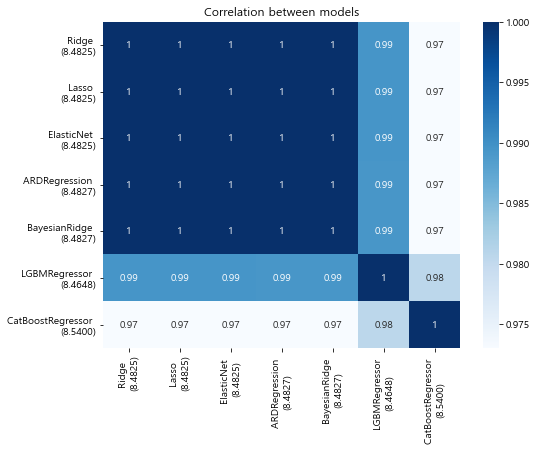

In [50]:
pred_results = []
for name, stk, stk_score in stks_trained:
    pred = list(stk.predict(S_dev))
    name = f'{name} \n({stk_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)
ensemble_results = ensemble_results.applymap(lambda x: float(x))

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

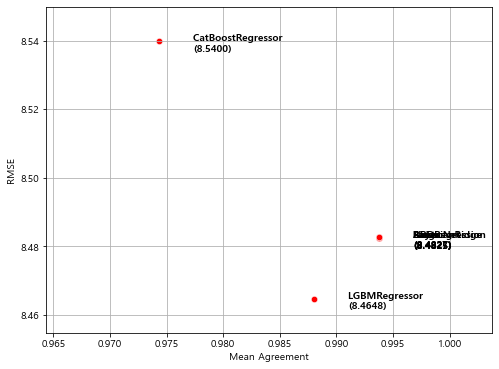

In [51]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
rmse = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'rmse': rmse, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="rmse", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.rmse[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.rmse.min()-0.01,df.rmse.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [61]:
selected = [#'LinearRegression',
            #'Ridge',
            'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            #'CatBoostRegressor'
            ]
models_for_ensemble = [(name,stk) for name,stk,score in stks_trained if name in selected]
weights_stk = []
rmse_best = 1000
for i in tqdm(range(0, 21, 1)):
    for j in range(0, 21, 1):
        if (i+j) != 20:
            continue
        pred = (models_for_ensemble[0][1].predict(S_dev) * i + models_for_ensemble[1][1].predict(S_dev) * j)/20
        rmse = np.sqrt(mean_squared_error(y_dev, pred))
        if rmse < rmse_best:
            weights_stk = [i,j]
            rmse_best = rmse 
            print(rmse, i,j)            

print(rmse_best, weights_stk)

 38%|███████████████████████████████▌                                                   | 8/21 [00:00<00:00, 77.88it/s]

8.464790341882754 0 20
8.463571268779578 1 19
8.462573522868391 2 18
8.461797182440467 3 17
8.461242308439353 4 16
8.460908944436946 5 15
8.460797116616405 6 14


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 80.99it/s]

8.460797116616405 [6, 14]


In [62]:
w0,w1 = weights_stk
selected = [#'LinearRegression',
            #'Ridge',
            'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            #'CatBoostRegressor'
            ]
models_for_ensemble = [(name,stk) for name,stk,score in stks_trained if name in selected]
stk_ensemble_val = (models_for_ensemble[0][1].predict(S_dev) * w0 + models_for_ensemble[1][1].predict(S_dev) * w1)/20

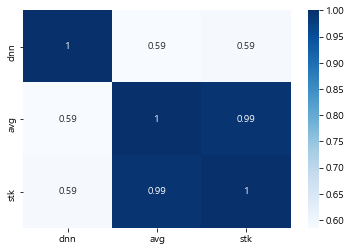

In [64]:
sns.heatmap(pd.DataFrame(dict(zip(['dnn','avg','stk'],[dnn.predict(x_dev_num).flatten(),avg_test_result,stk_ensemble_val]))).corr(), annot=True, cmap='Blues')
plt.show()

### Deployment

In [71]:
w0,w1 = weights_stk
selected = [#'LinearRegression',
            #'Ridge',
            'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            #'CatBoostRegressor'
            ]
models_for_ensemble = [(name,stk) for name,stk in stks_trained_for_submissions if name in selected]
stk_ensemble_results = (models_for_ensemble[0][1].predict(S_test) * w0 + models_for_ensemble[1][1].predict(S_test) * w1)/20
w0, w1 = weights_ds
pd.DataFrame({'custid': test_id, 'age': stk_ensemble_results}).to_csv('numeric_stkenlas6lgbm14_ard_lgbm_cat.csv', index=False)

In [72]:
pd.DataFrame({'age': stk_ensemble_val}).to_csv('numeric_stkenlas6lgbm14_ard_lgbm_cat_dev.csv', index=False)